In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gym

In [3]:
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display

def display_frames_as_gif(frames):
    plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0),
              dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    
    def animate(i):
        patch.set_data(frames[i])
        
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames),
                                  interval=50)
    anim.save('movie_cartpole.mp4')
    display(display_animation(anim, default_mode='loop'))

In [4]:
frames = []
env = gym.make('CartPole-v0')
observation = env.reset()

for step in range(0, 200):
    frames.append(env.render(mode='rgb_array'))
    action = np.random.choice(2)
    
    observation, reward, done, info = env.step(action)

C:\Users\owner\anaconda3\envs\rl_env\lib\site-packages\gym\logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))



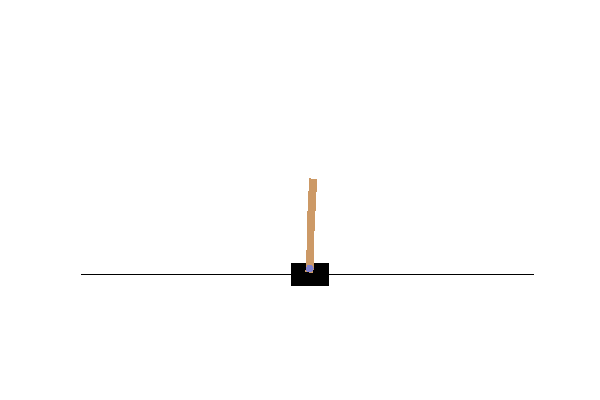
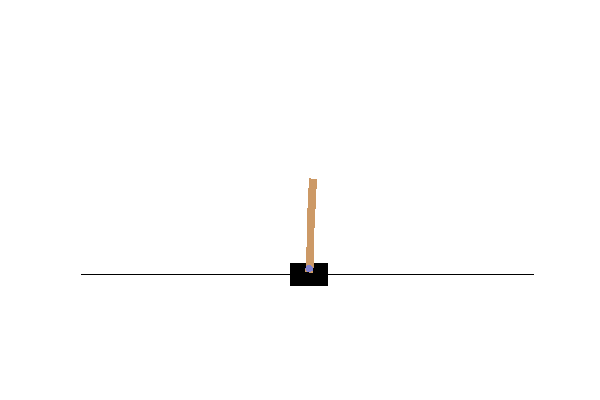
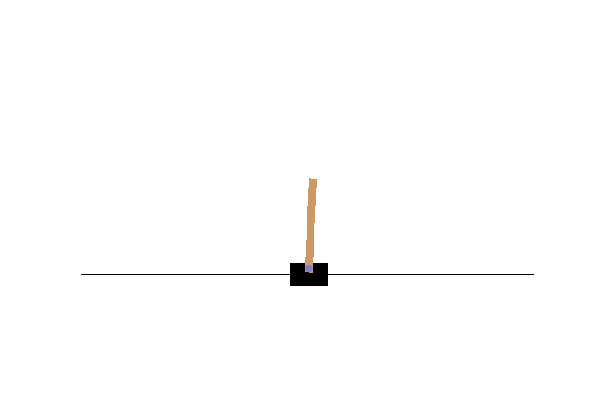
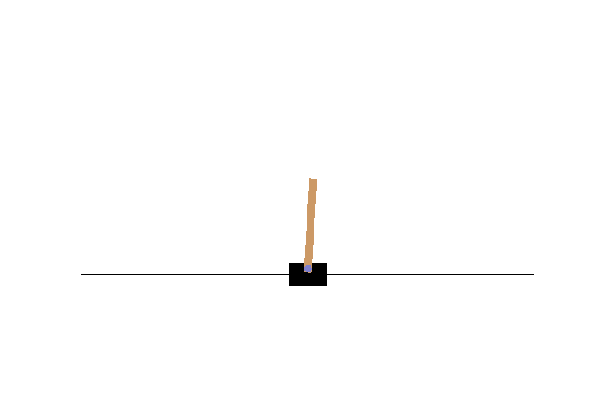
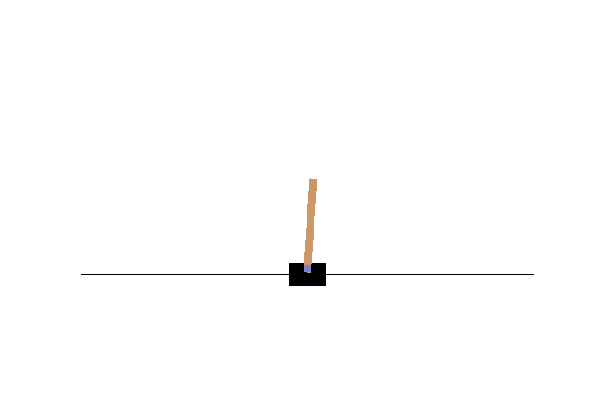
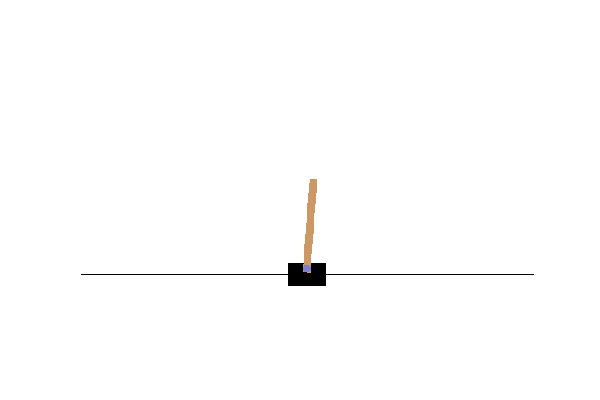
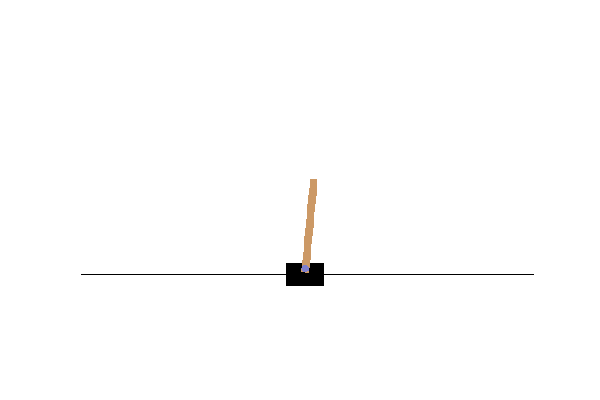
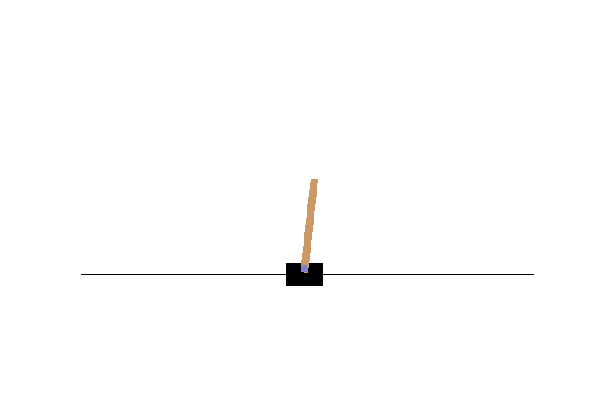
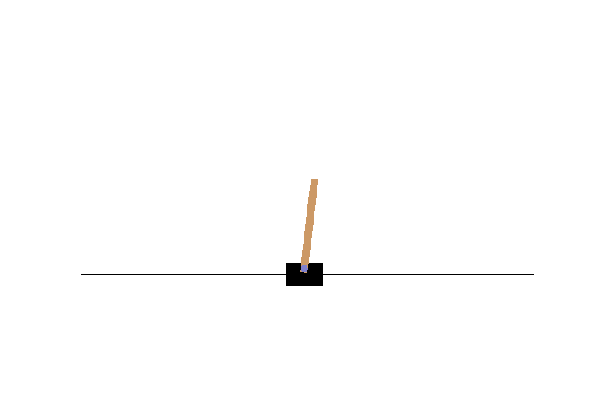
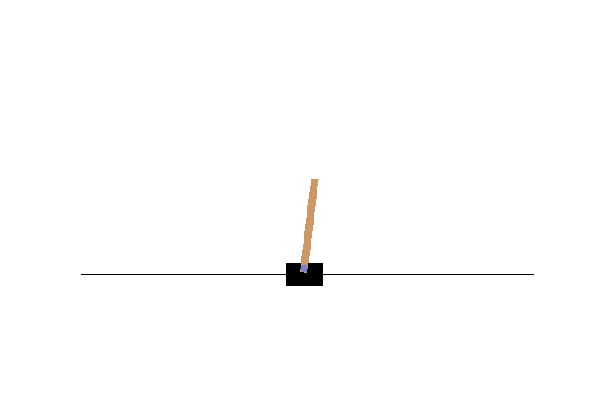
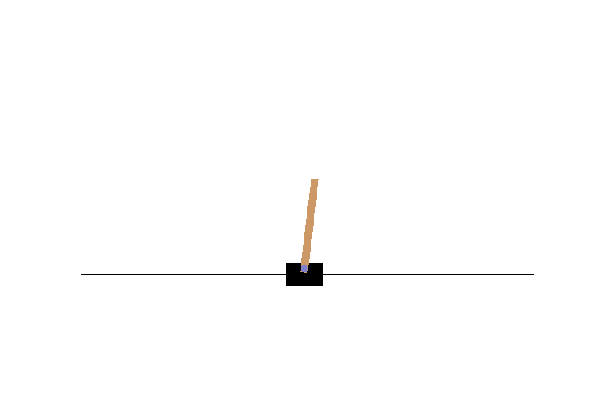
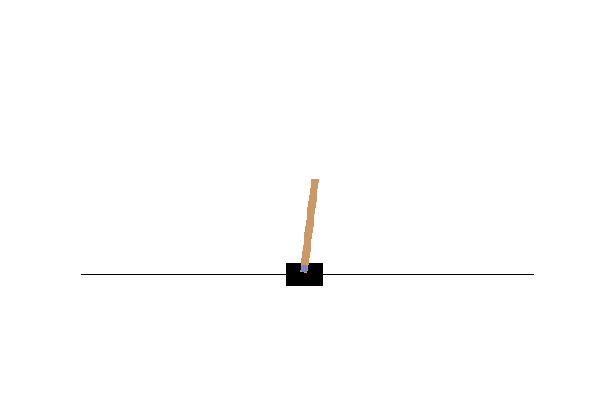
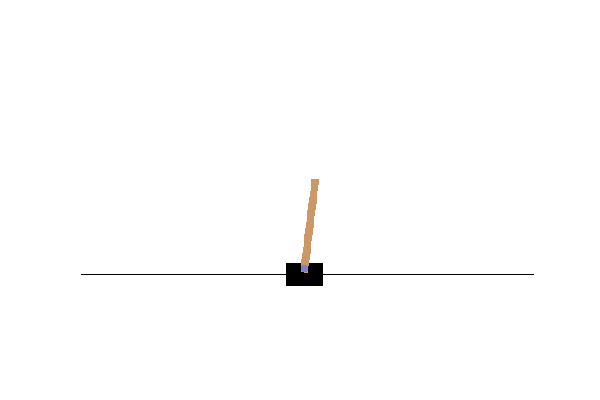
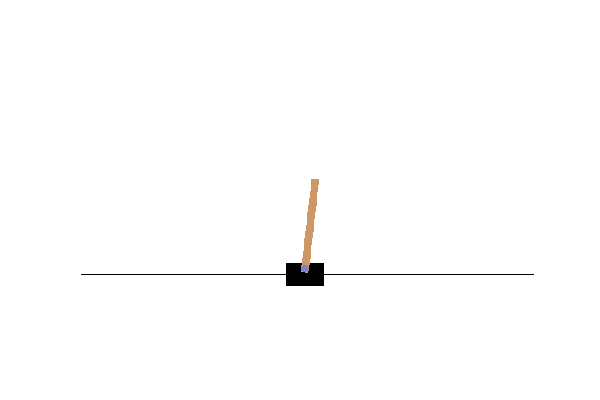
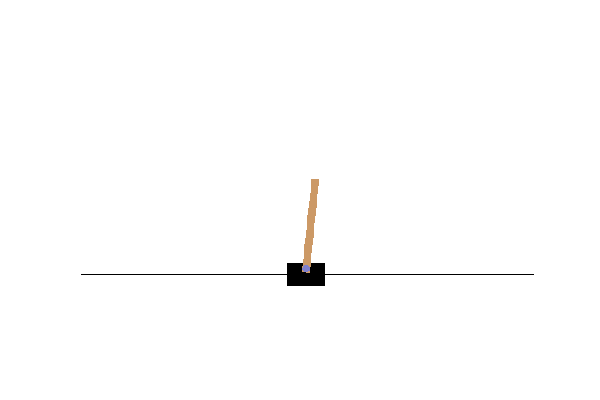
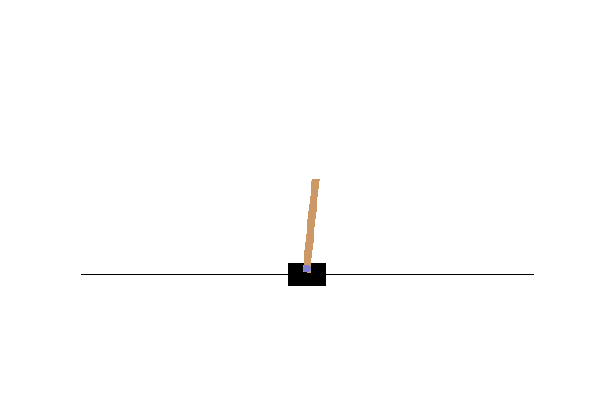
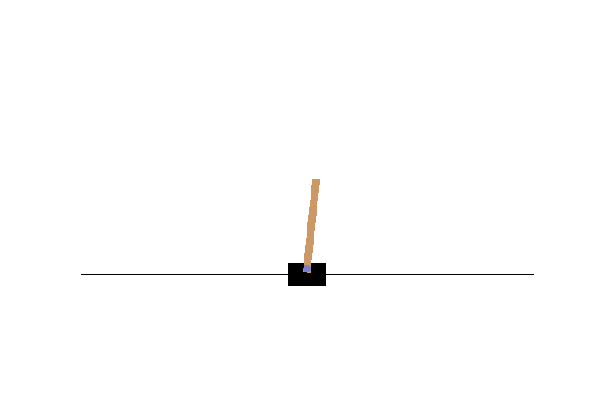
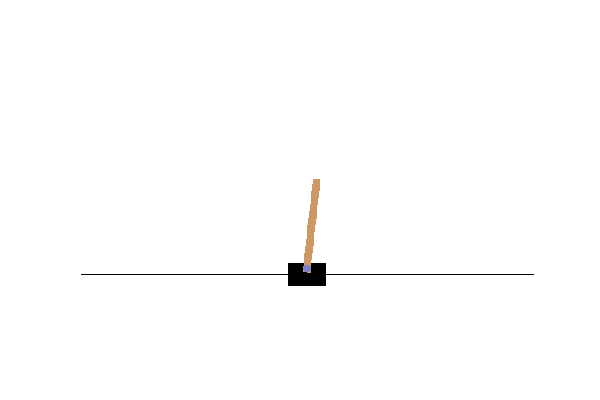
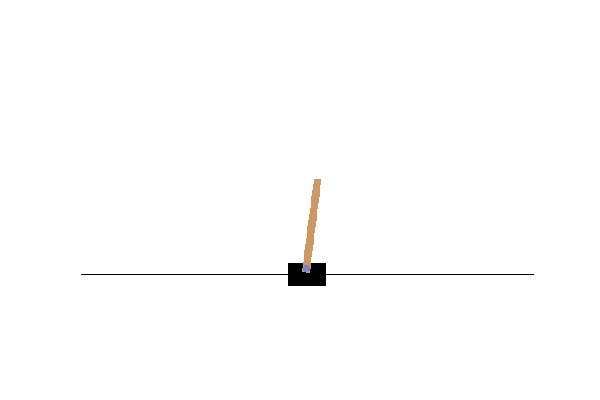
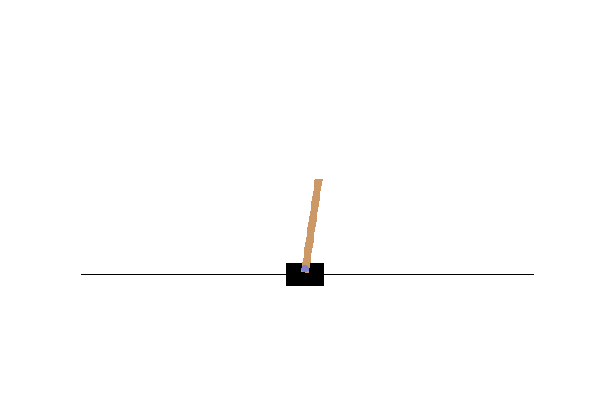
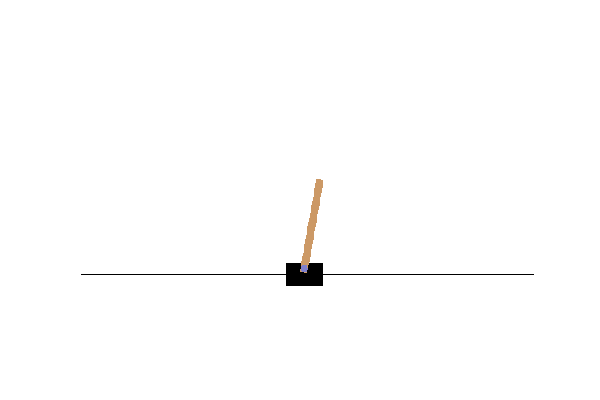
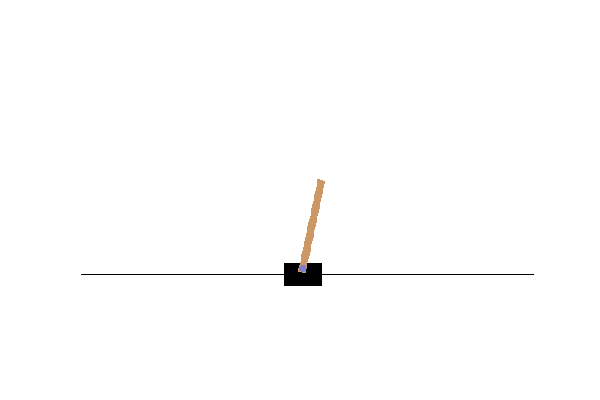
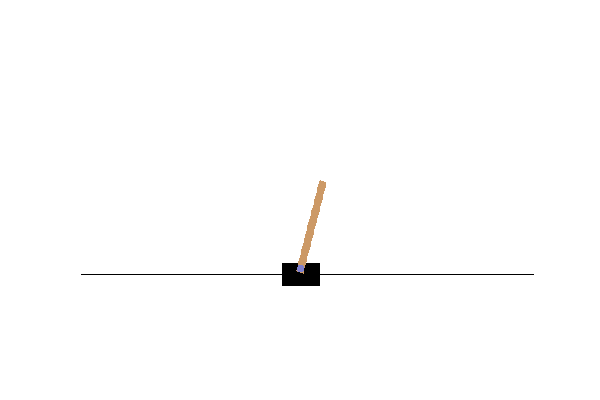
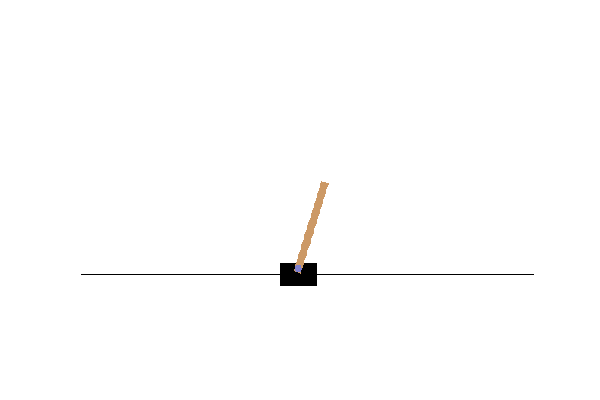
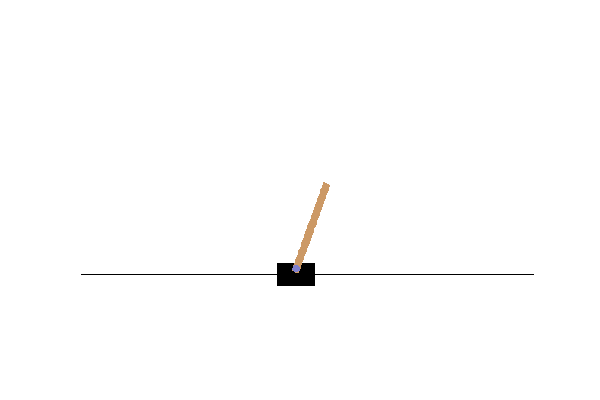
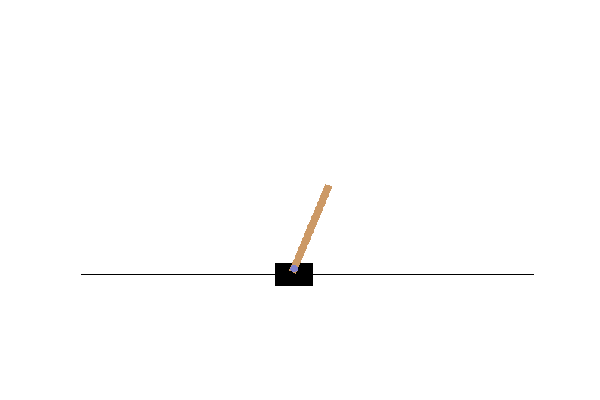
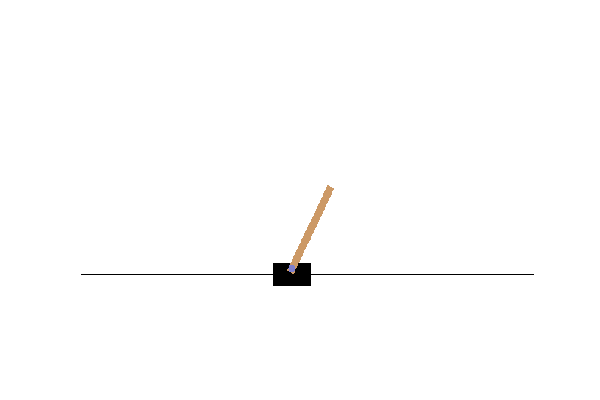
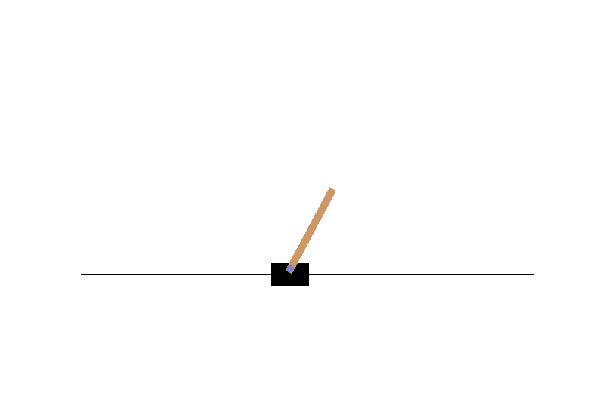
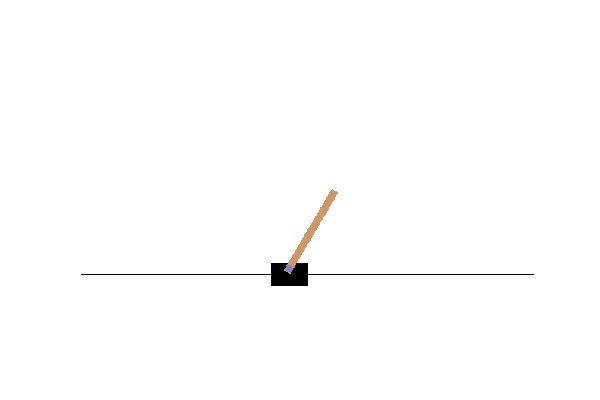
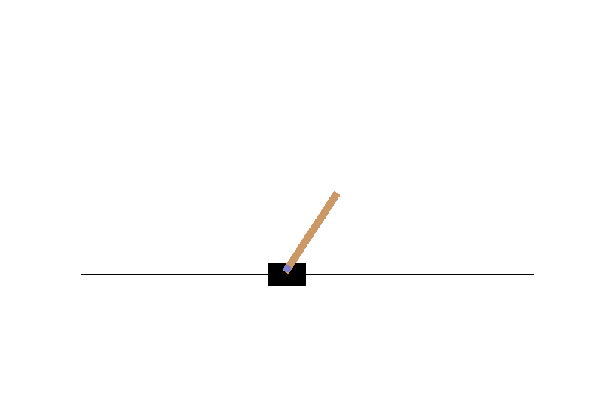
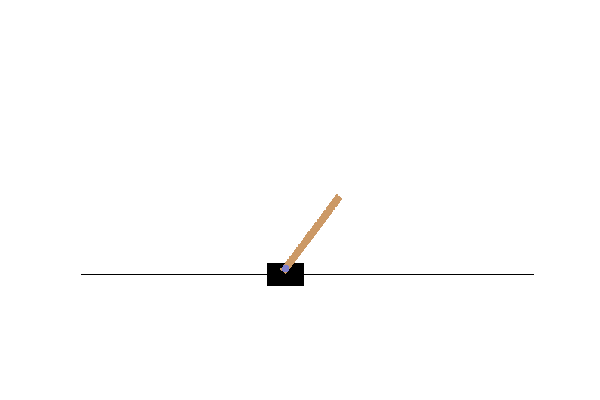
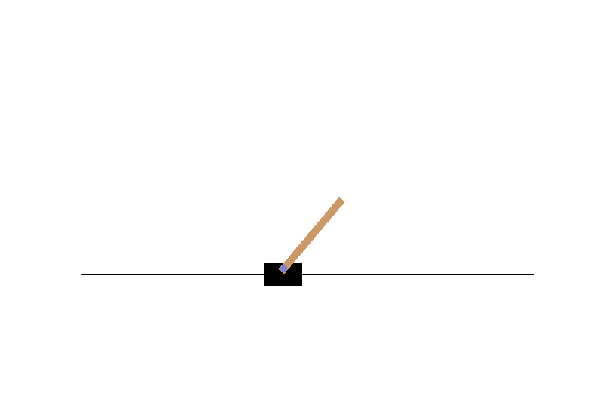
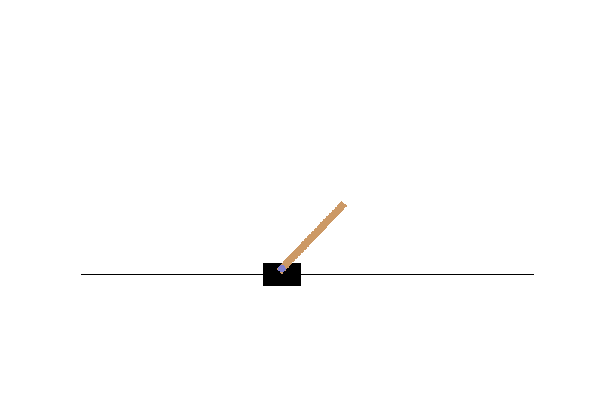
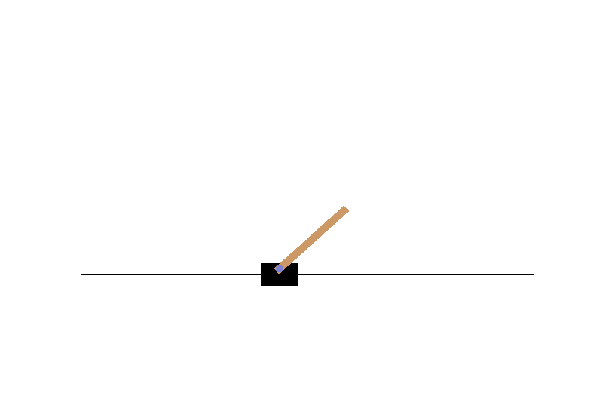
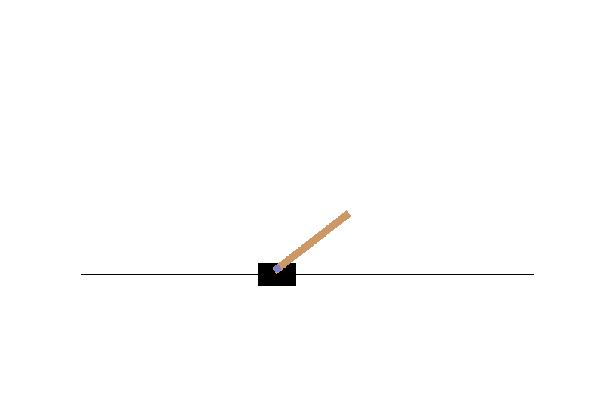
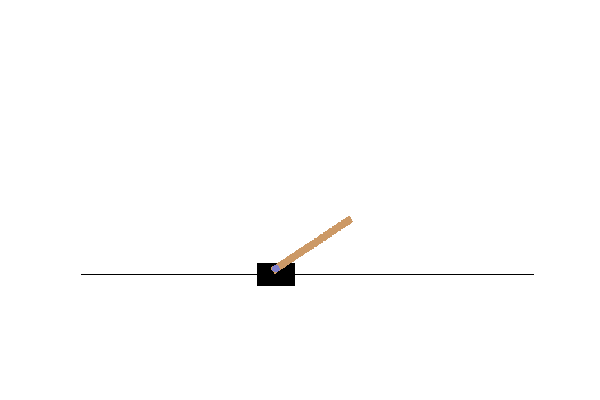
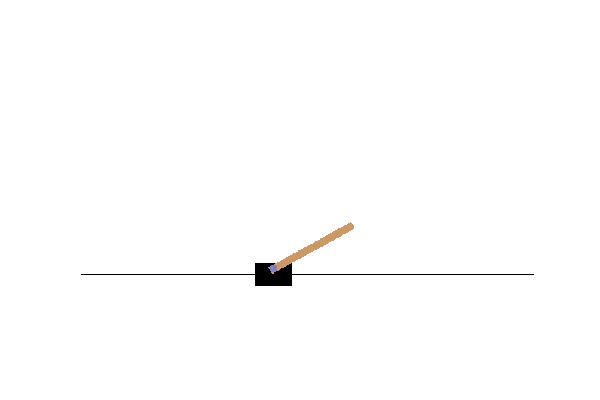
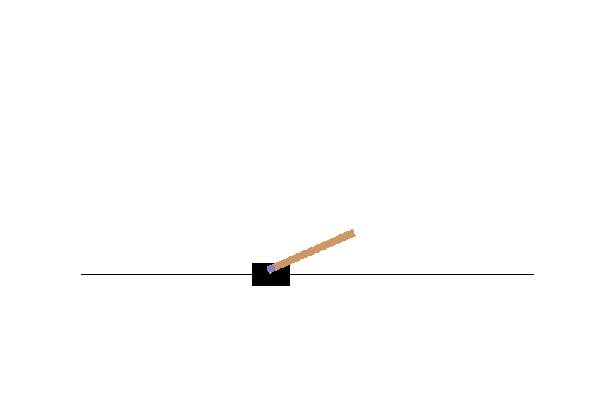
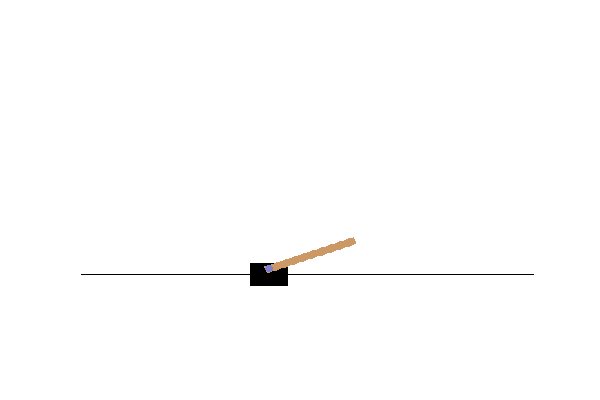
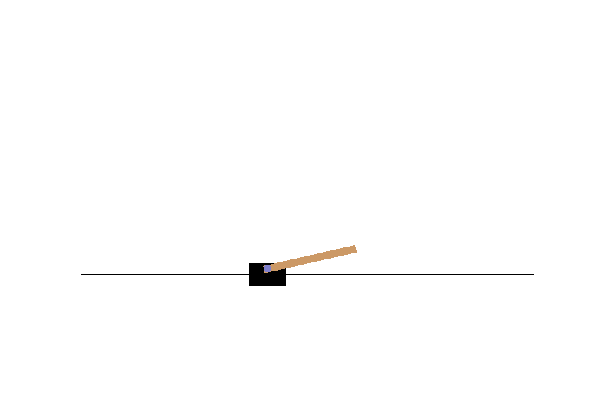
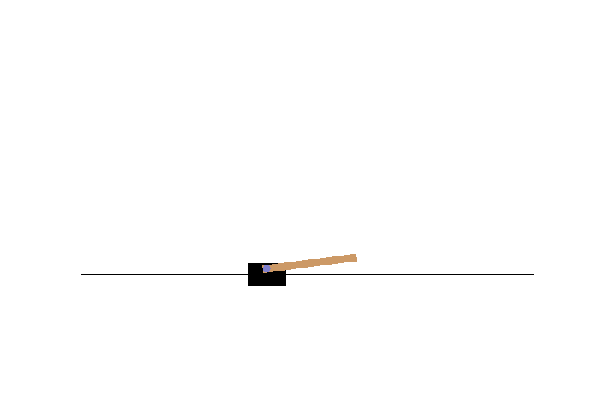
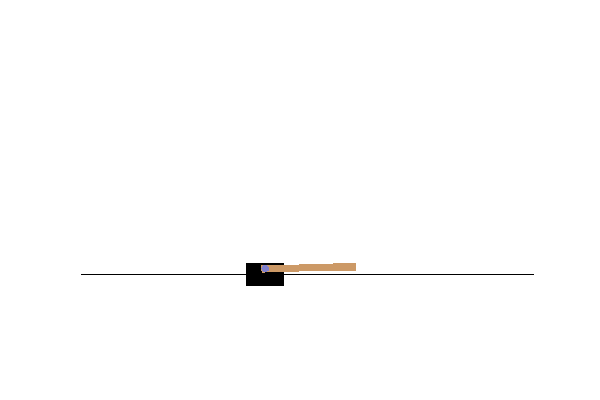
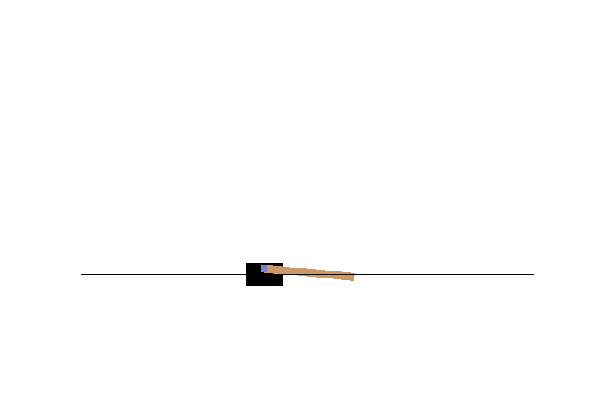
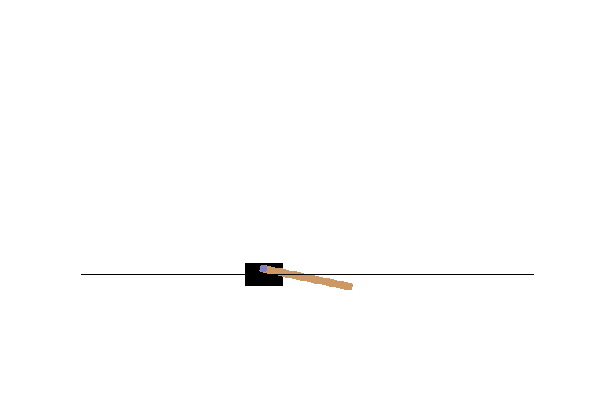
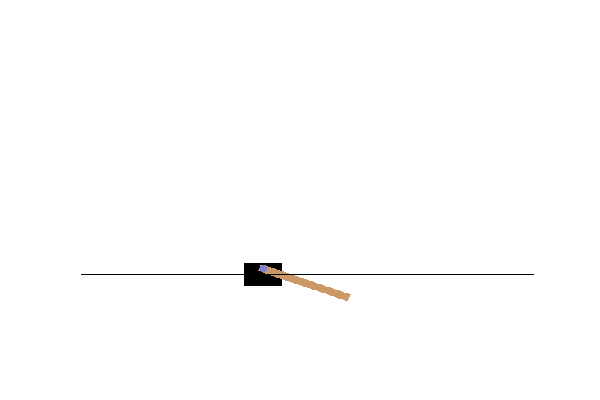
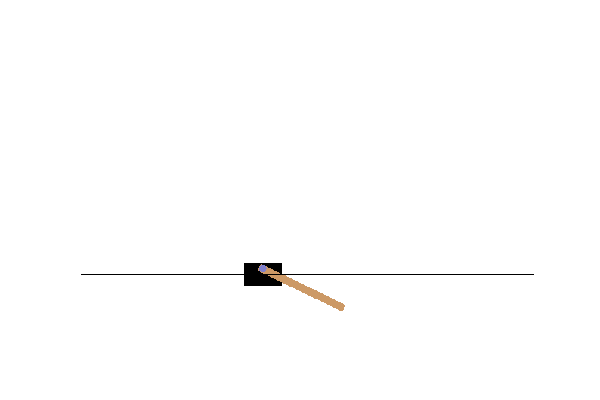
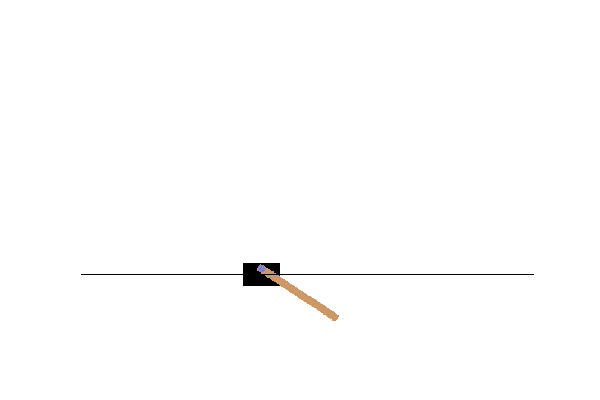
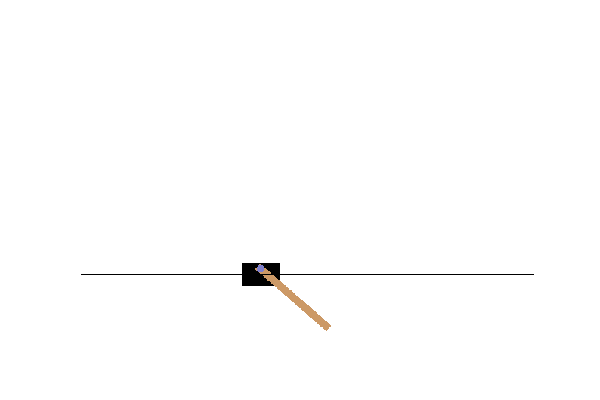
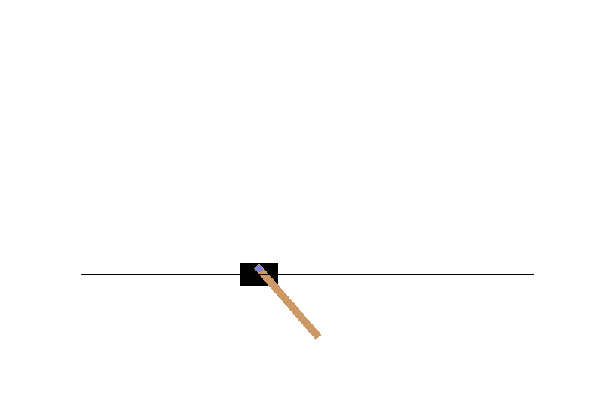
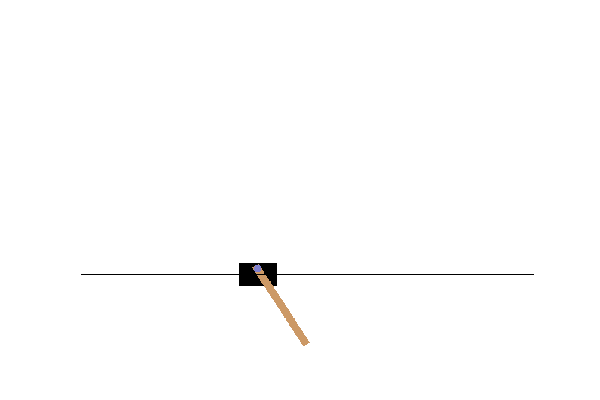
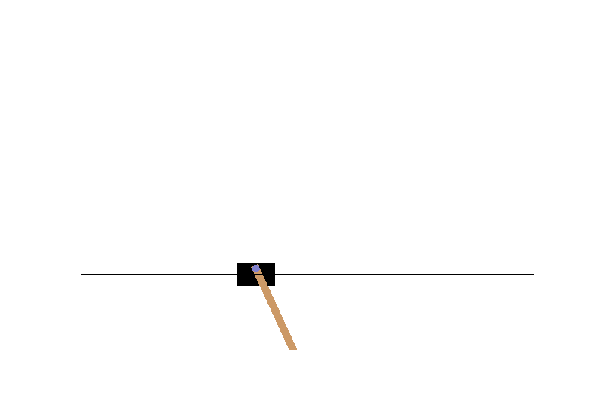
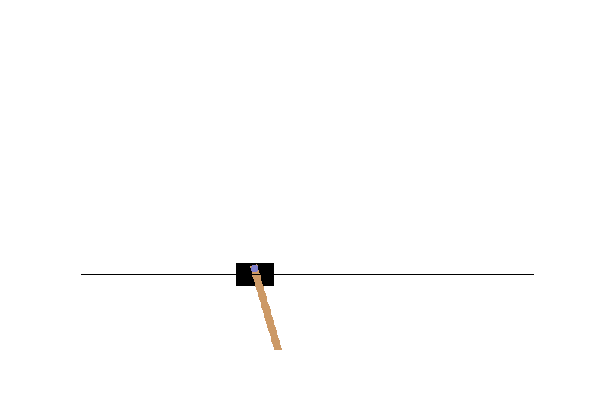
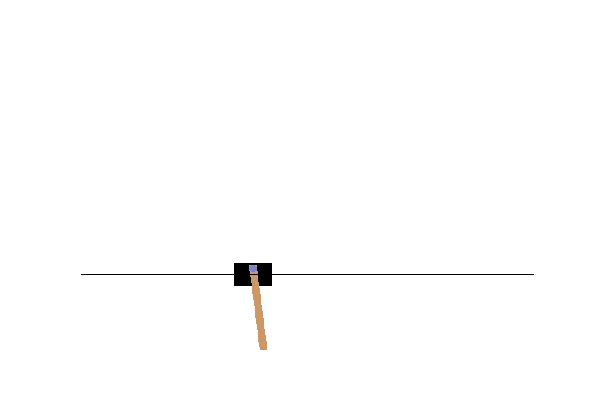
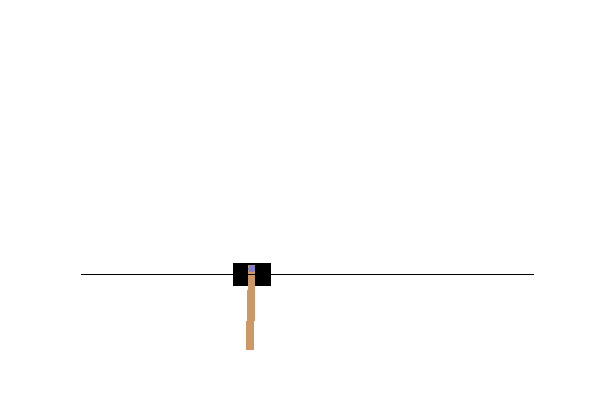
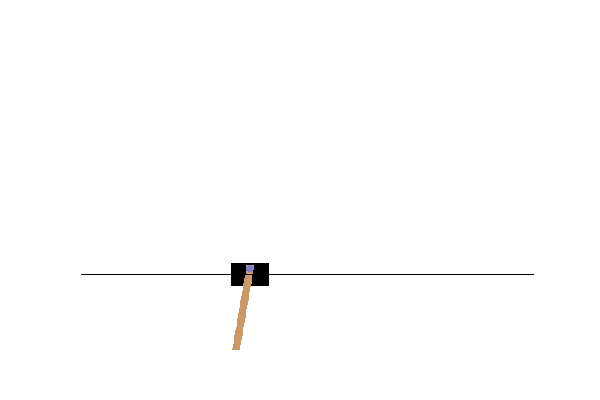
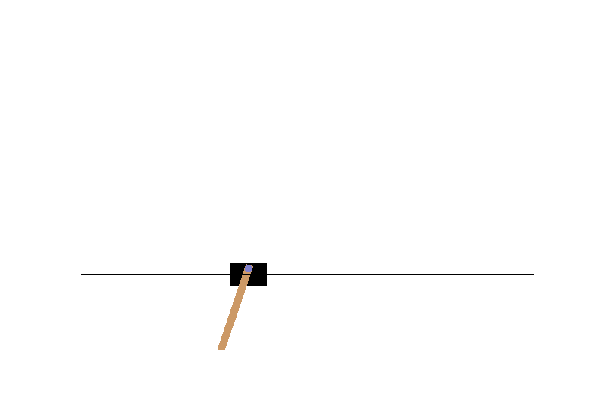
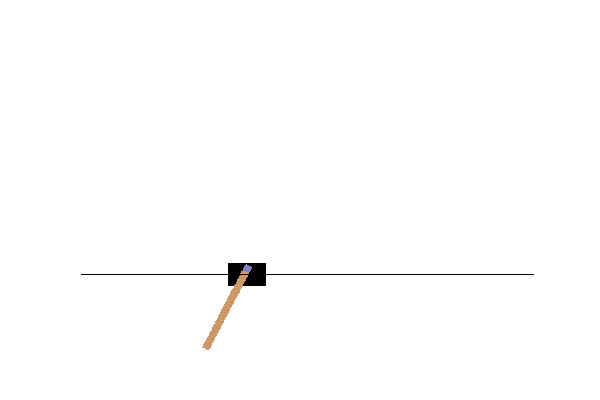
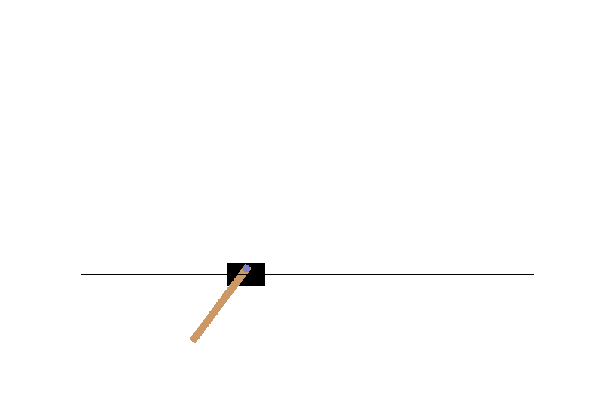
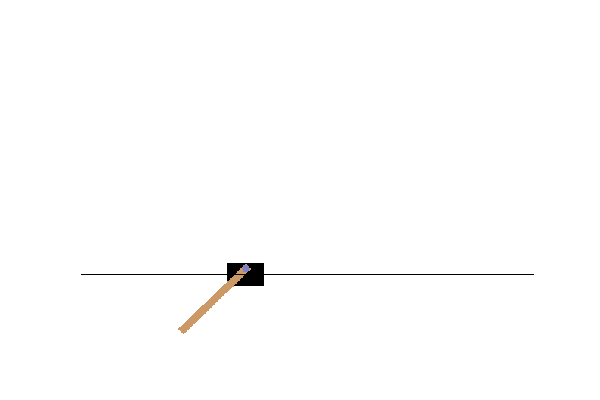
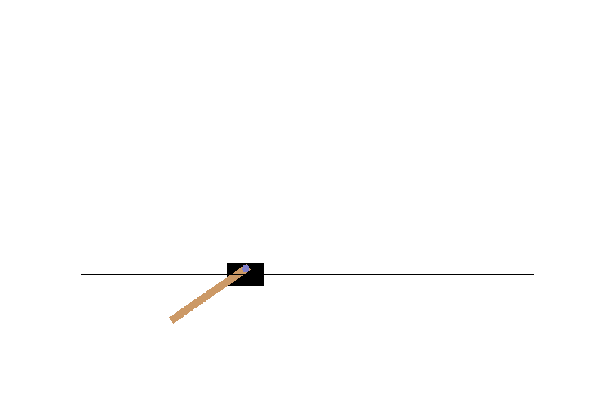
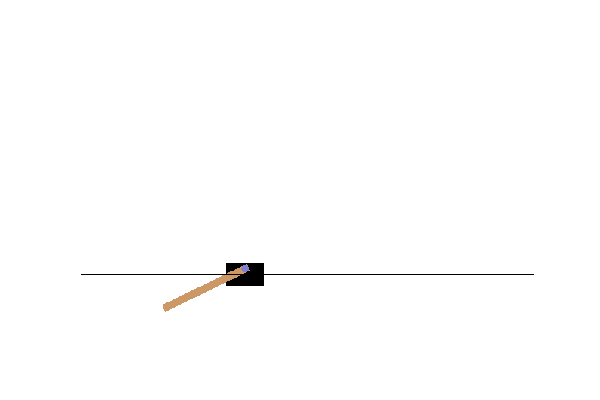
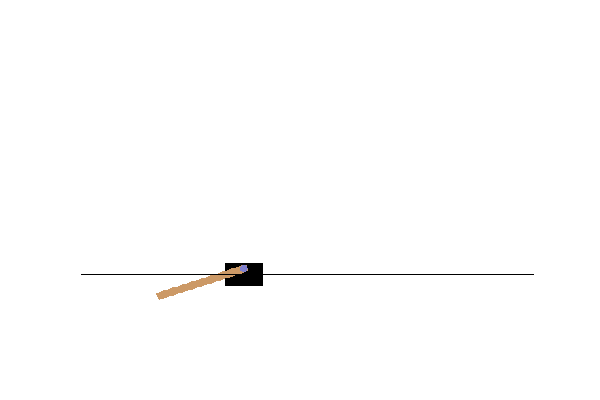
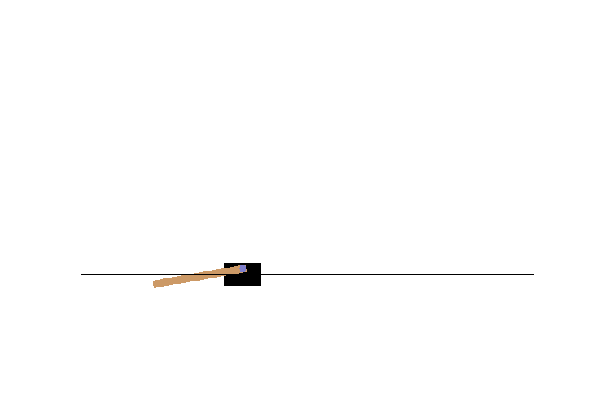
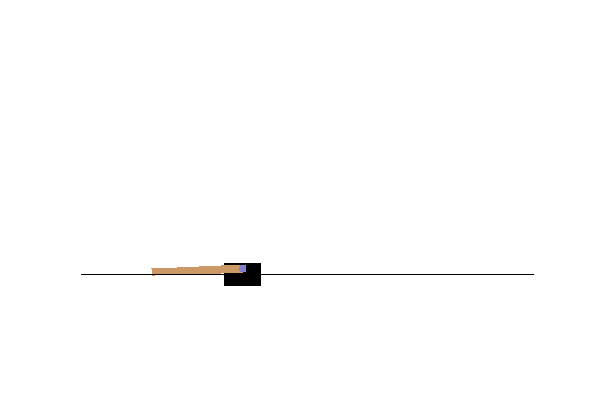
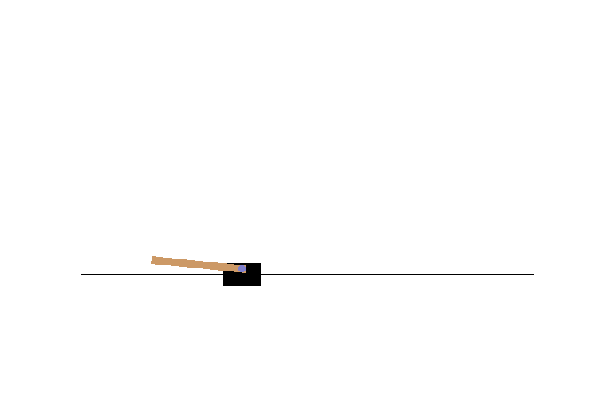
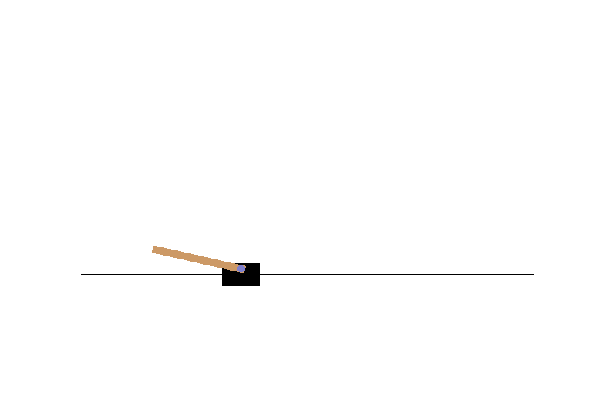
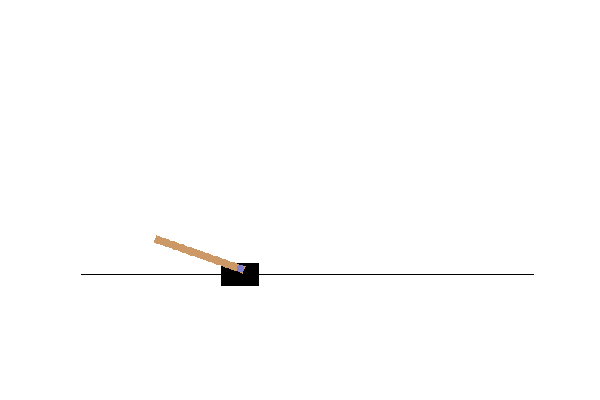
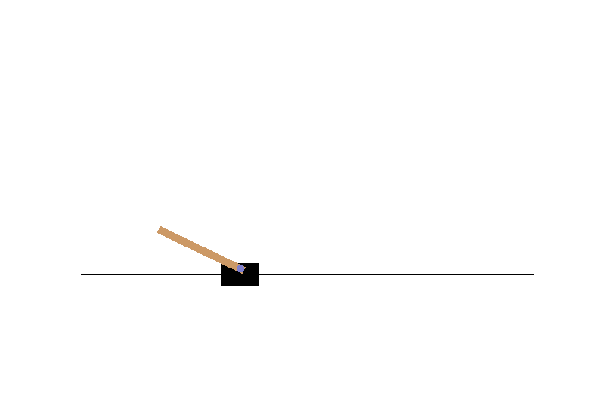
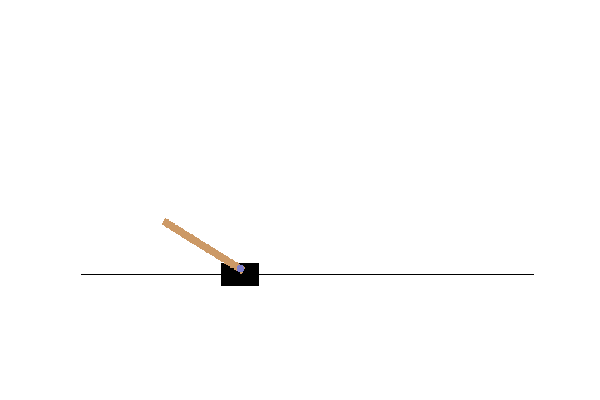
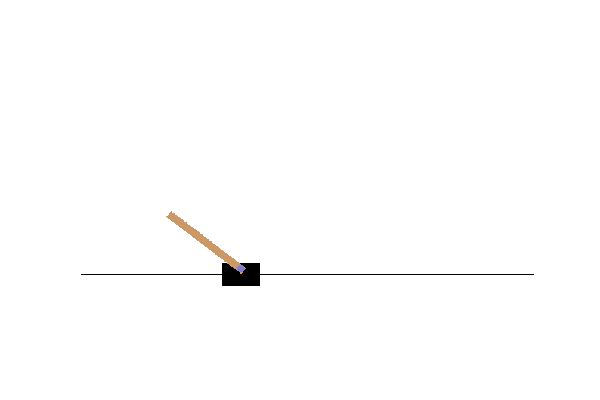
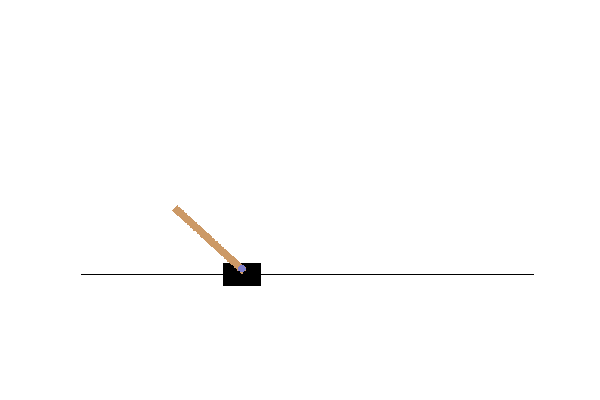
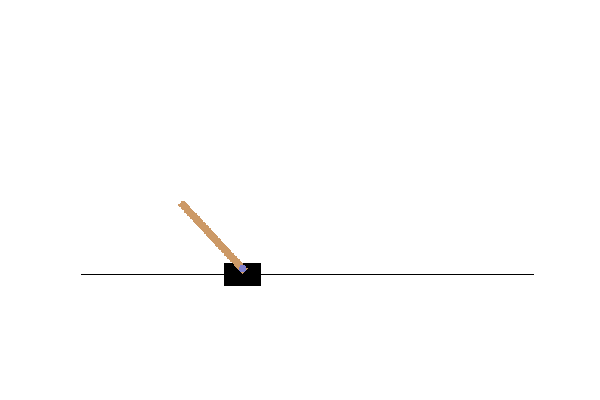
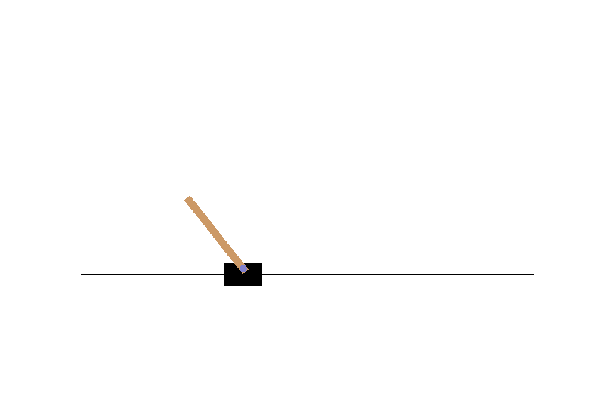
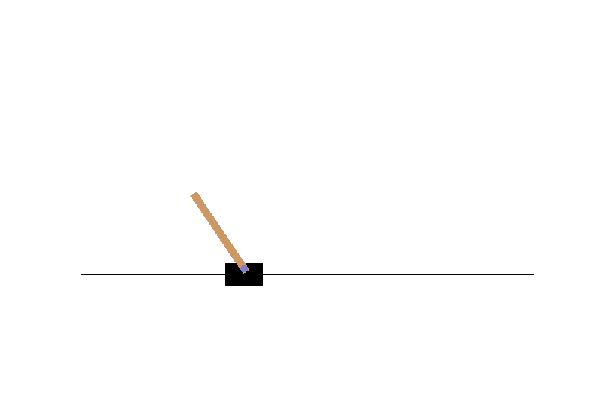
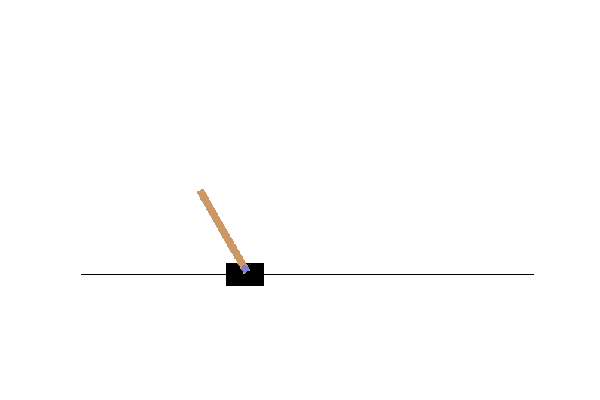
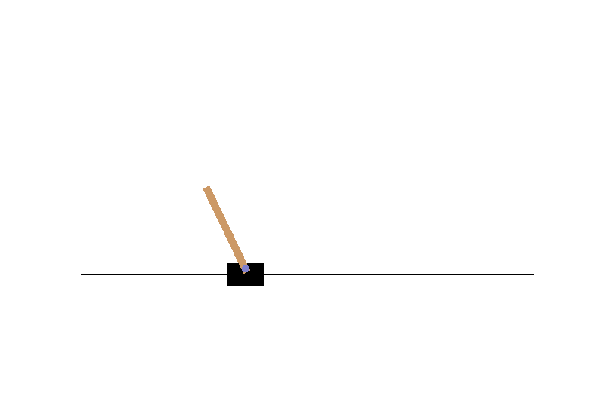
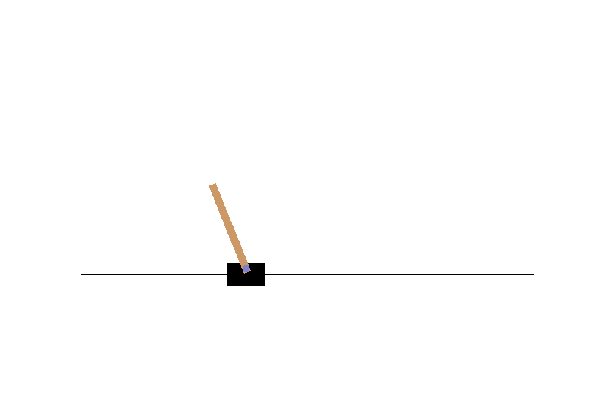
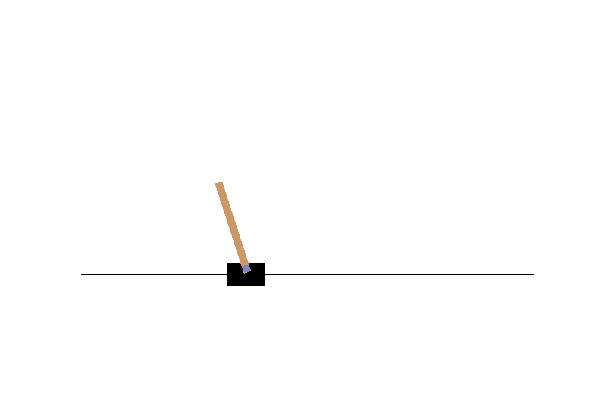
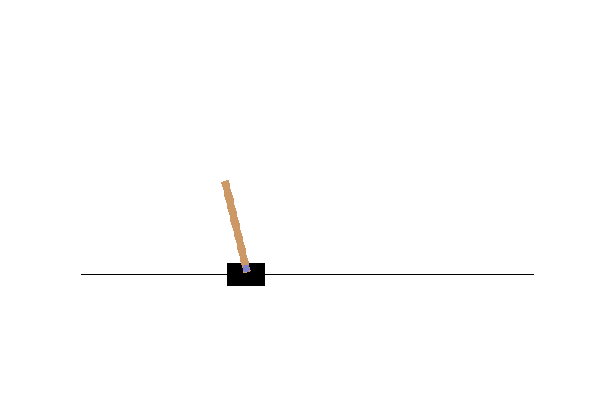
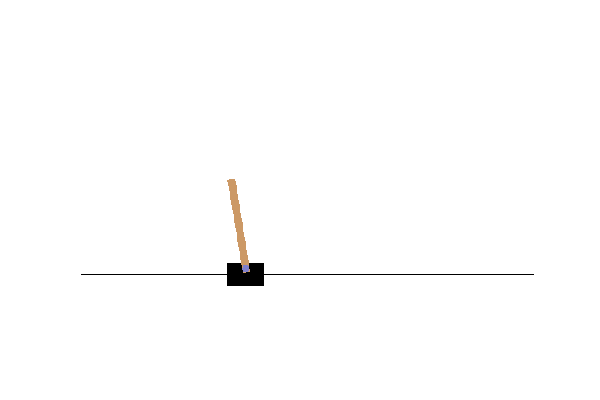
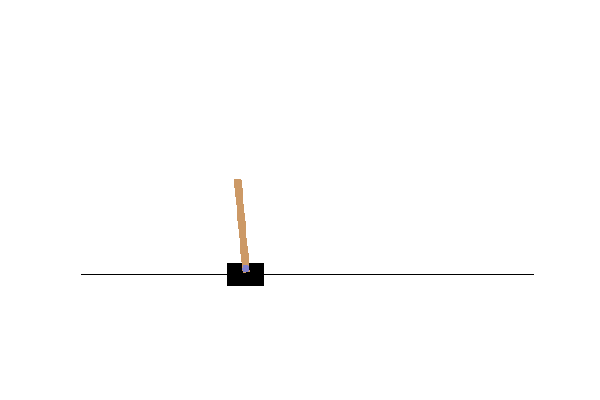
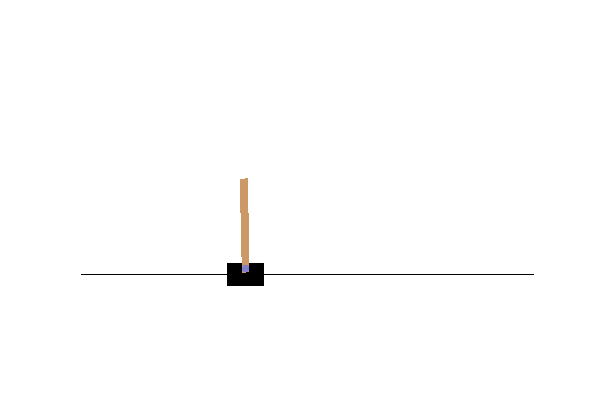
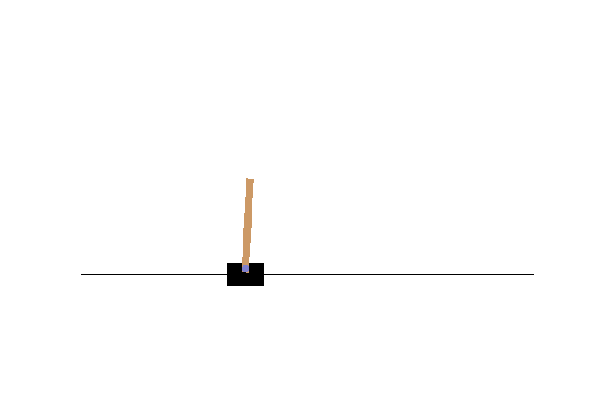
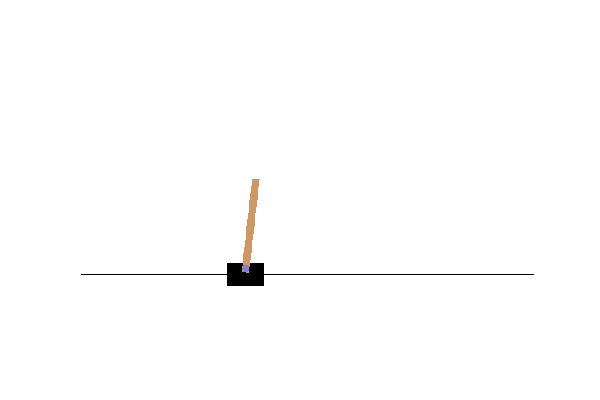
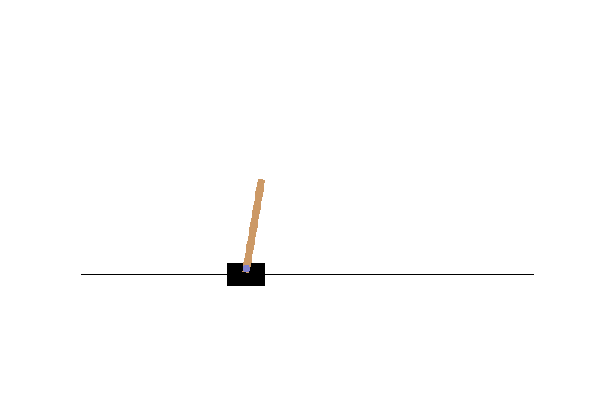
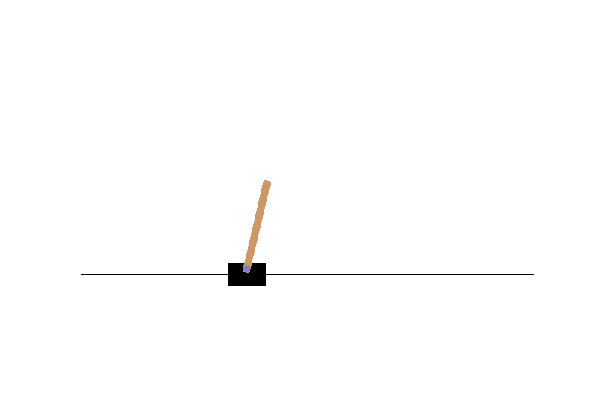
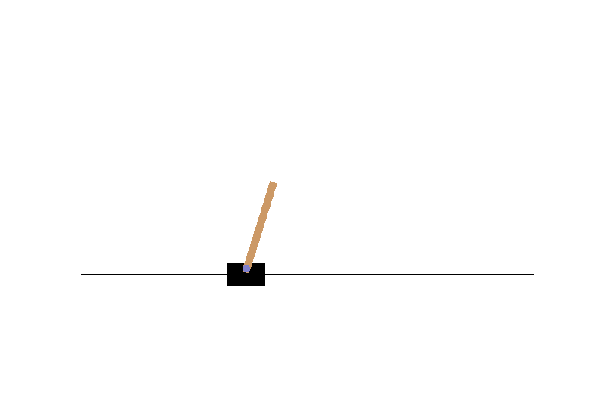
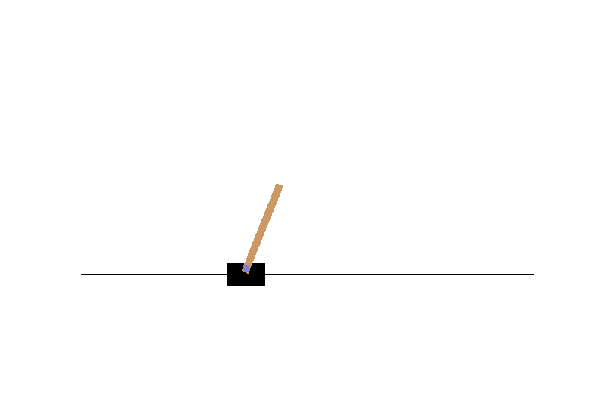
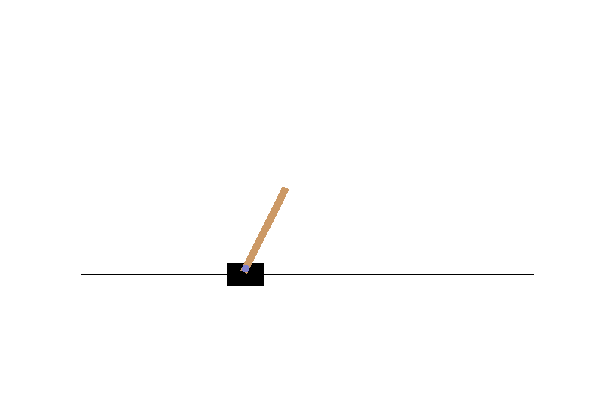
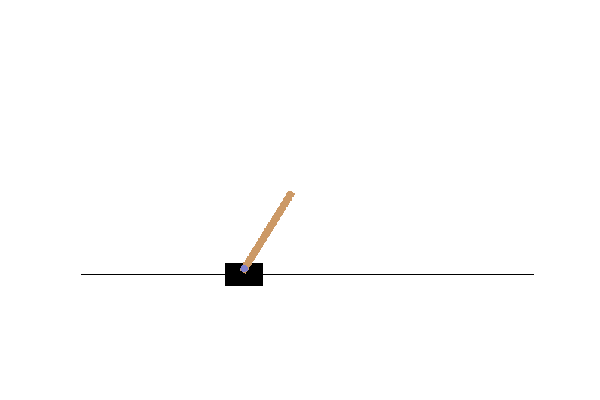
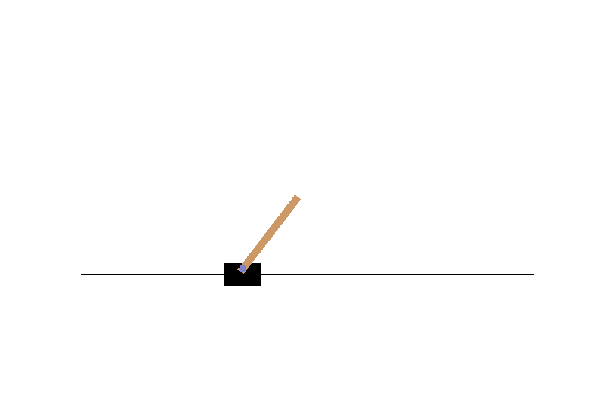
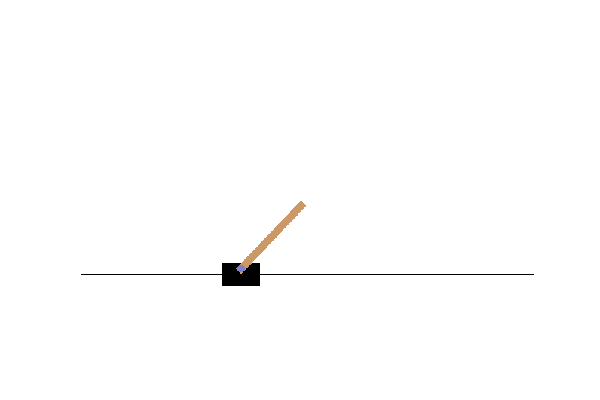
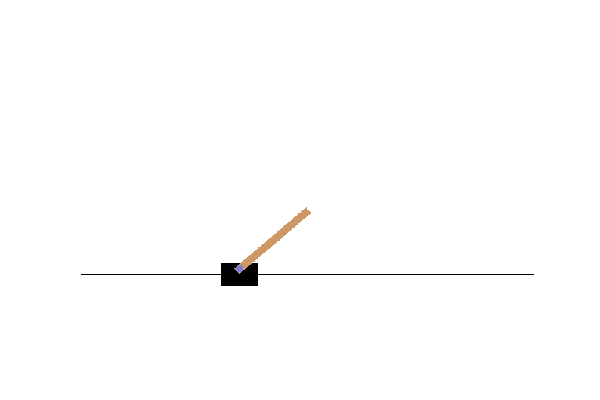
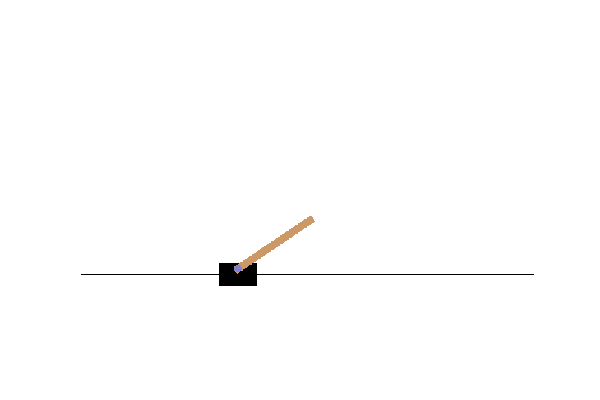
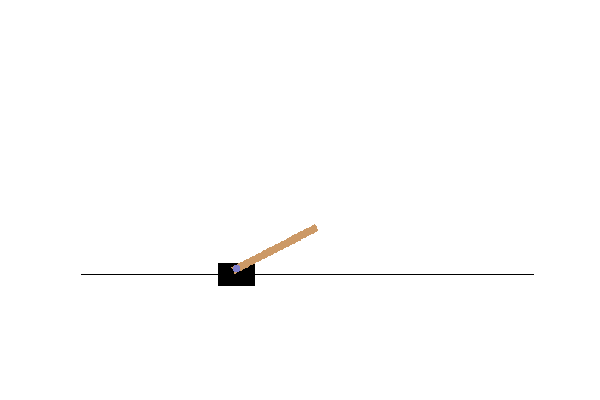
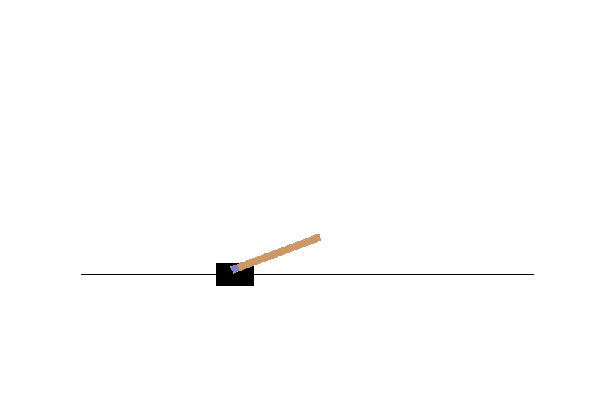
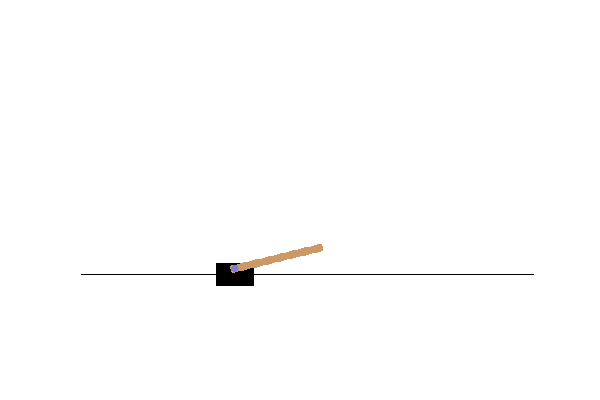
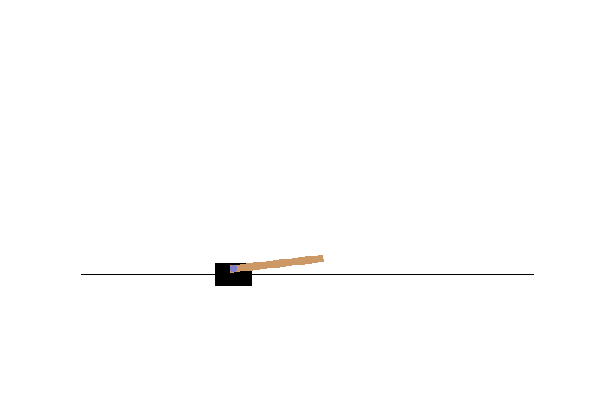
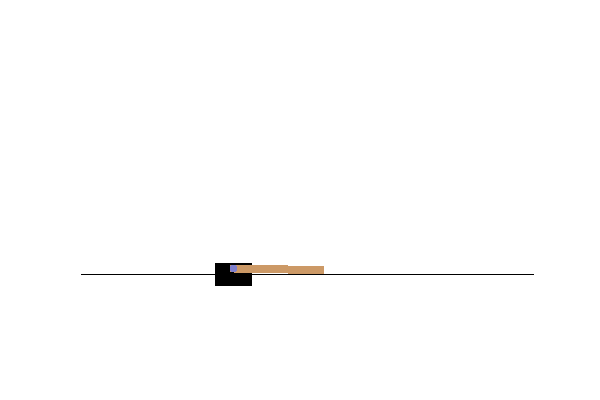
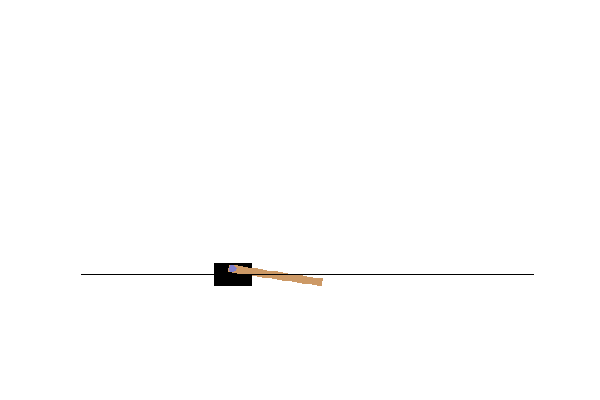
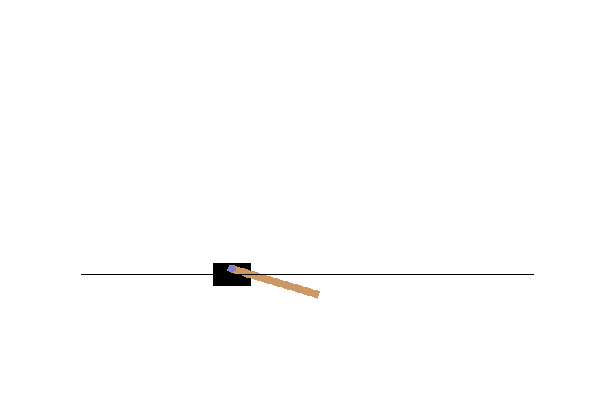
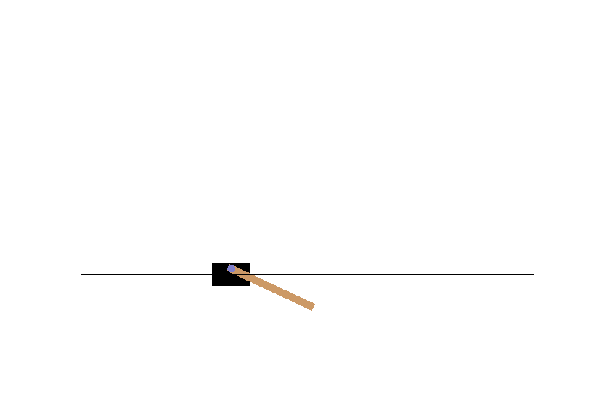
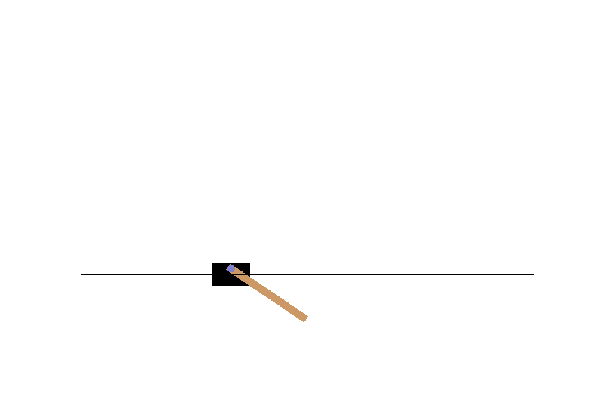
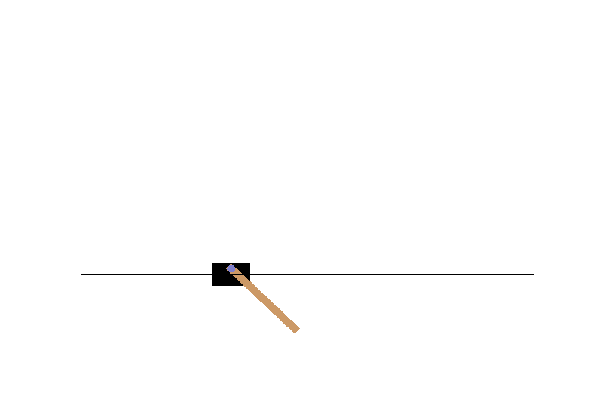
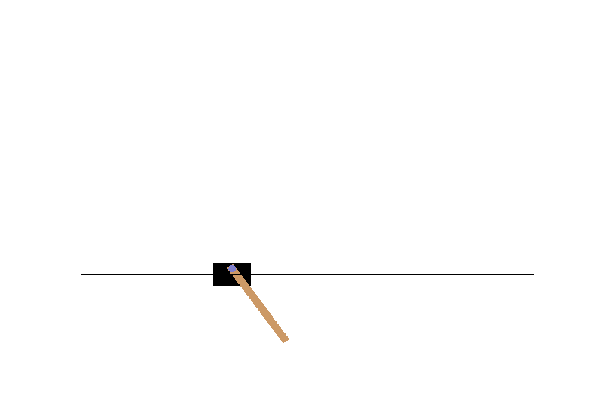
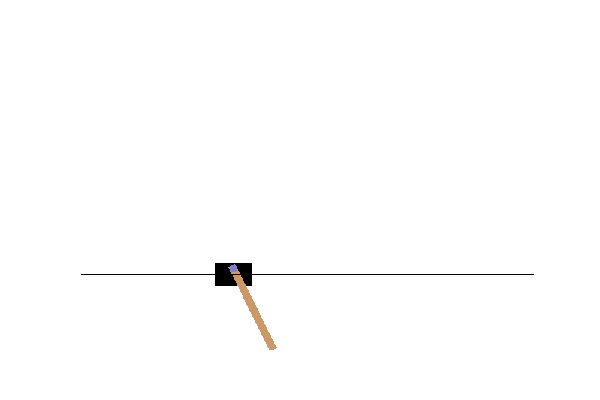
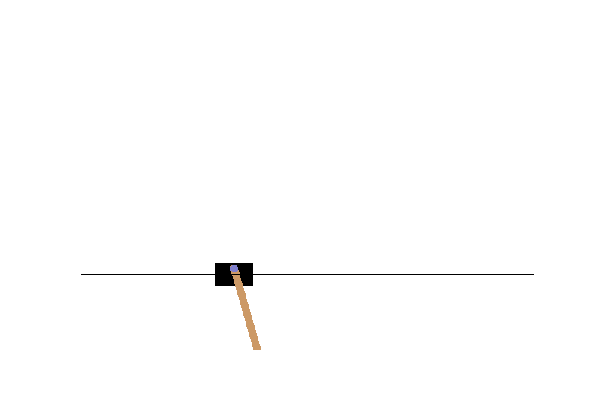
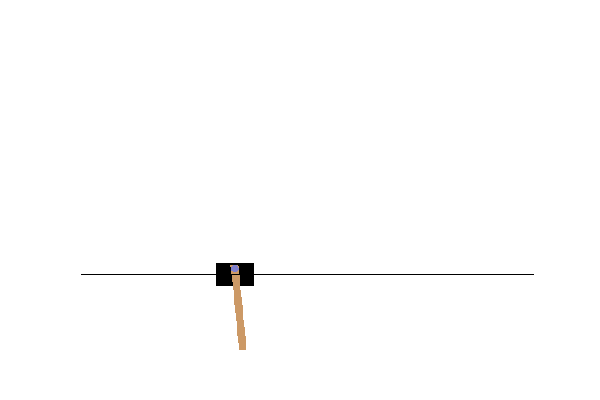
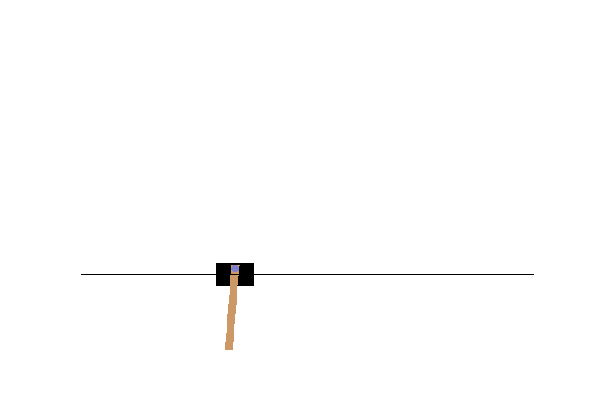
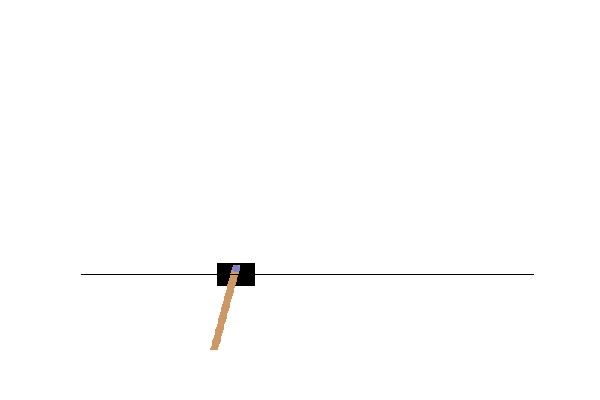
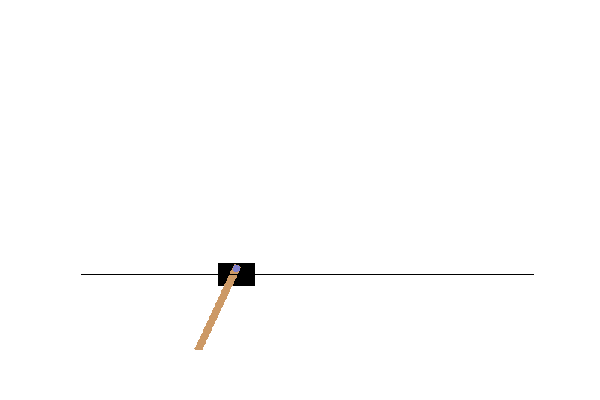
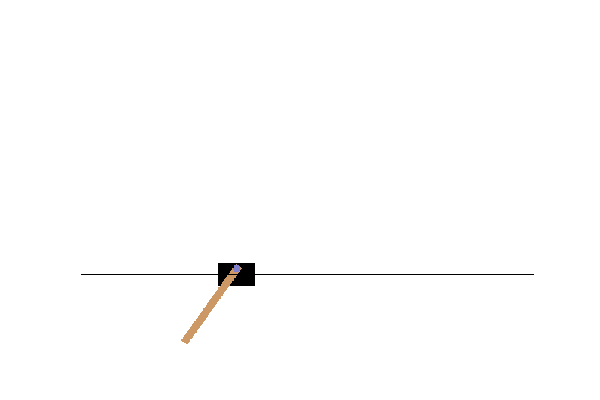
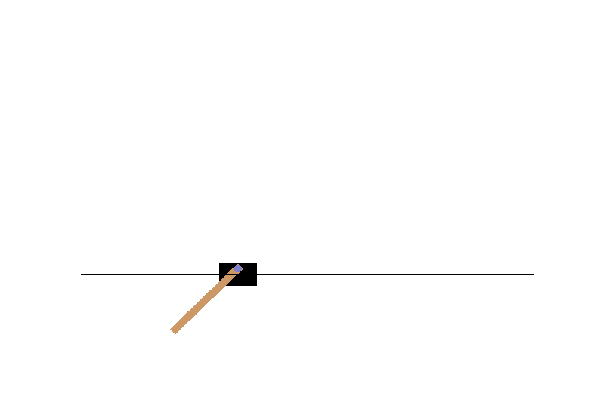
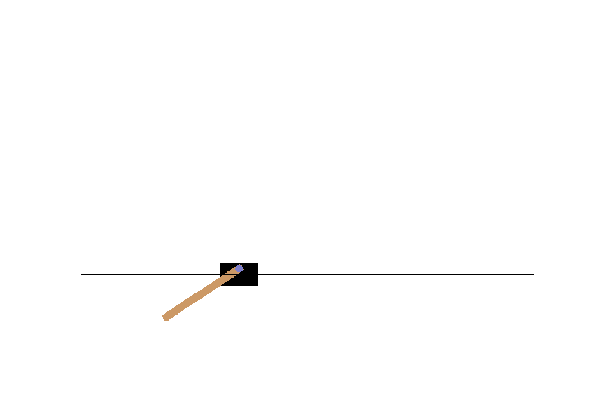
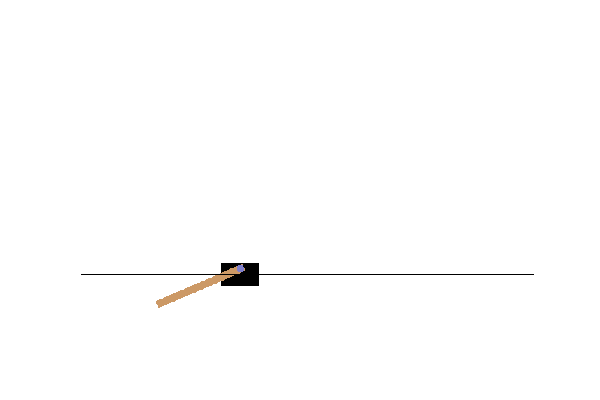
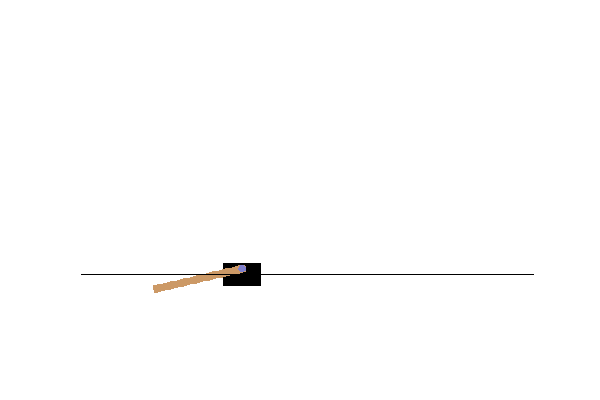
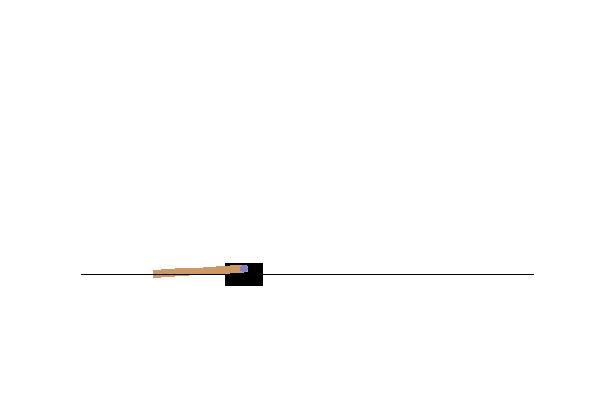
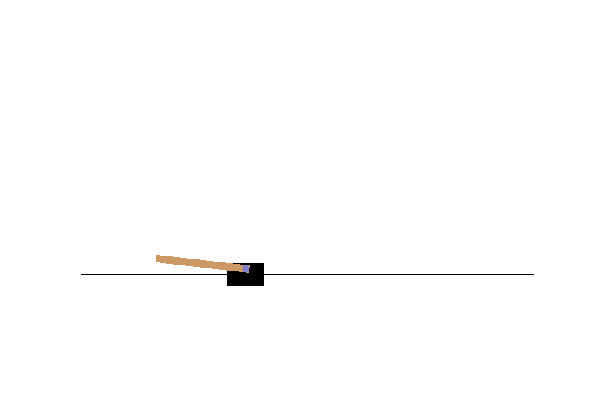
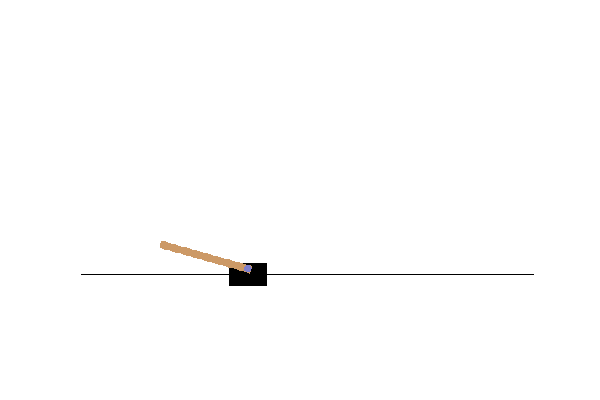
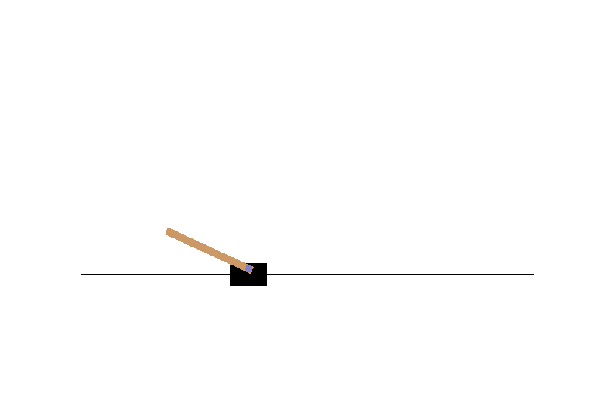
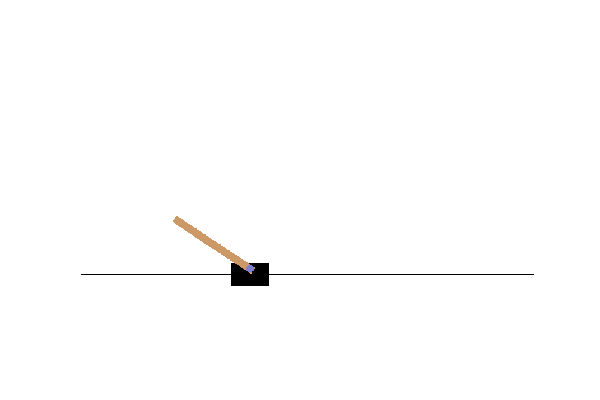
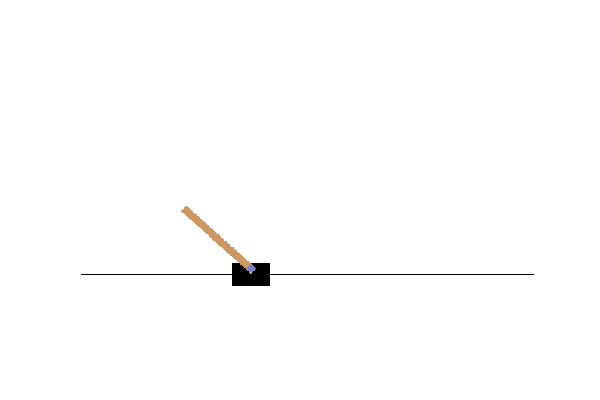
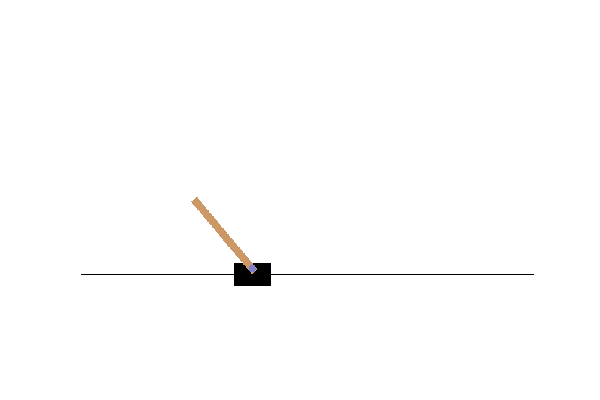
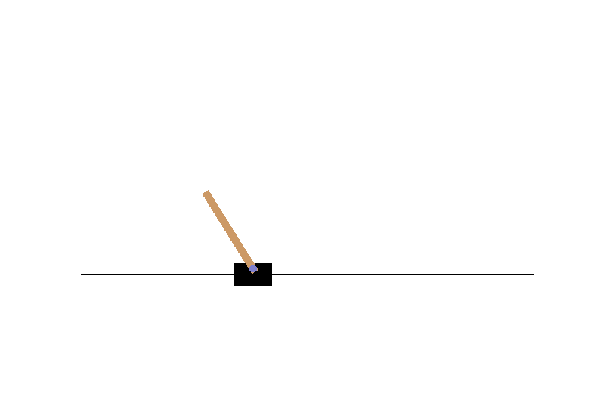
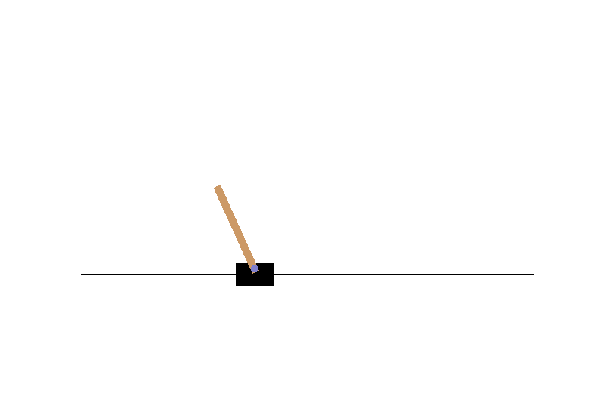
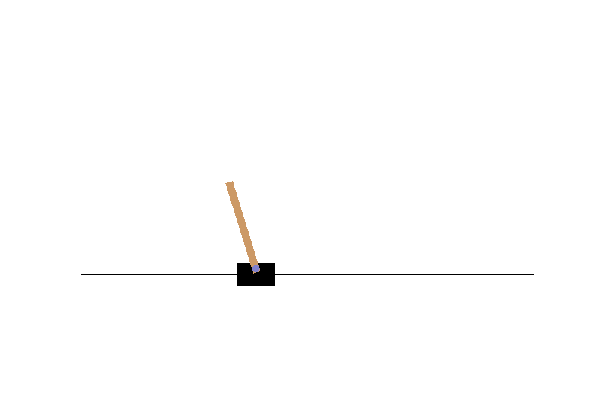
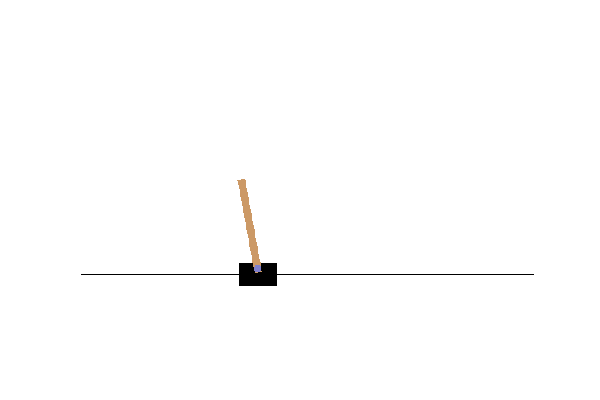
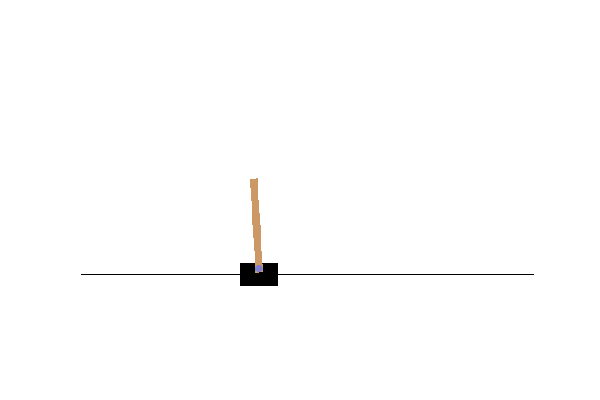
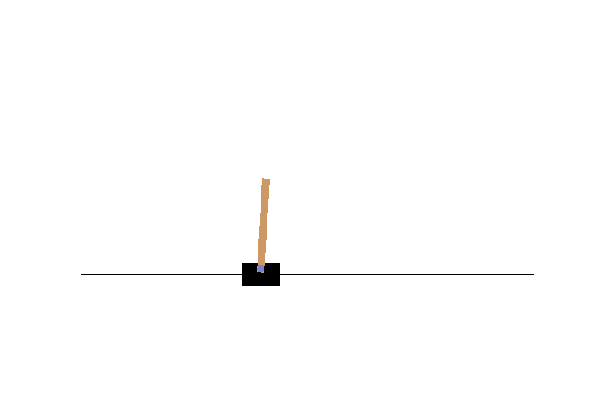
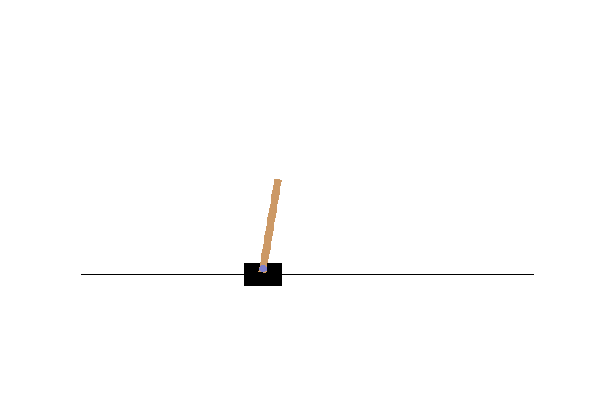
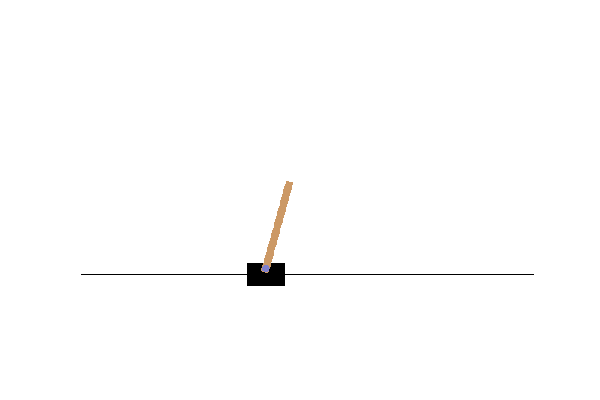
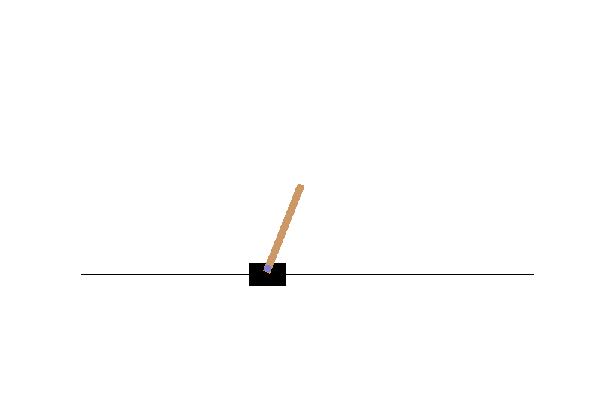
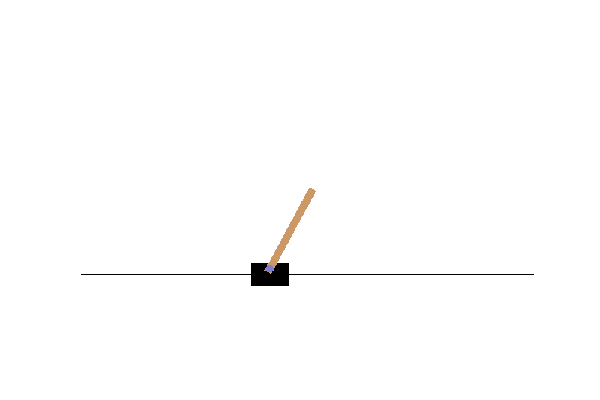
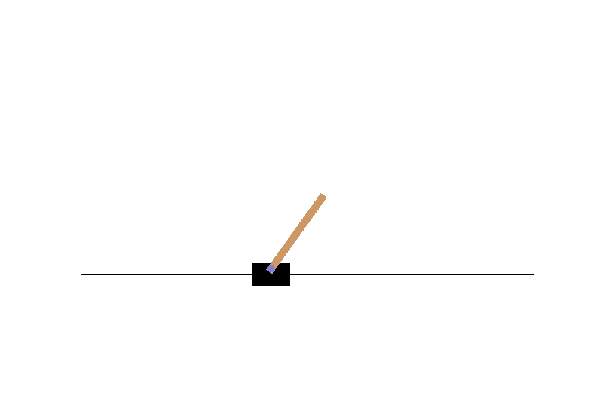
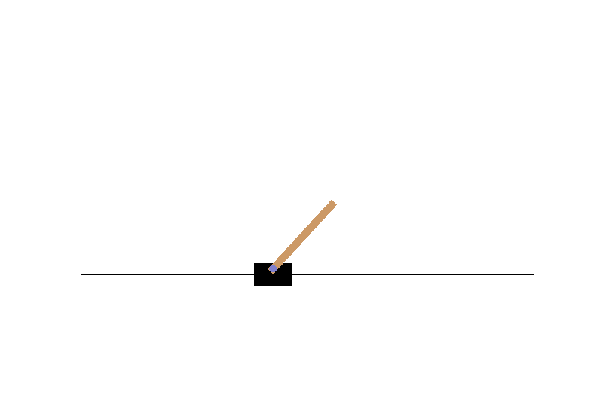
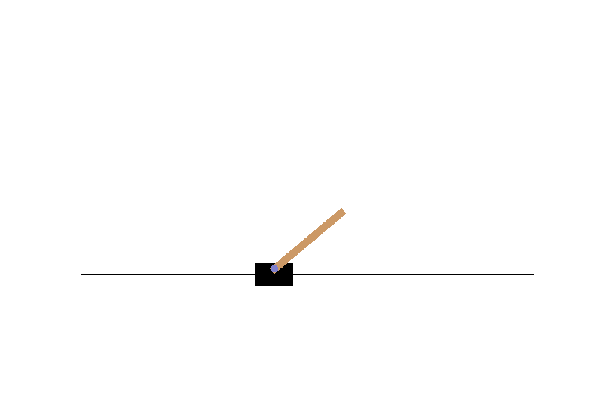
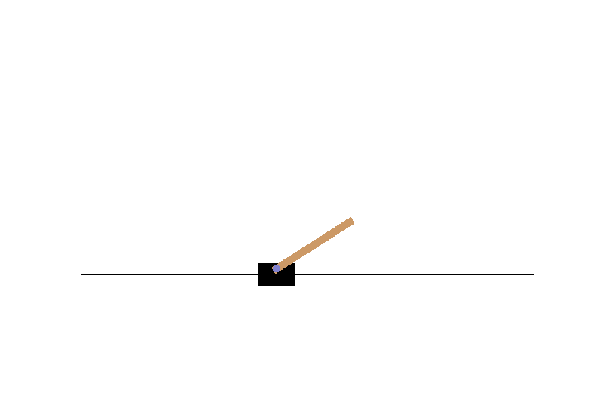
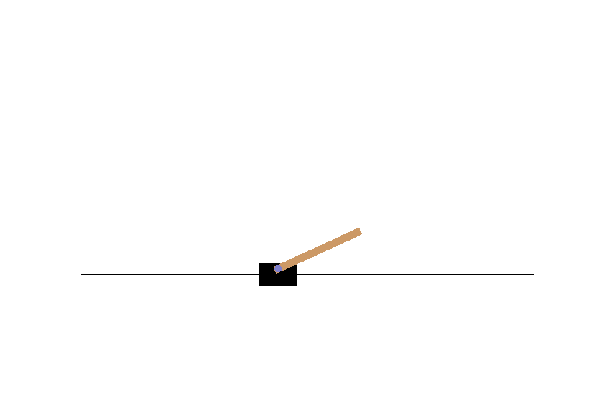
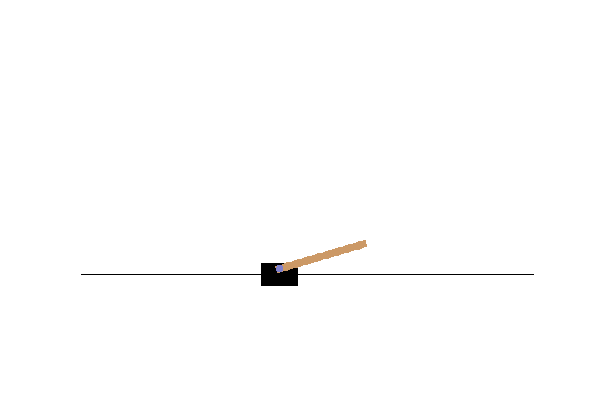
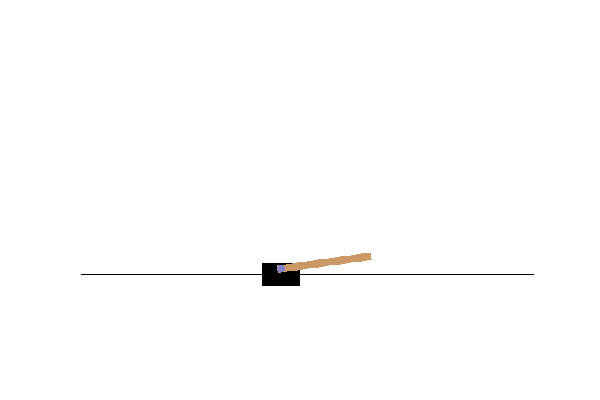
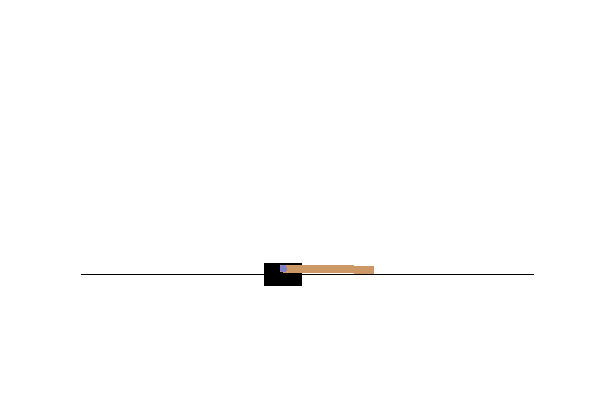
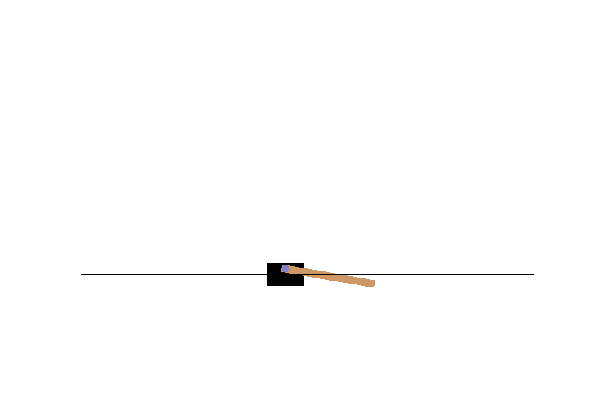
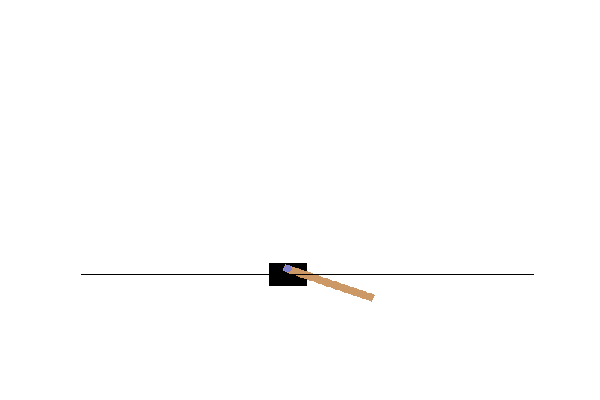
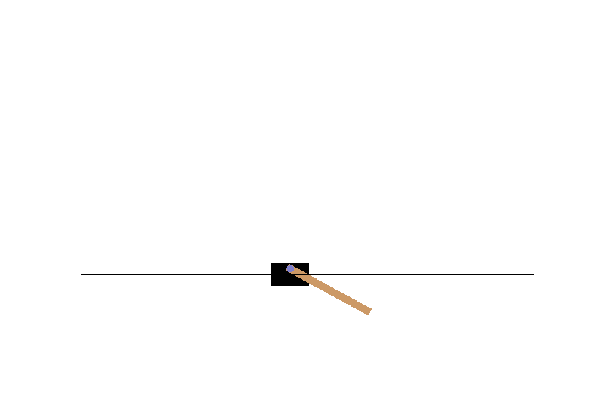
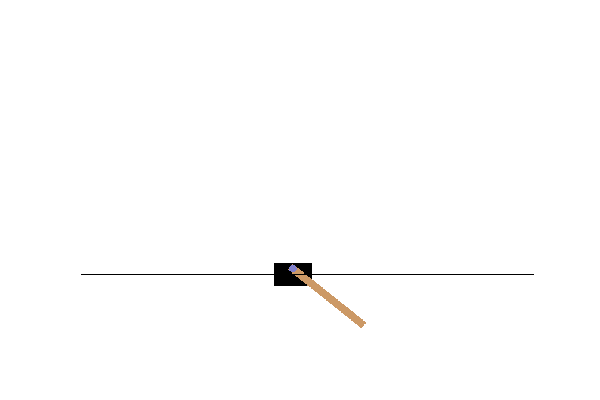
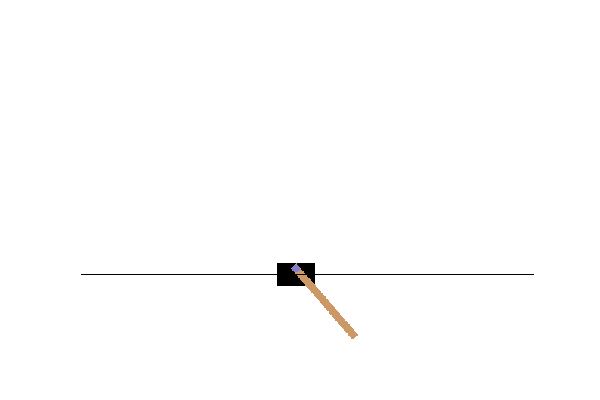
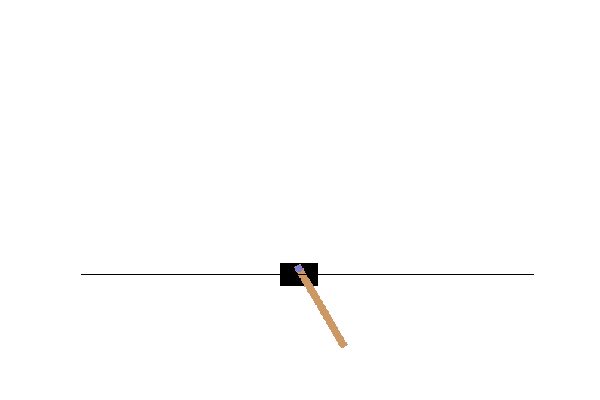
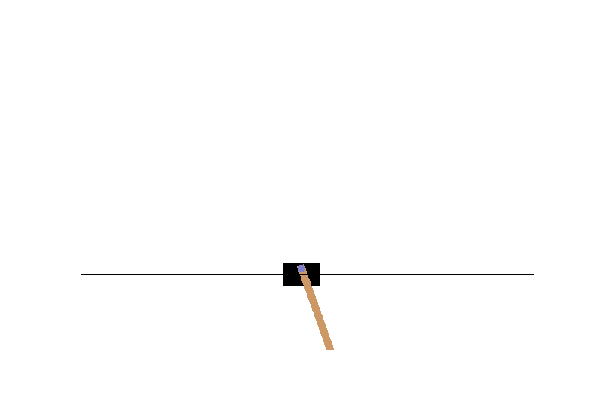
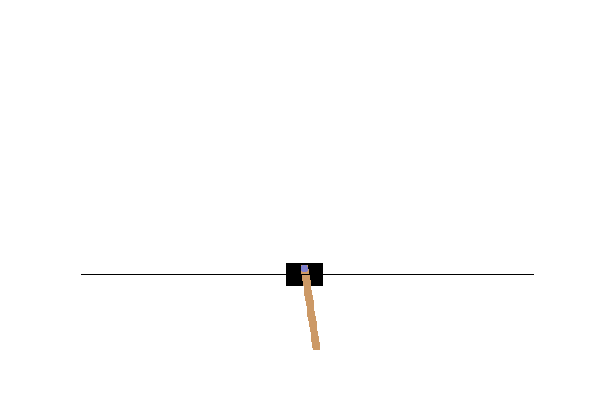
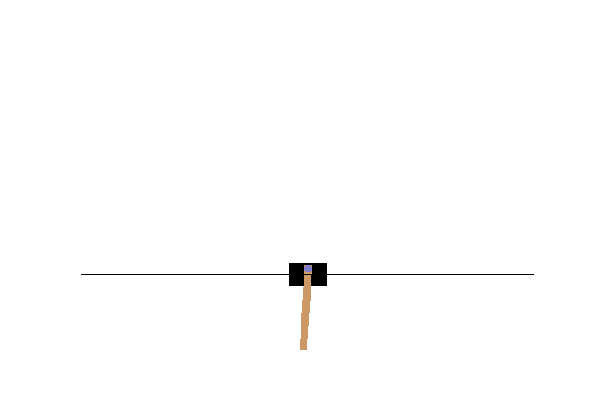
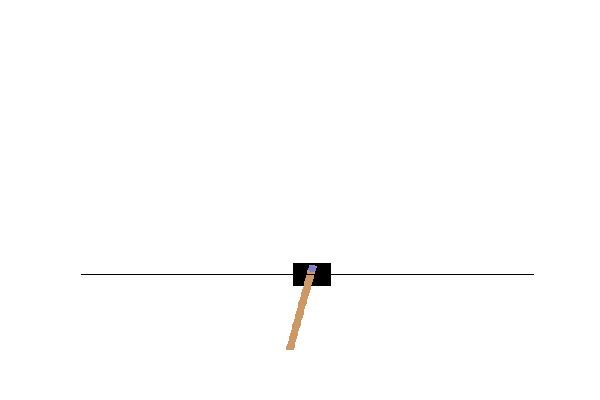
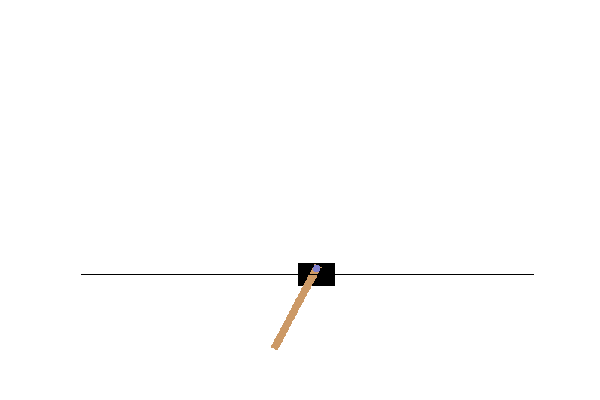
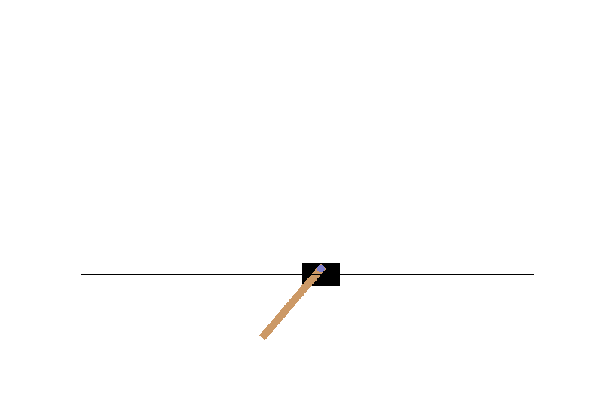
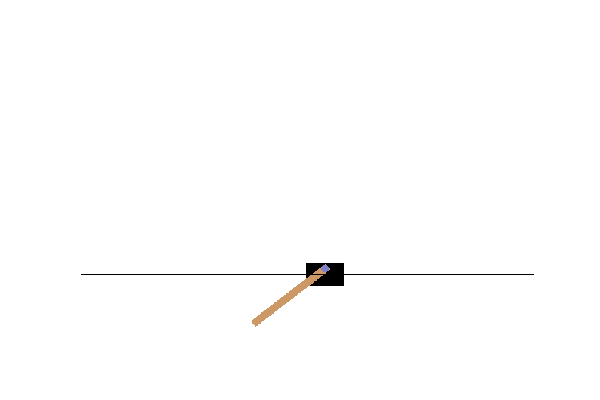
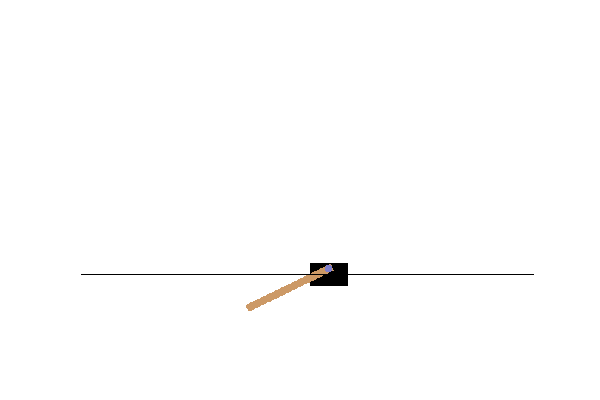
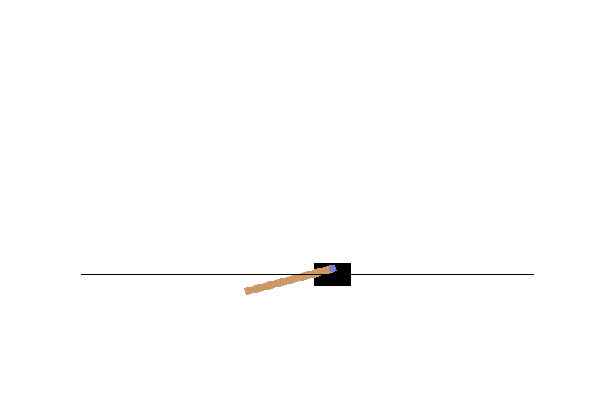
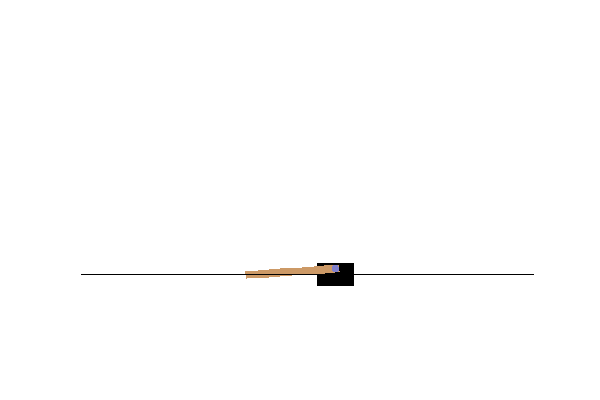
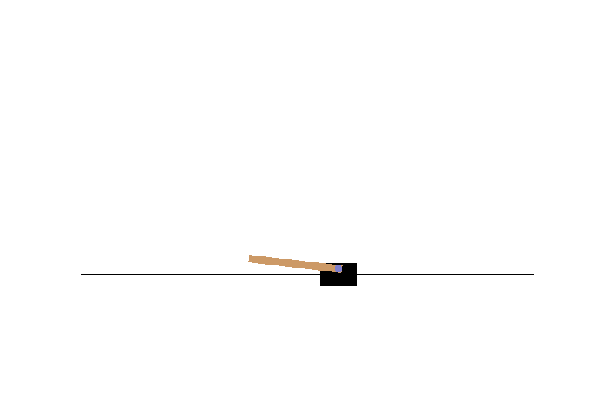
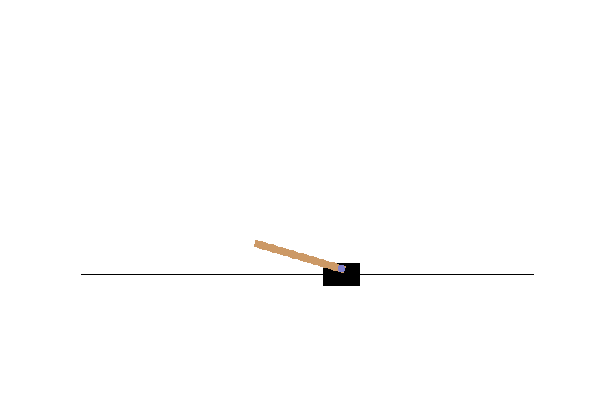
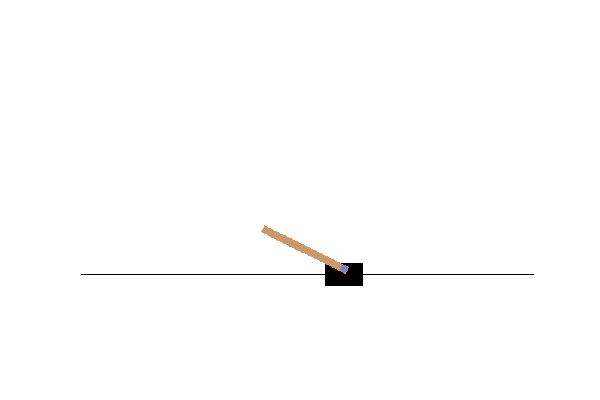
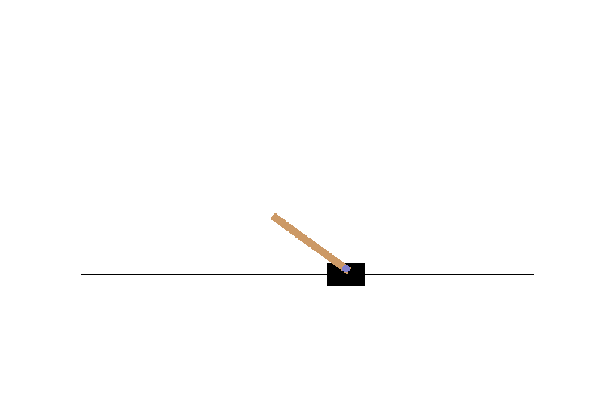
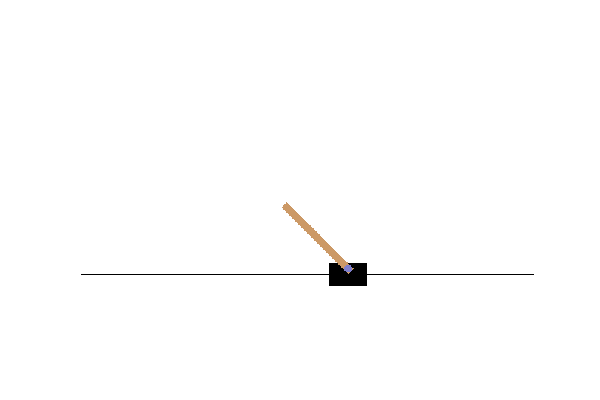
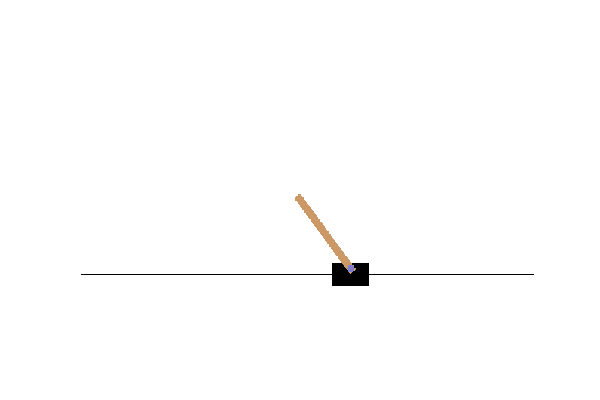
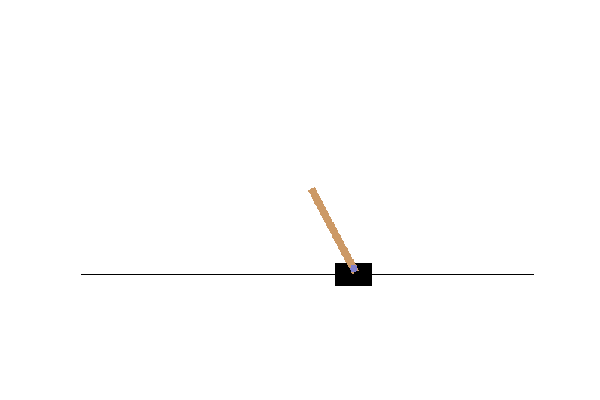
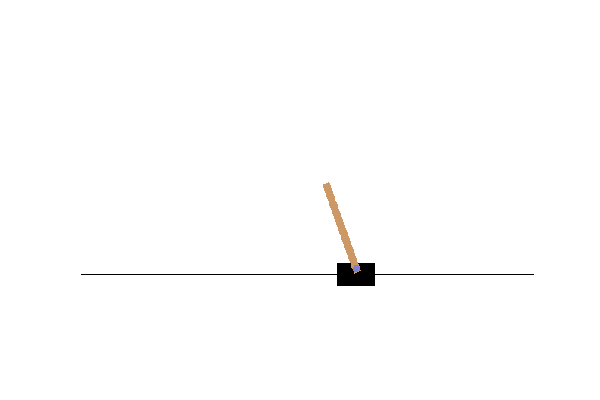
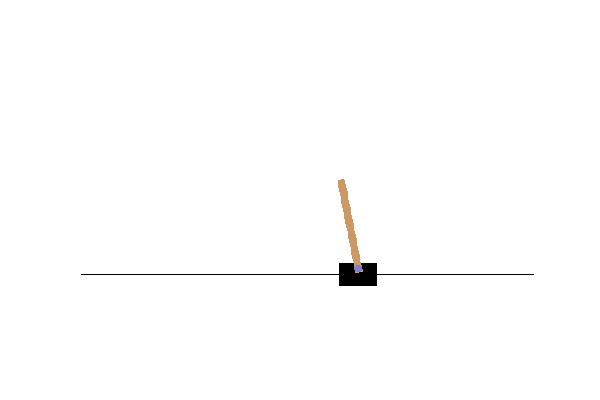
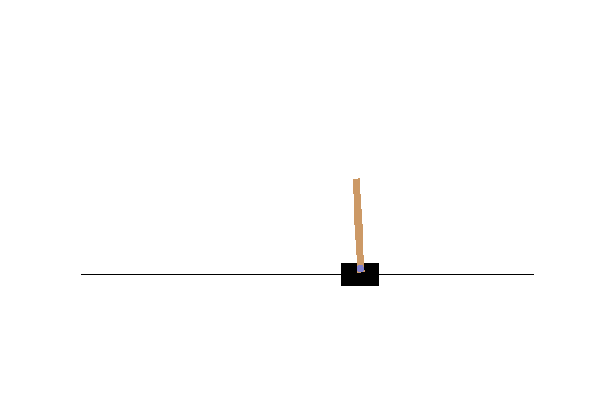
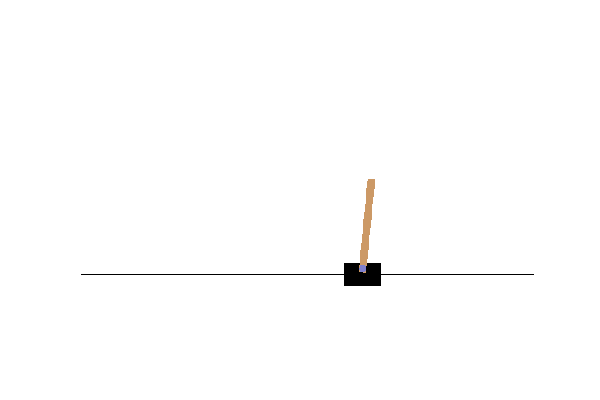
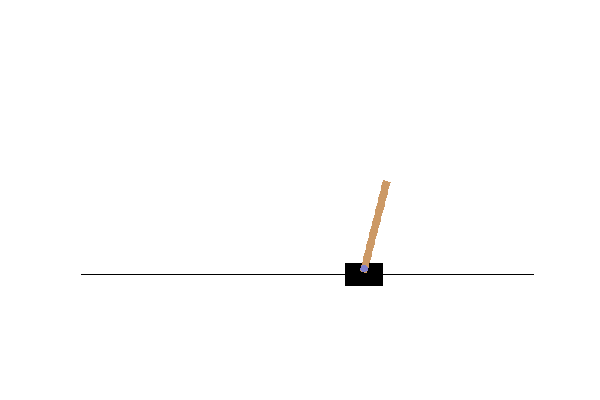
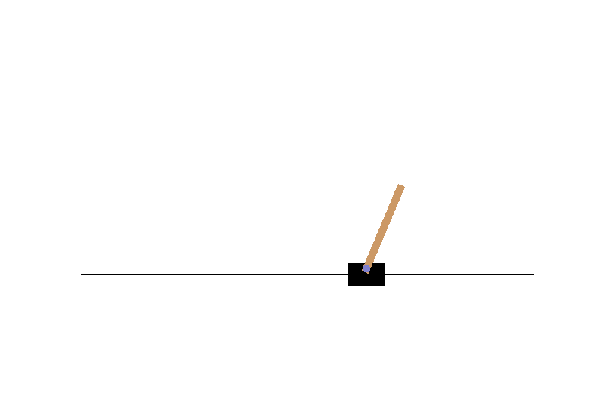
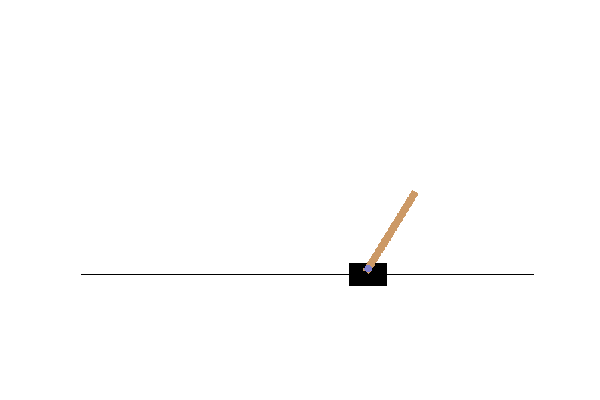
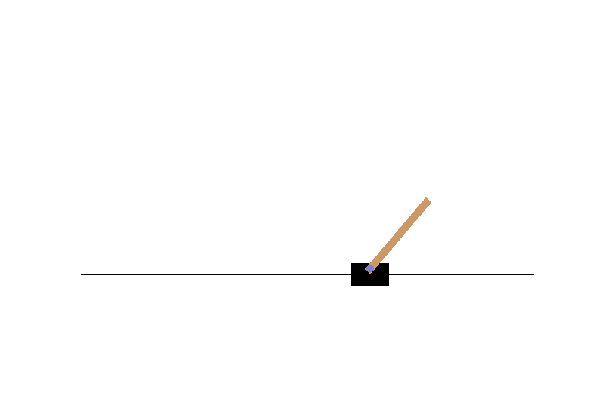
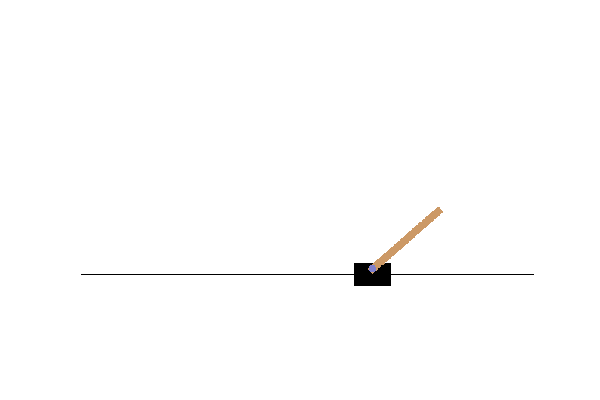
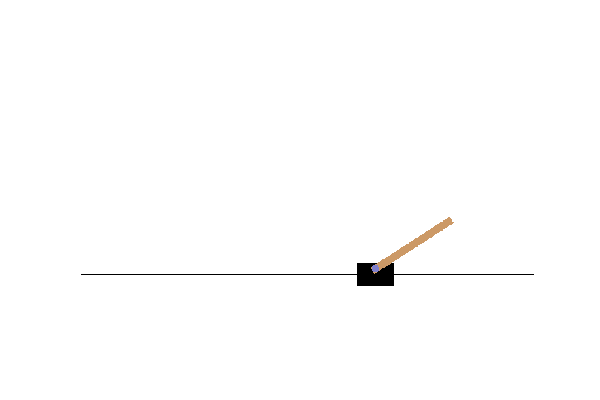
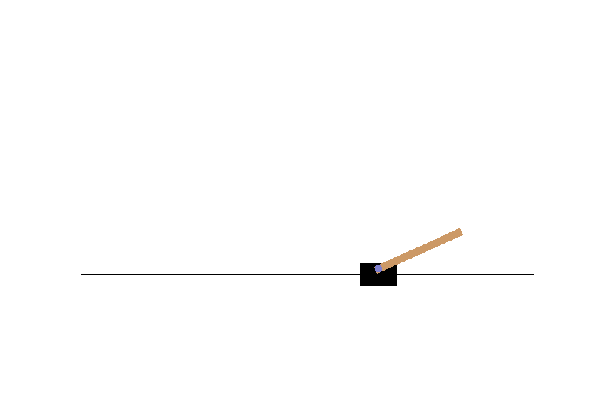
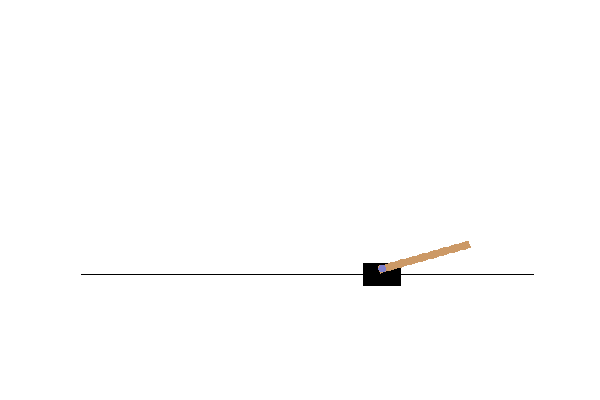
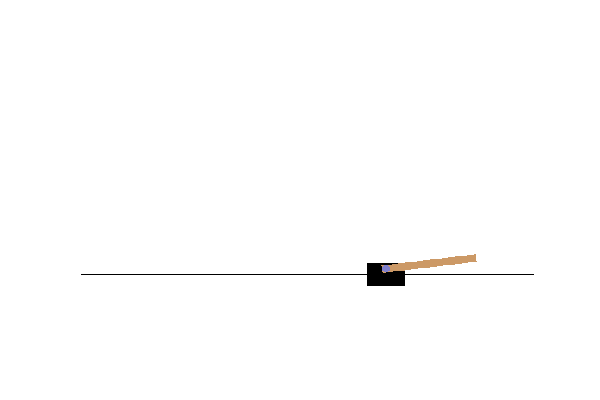
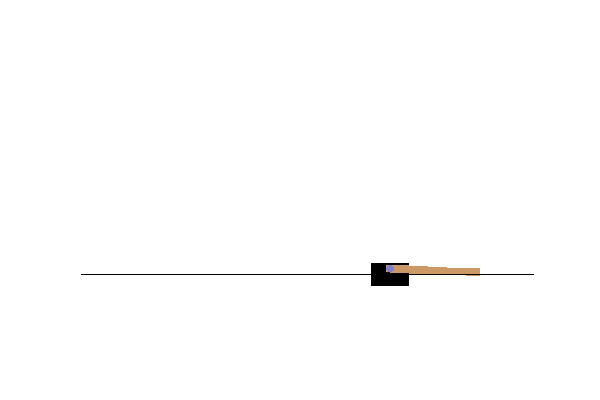
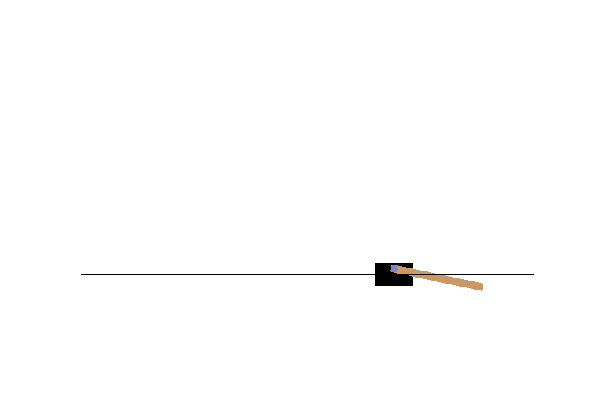
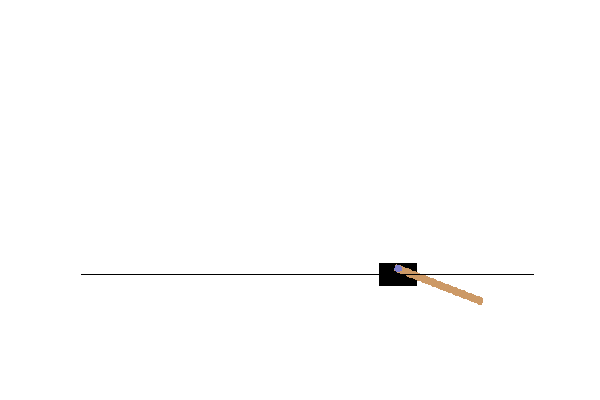
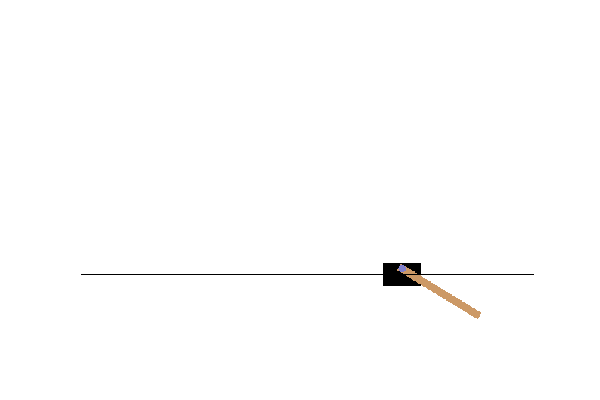
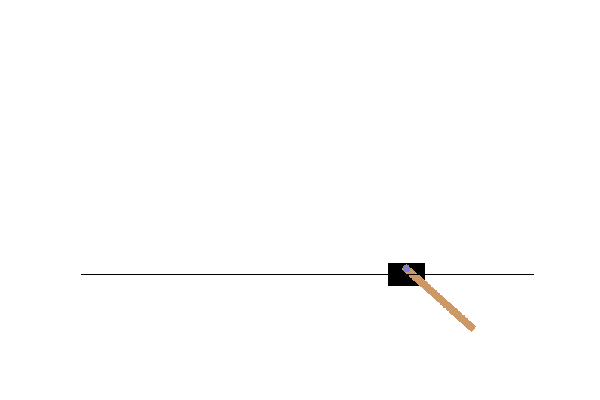
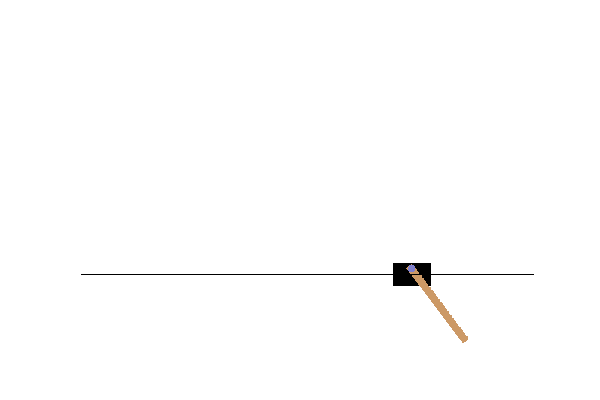
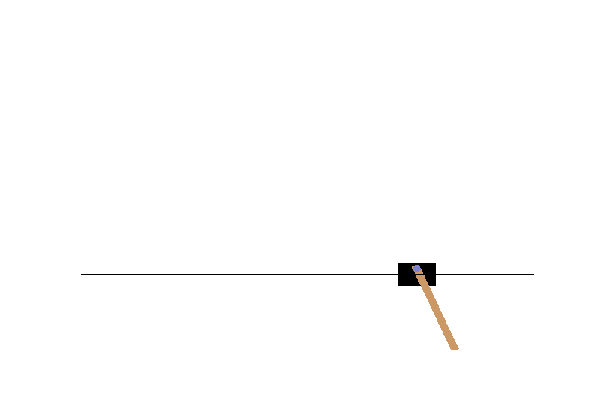
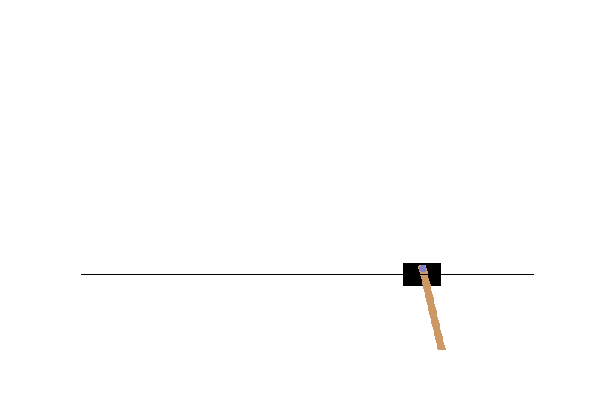
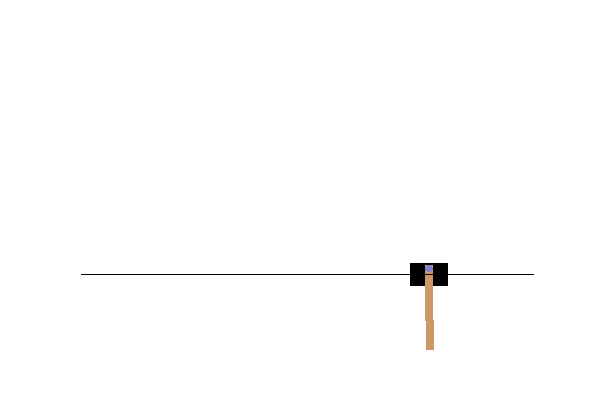
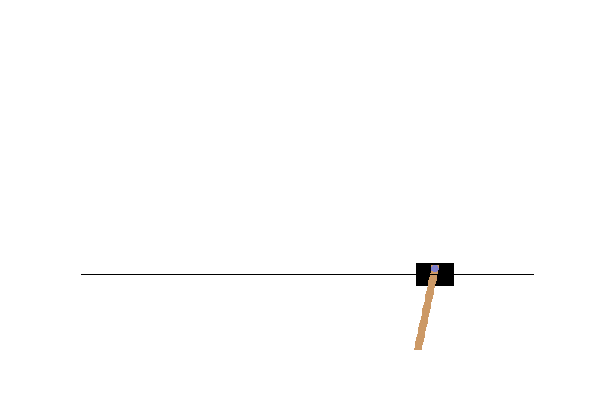
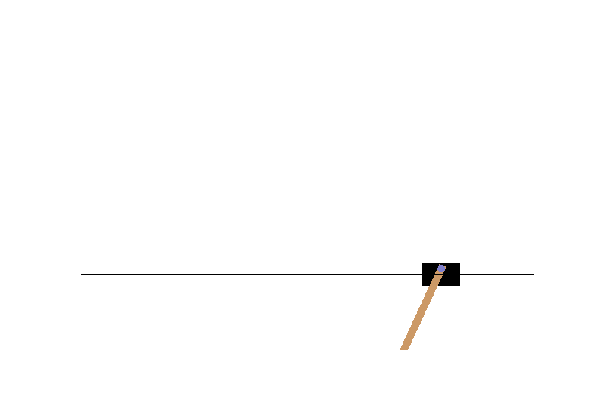
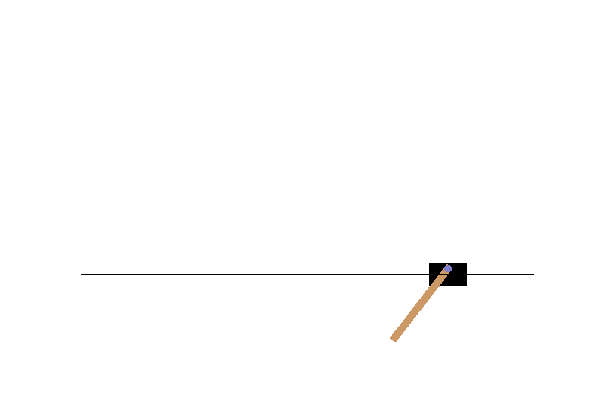
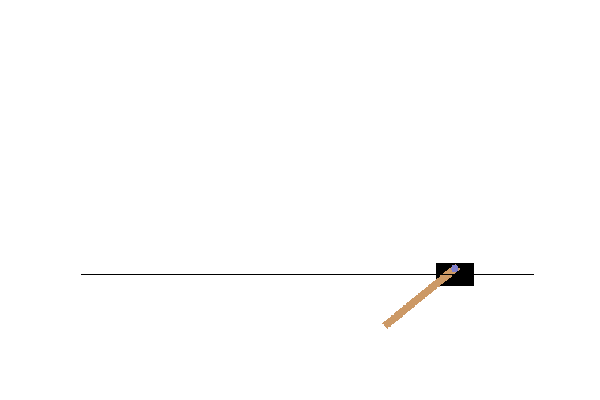
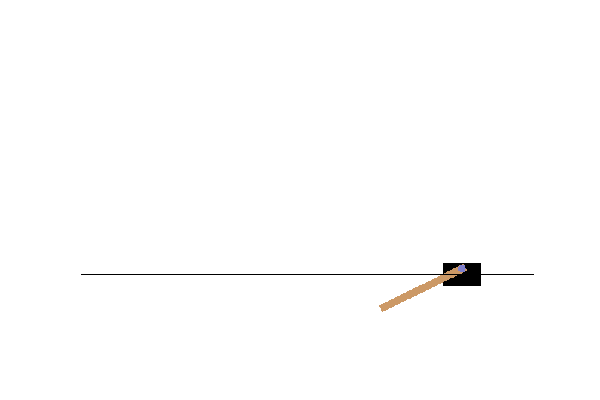
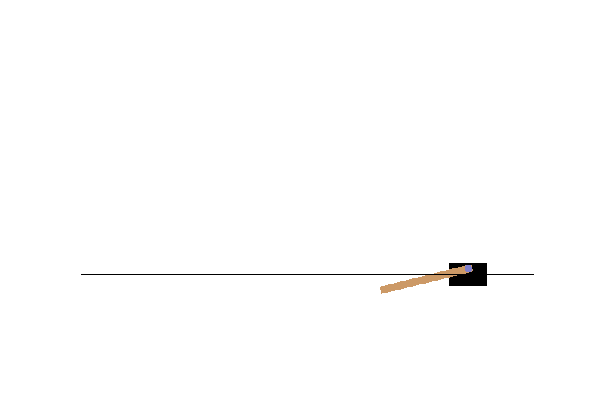
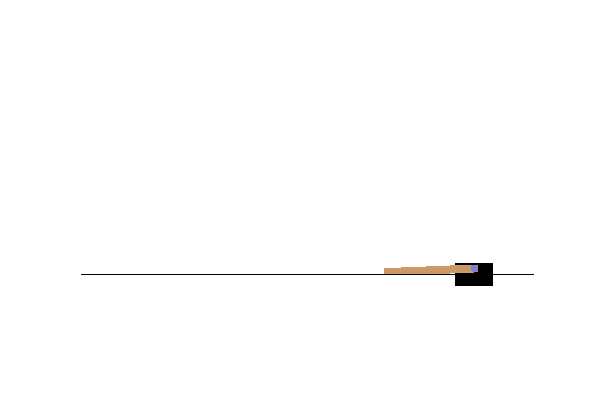
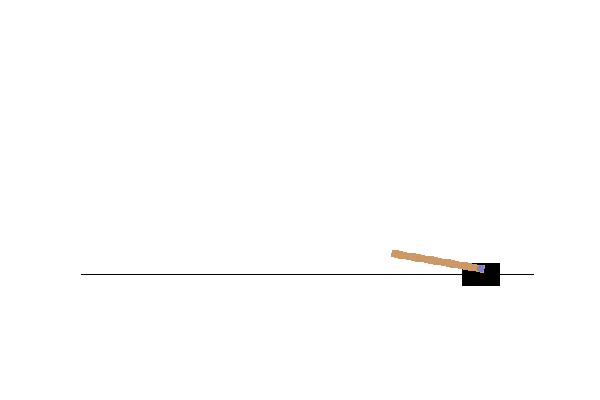
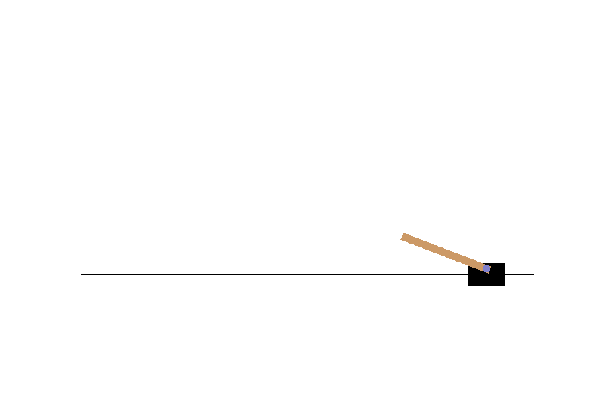
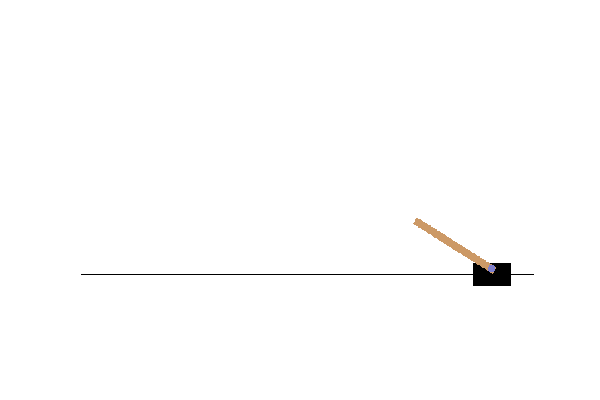
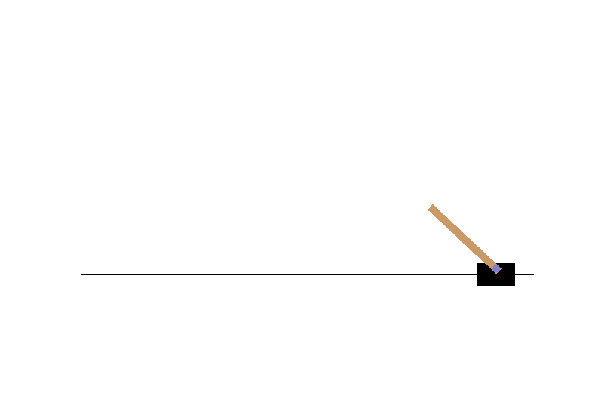
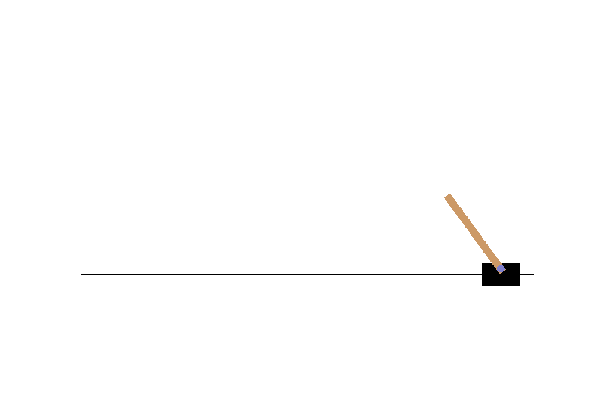
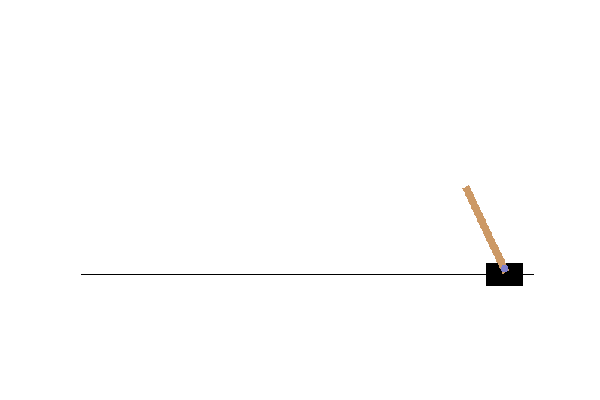
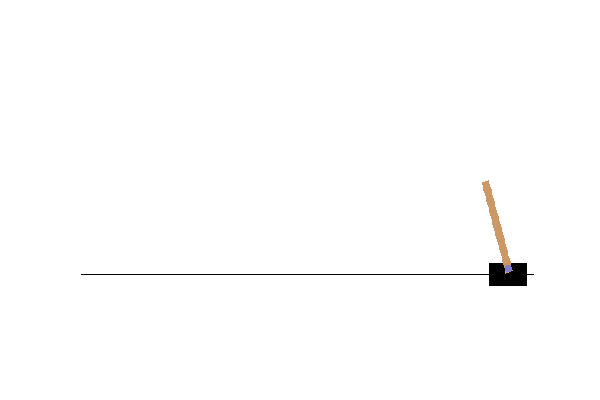

In [5]:
display_frames_as_gif(frames)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gym

ENV = 'CartPole-v0'
NUM_DIZITIZED = 6
env = gym.make(ENV)
observation = env.reset()

In [2]:
def bins(clip_min, clip_max, num):
    return np.linspace(clip_min, clip_max, num + 1)[1:-1]

In [3]:
def digitize_state(observation):
    cart_pos, cart_v, pole_angle, pole_v = observation
    digitized = [
        np.digitize(cart_pos, bins=bins(-2.4, 2.4, NUM_DIZITIZED)),
        np.digitize(cart_v, bins=bins(-3.0, 3.0, NUM_DIZITIZED)),
        np.digitize(pole_angle, bins=bins(-0.5, 0.5, NUM_DIZITIZED)),
        np.digitize(pole_v, bins=bins(-2.0, 2.0, NUM_DIZITIZED))
    ]
    return sum([x * (NUM_DIZITIZED**i) for i, x in enumerate(digitized)])

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gym
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display

def display_frames_as_gif(frames):
    plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0),
              dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    
    def animate(i):
        patch.set_data(frames[i])
        
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames),
                                  interval=50)
    
    anim.save('movie_cartpole.mp4')
    display(display_animation(anim, default_mode='loop'))

In [5]:
ENV = 'CartPole-v0'
NUM_DIZITIZED = 6
GAMMA = 0.99
ETA = 0.5
MAX_STEPS = 200
NUM_EPISODES = 1000

In [6]:
class Agent:
    def __init__(self, num_states, num_actions):
        self.brain = Brain(num_states, num_actions)
        
    def update_Q_function(self, observation, action, reward, observation_next):
        self.brain.update_Q_table(
        observation, action, reward, observation_next)
        
    def get_action(self, observation, step):
        action = self.brain.decide_action(observation, step)
        return action

In [7]:
class Brain:
    
    def __init__(self, num_states, num_actions):
        self.num_actions = num_actions
        
        self.q_table = np.random.uniform(low=0, high=1, size=(NUM_DIZITIZED**num_states, num_actions))#ランダムな初期値
        
    def bins(self, clip_min, clip_max, num):
        return np.linspace(clip_min, clip_max, num + 1)[1:-1]
    
    def digitize_state(self, observation):
        cart_pos, cart_v, pole_angle, pole_v = observation
        digitized = [
        np.digitize(cart_pos, bins=self.bins(-2.4, 2.4, NUM_DIZITIZED)),
        np.digitize(cart_v, bins=self.bins(-3.0, 3.0, NUM_DIZITIZED)),
        np.digitize(pole_angle, bins=self.bins(-0.5, 0.5, NUM_DIZITIZED)),
        np.digitize(pole_v, bins=self.bins(-2.0, 2.0, NUM_DIZITIZED))
        ]
        return sum([x * (NUM_DIZITIZED**i) for i, x in enumerate(digitized)])
    
    def update_Q_table(self, observation, action, reward, observation_next):
        state = self.digitize_state(observation)
        state_next = self.digitize_state(observation_next)
        Max_Q_next = max(self.q_table[state_next][:])
        self.q_table[state, action] = self.q_table[state, action] + \
        ETA * (reward + GAMMA * Max_Q_next - self.q_table[state, action])
        
    def decide_action(self, observation, episode):
        state = self.digitize_state(observation)
        epsilon = 0.5 * (1 / (episode + 1))
        
        if epsilon <= np.random.uniform(0, 1):
            action = np.argmax(self.q_table[state][:])
        else:
            action = np.random.choice(self.num_actions)
        return action

In [8]:
class Environment:
    
    def __init__(self):
        self.env = gym.make(ENV)
        num_states = self.env.observation_space.shape[0]
        num_actions = self.env.action_space.n
        
        #print(num_states)
        #print(num_actions)
        
        self.agent = Agent(num_states, num_actions)
        
    def run(self):
        complete_episodes = 0
        is_episode_final = False
        frames = []
        
        for episode in range(NUM_EPISODES):
            observation = self.env.reset()
            
            for step in range(MAX_STEPS):
                
                if is_episode_final is True:
                    
                    frames.append(self.env.render(mode='rgb_array'))
                    
                action = self.agent.get_action(observation, episode)
                
                observation_next, _, done, _ = self.env.step(action)
                
                if done:
                    if step < 195:
                        reward = -1
                        complete_episode = 0
                        
                    else:
                        reward = 1
                        complete_episodes += 1
                else:
                    reward = 0
                    
                self.agent.update_Q_function(observation, action, reward, observation_next)
                    
                observation = observation_next
                
                if done:
                    print('{0} Episode : Finished after {1} time steps'.format(episode, step + 1))
                    break
                    
            if is_episode_final is True:
                display_frames_as_gif(frames)
                break
                
            if complete_episodes >= 10:
                print('10回連続成功')
                is_episode_final = True

0 Episode : Finished after 27 time steps
1 Episode : Finished after 11 time steps
2 Episode : Finished after 11 time steps
3 Episode : Finished after 15 time steps
4 Episode : Finished after 11 time steps
5 Episode : Finished after 11 time steps
6 Episode : Finished after 16 time steps
7 Episode : Finished after 46 time steps
8 Episode : Finished after 47 time steps
9 Episode : Finished after 98 time steps
10 Episode : Finished after 18 time steps
11 Episode : Finished after 21 time steps
12 Episode : Finished after 9 time steps
13 Episode : Finished after 9 time steps
14 Episode : Finished after 11 time steps
15 Episode : Finished after 37 time steps
16 Episode : Finished after 10 time steps
17 Episode : Finished after 34 time steps
18 Episode : Finished after 147 time steps
19 Episode : Finished after 84 time steps
20 Episode : Finished after 71 time steps
21 Episode : Finished after 63 time steps
22 Episode : Finished after 72 time steps
23 Episode : Finished after 10 time steps
24 


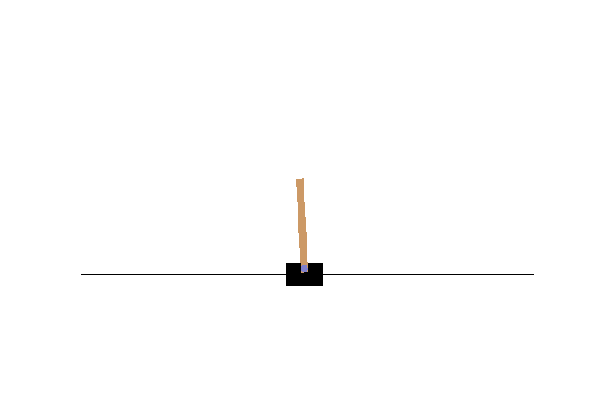
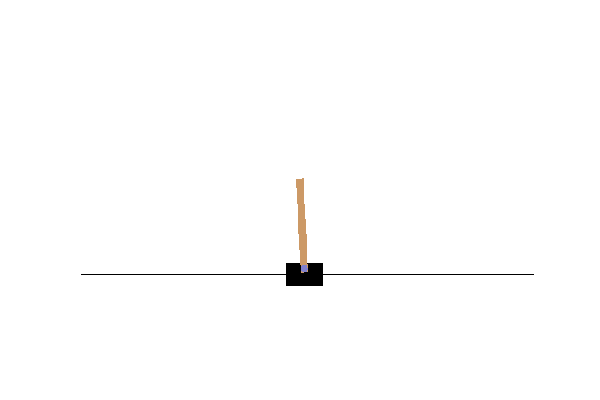
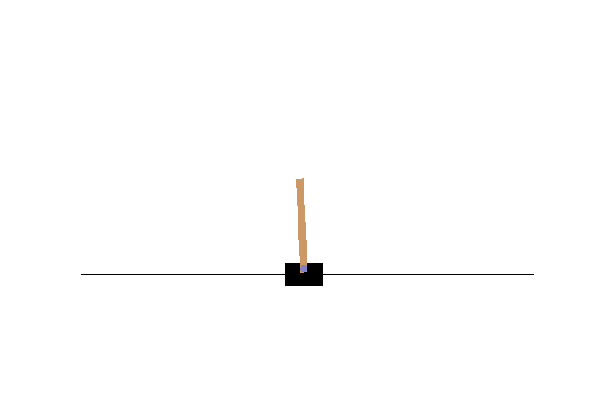
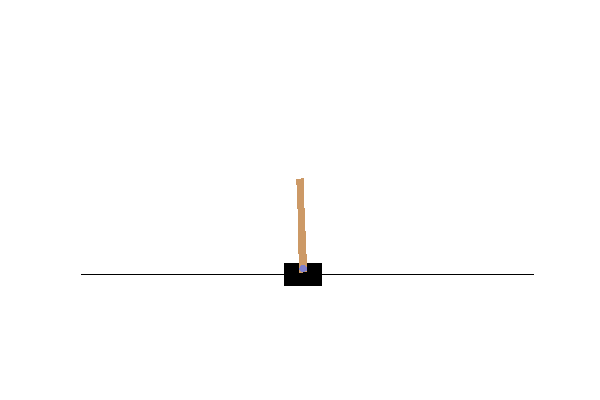
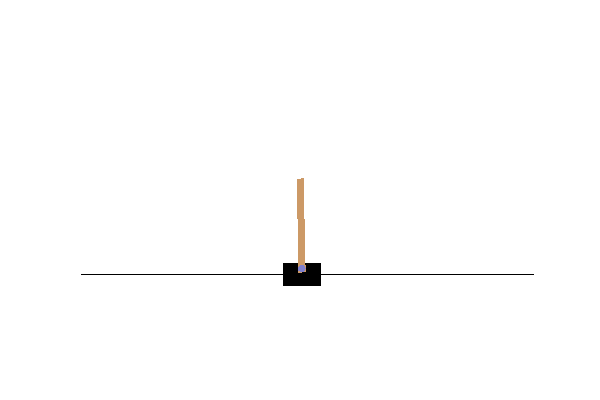
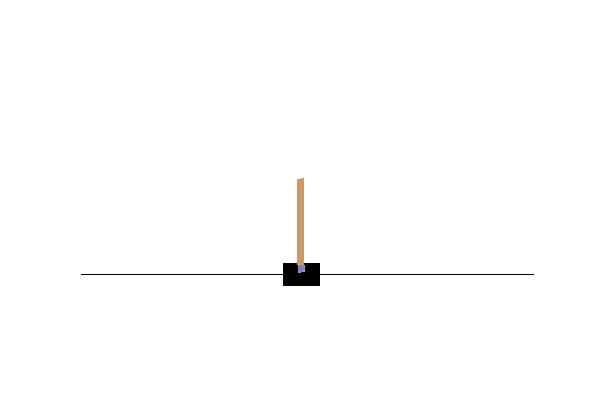
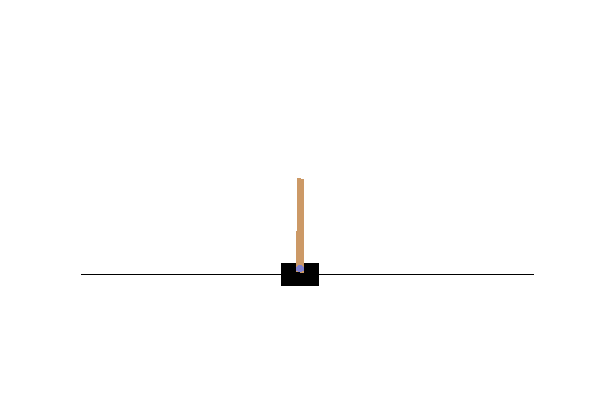
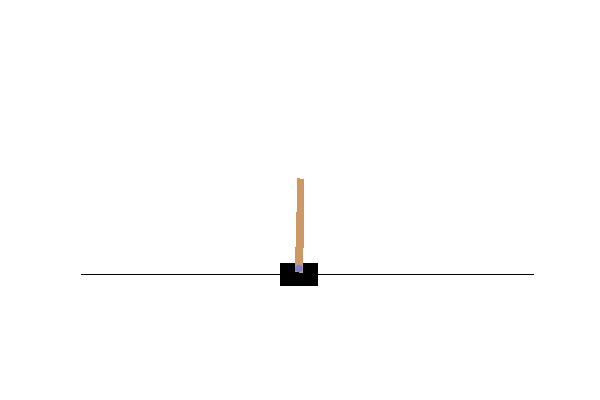
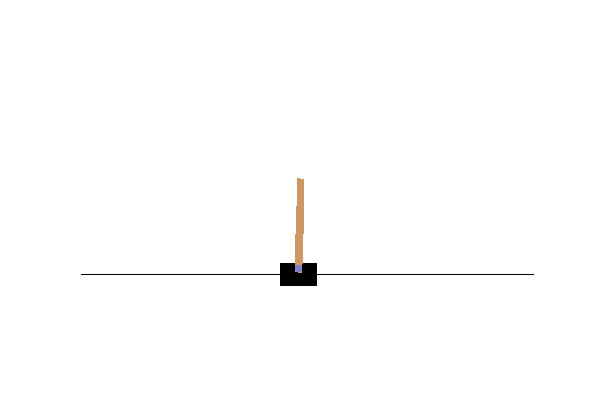
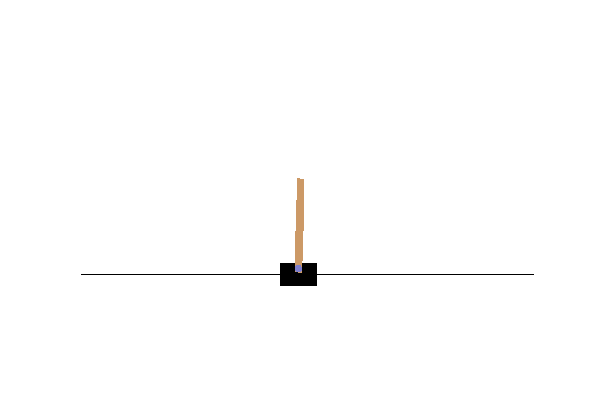
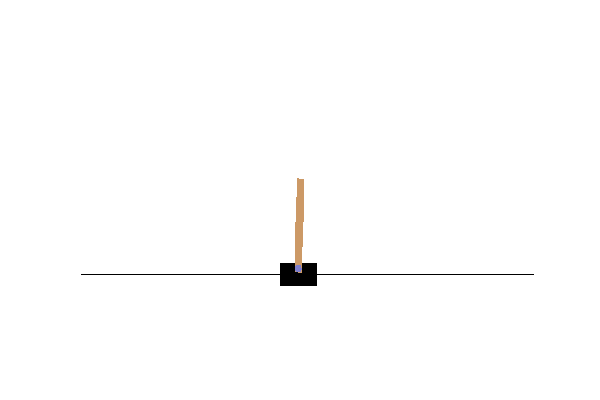
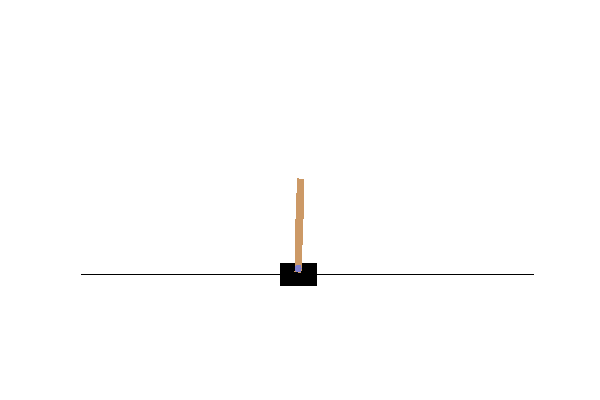
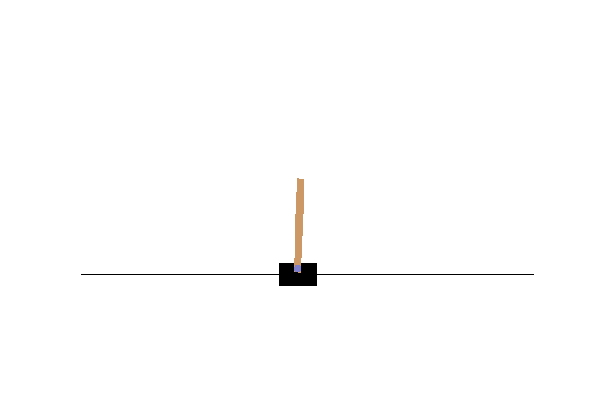
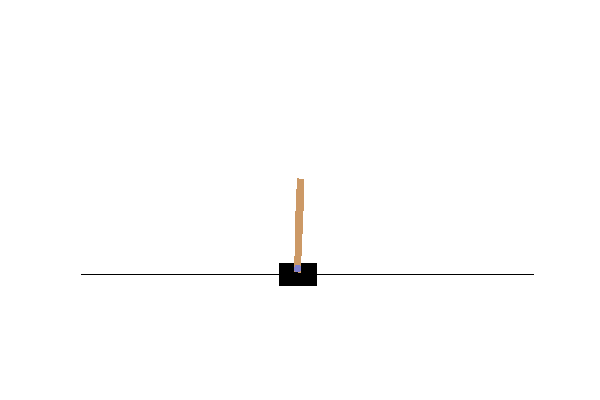
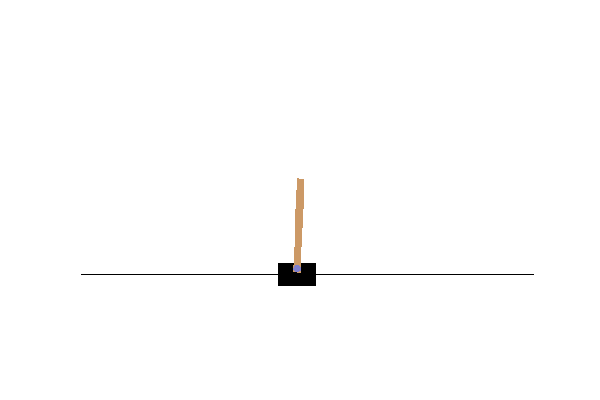
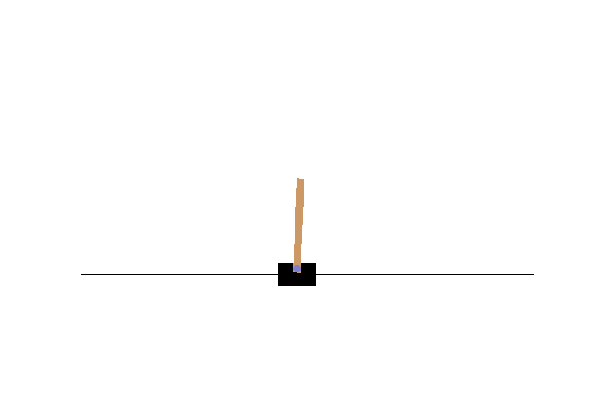
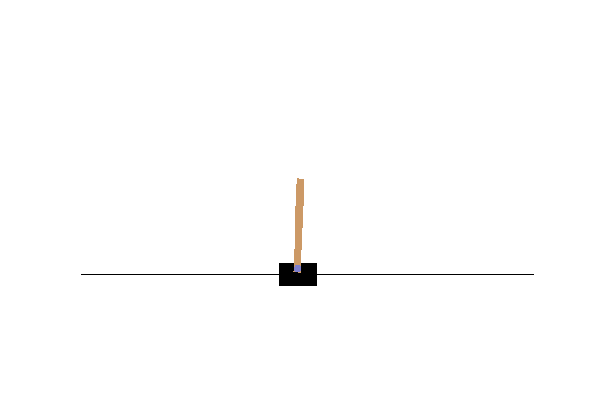
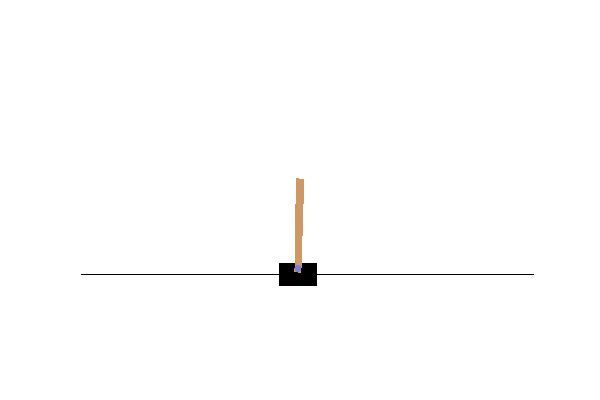
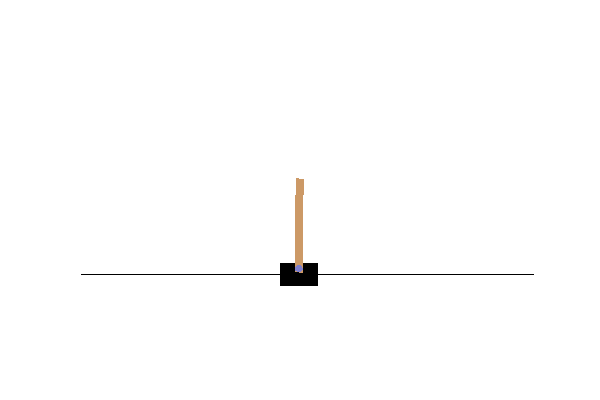
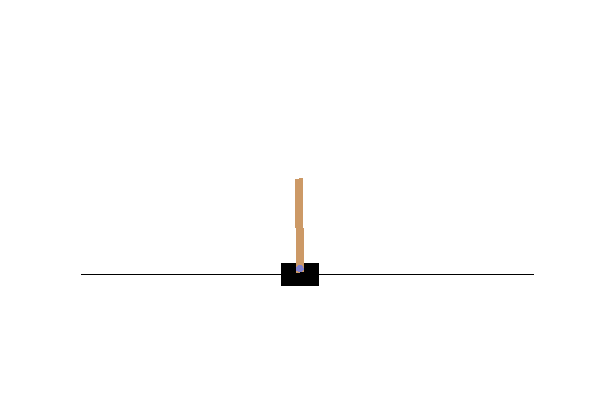
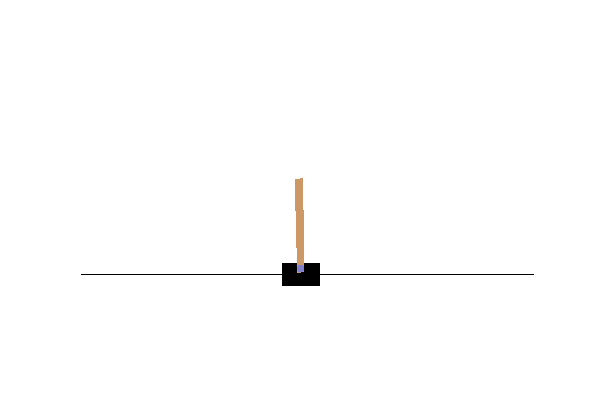
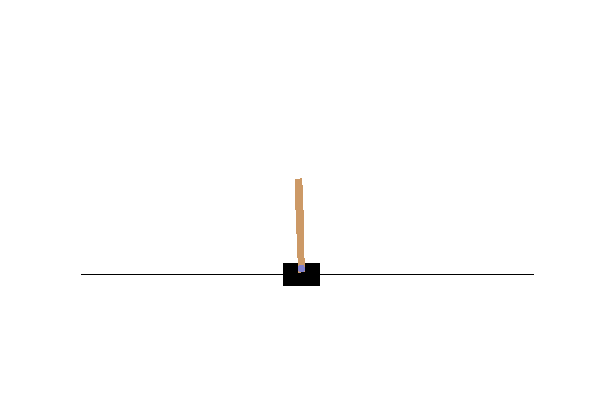
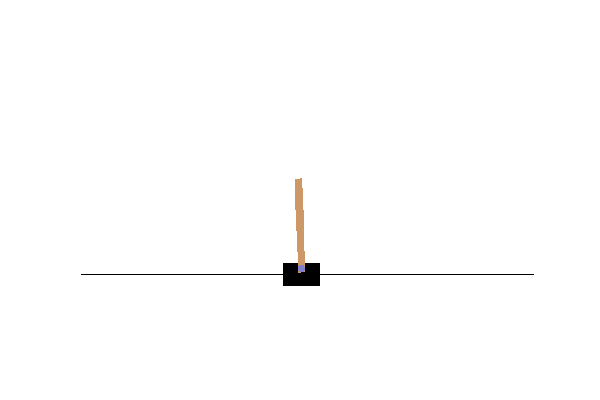
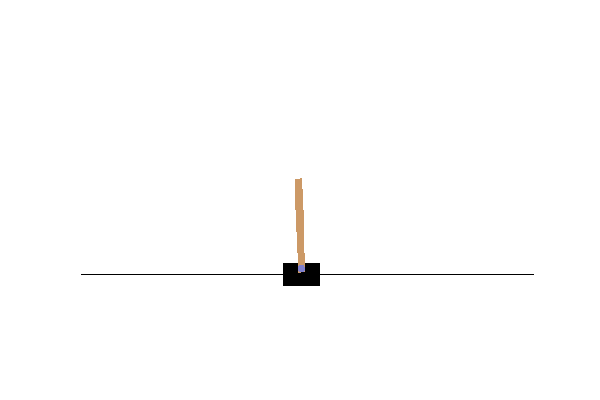
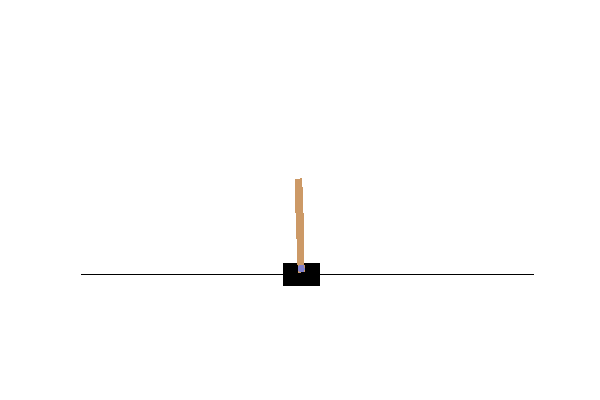
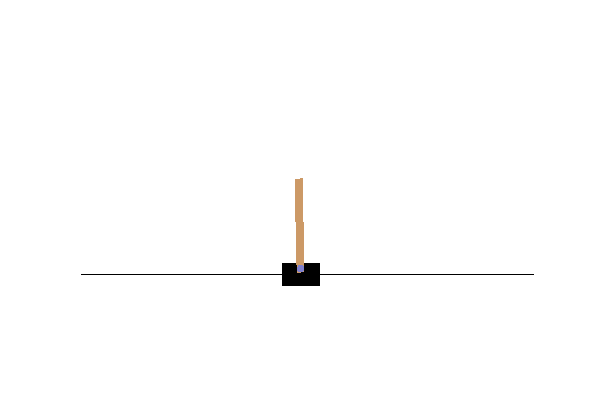
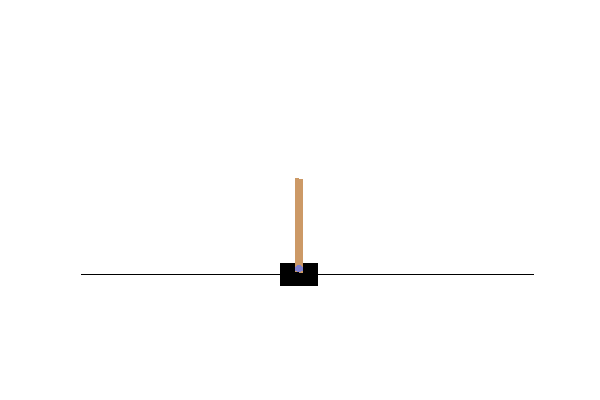
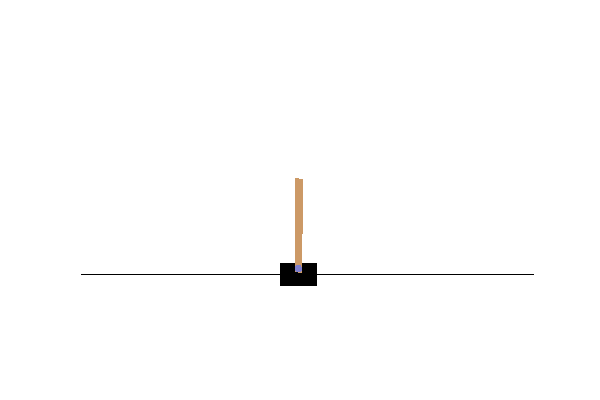
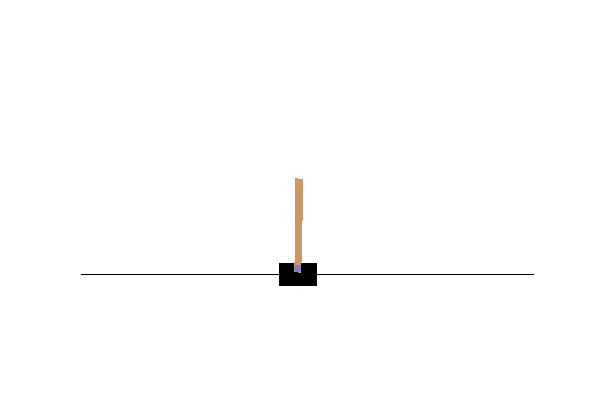
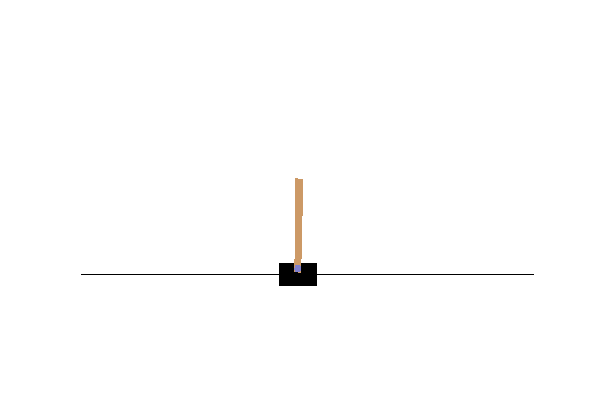
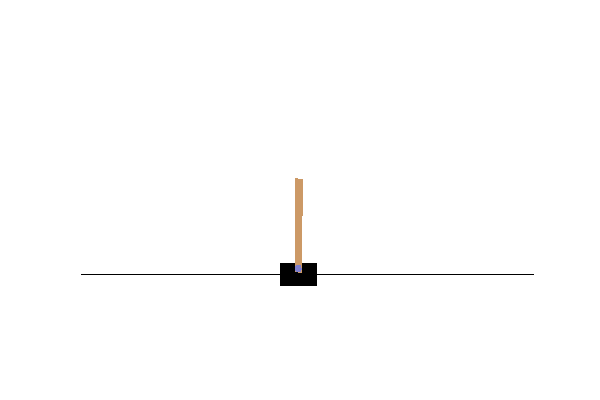
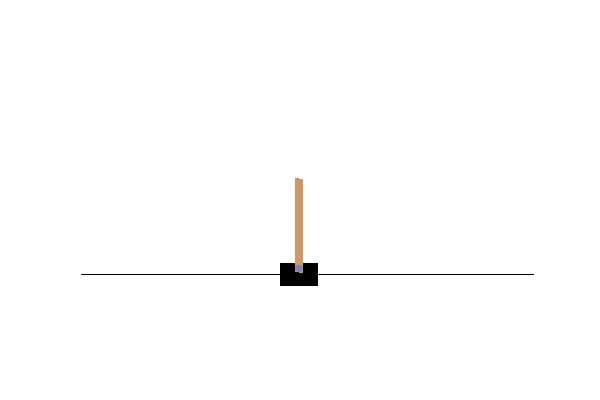
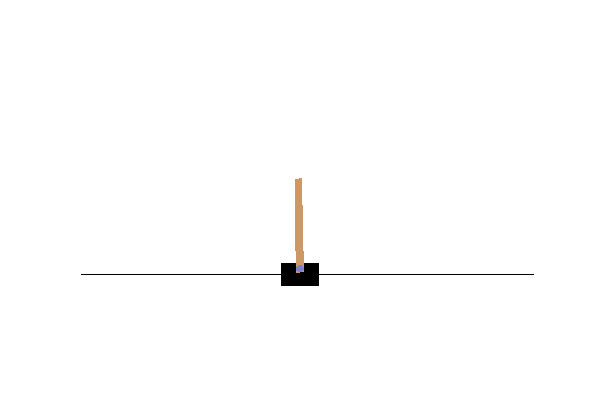
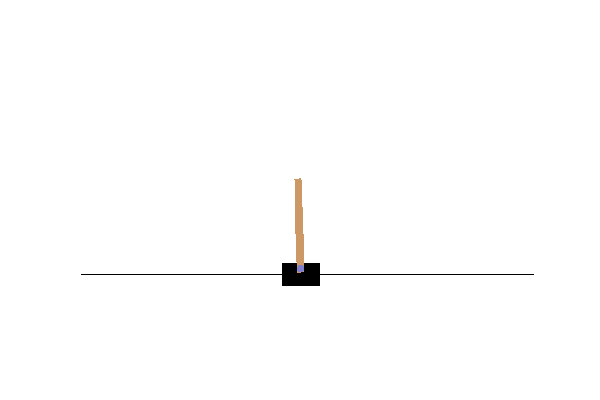
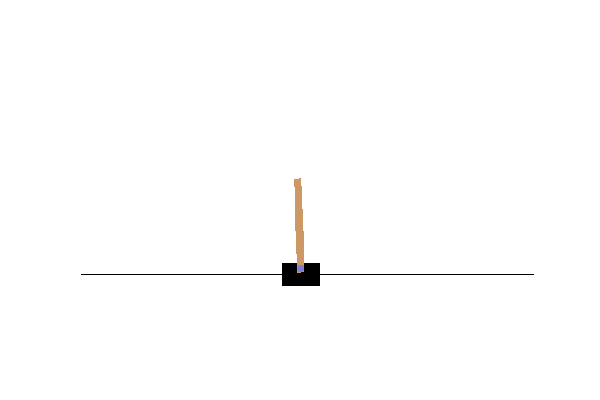
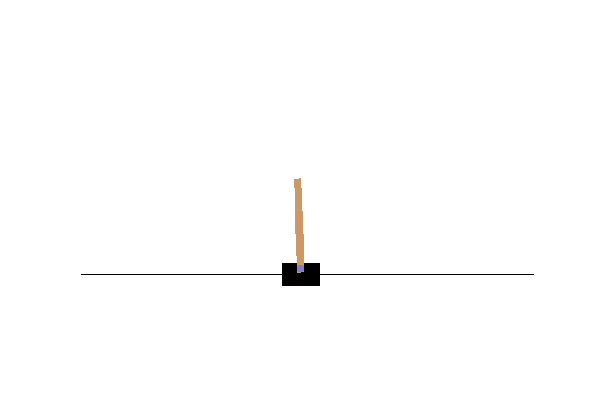
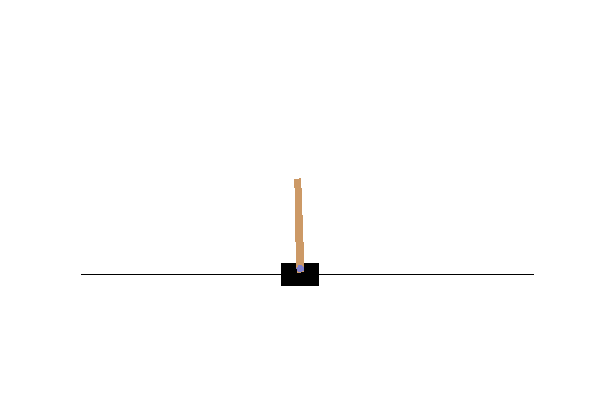
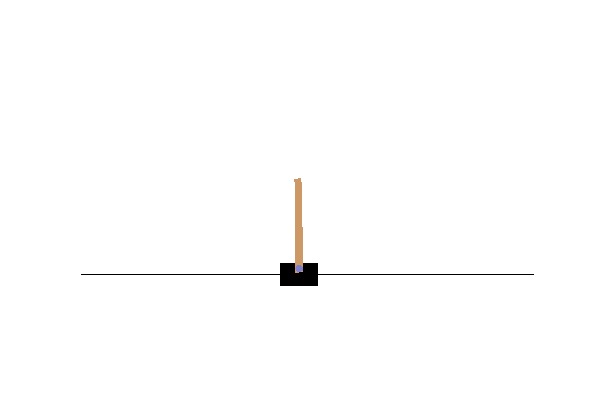
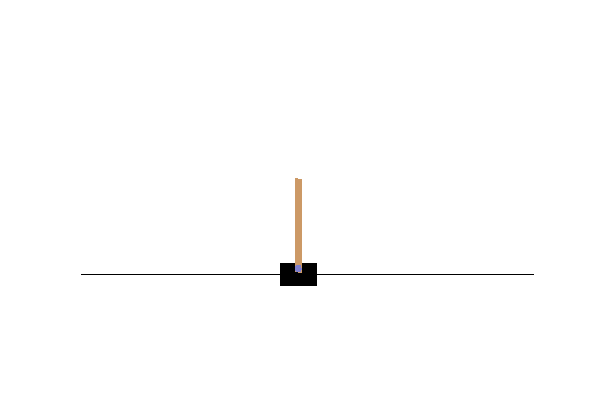
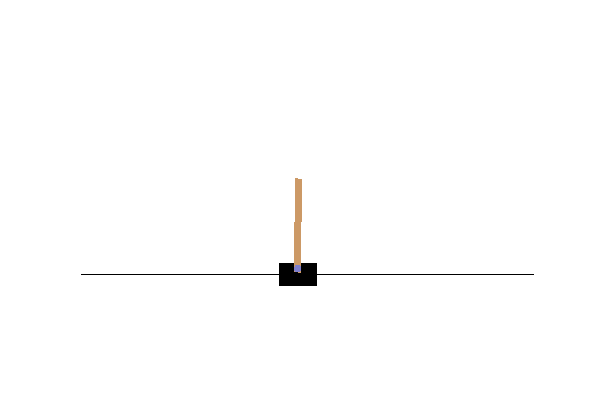
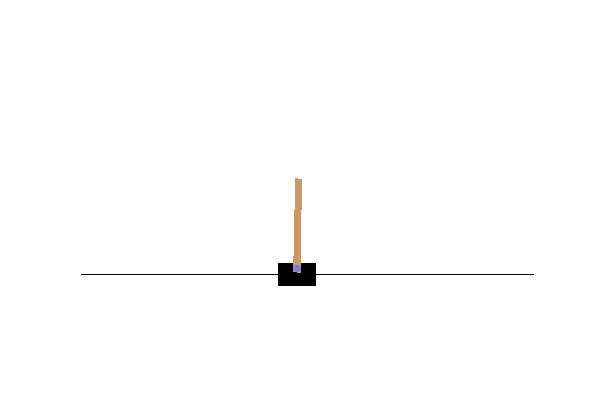
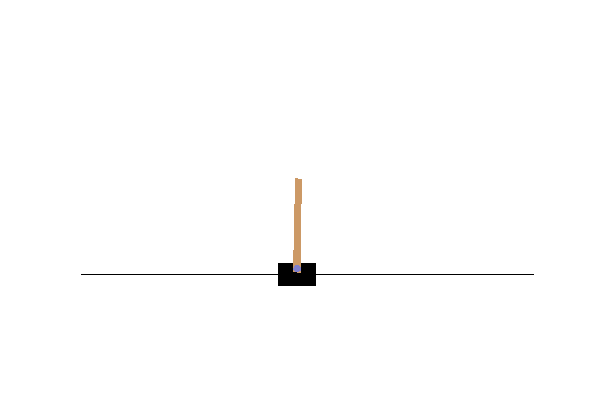
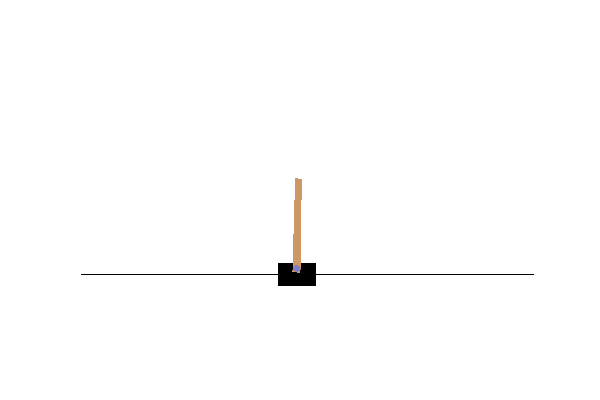
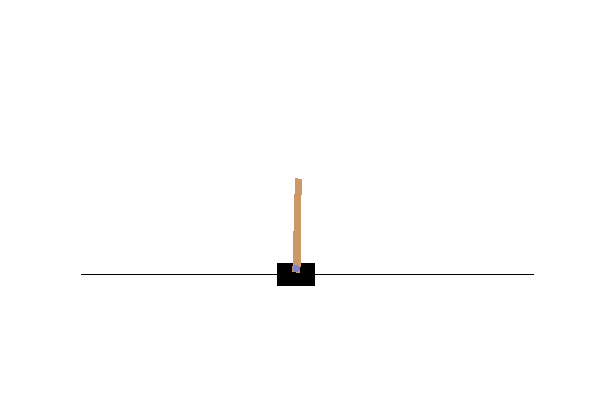
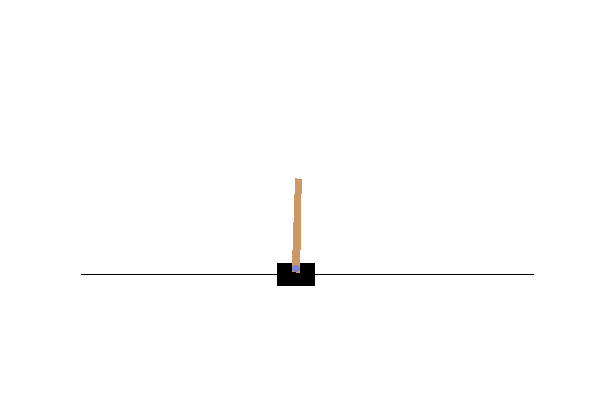
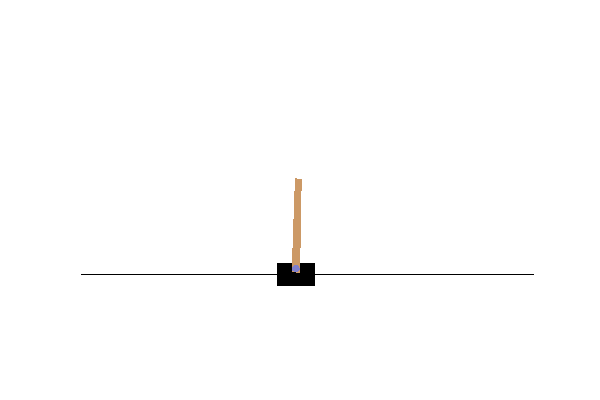
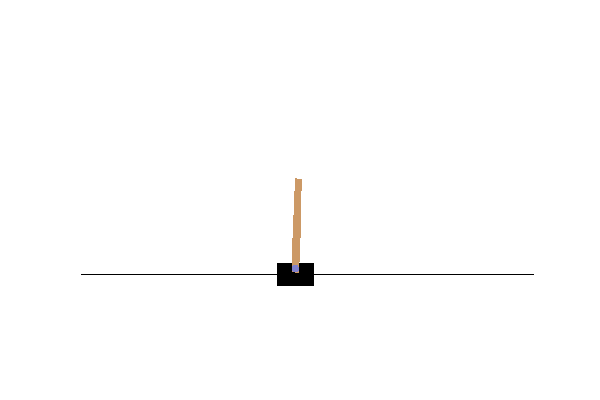
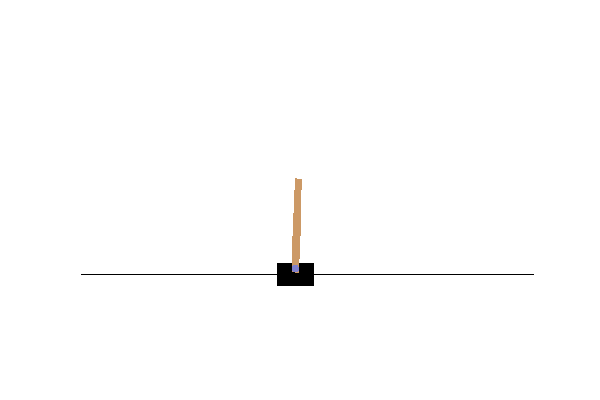
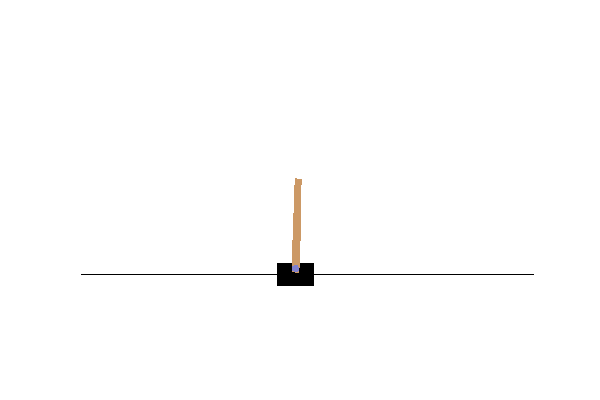
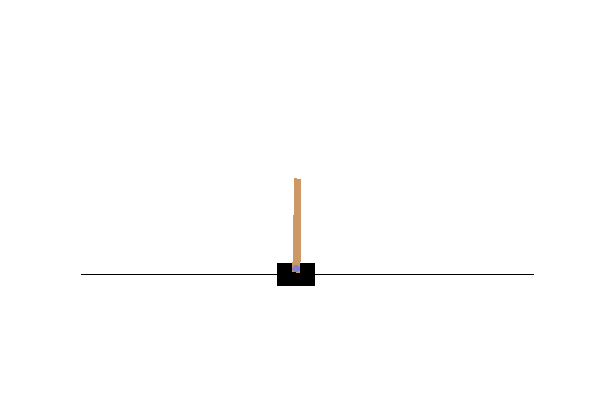
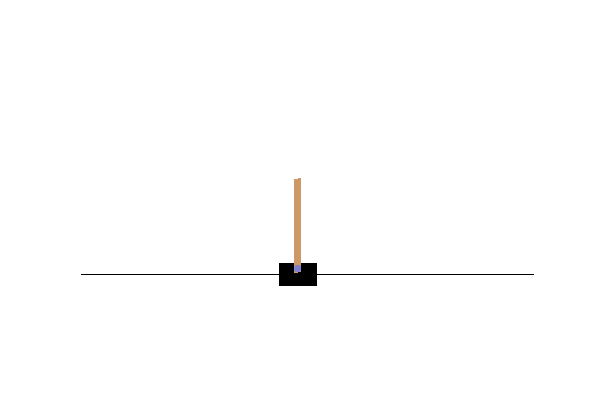
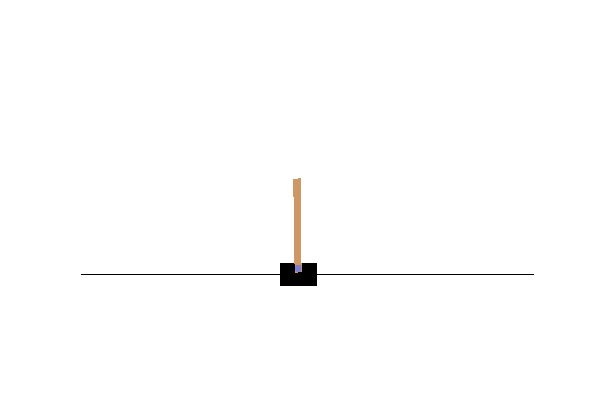
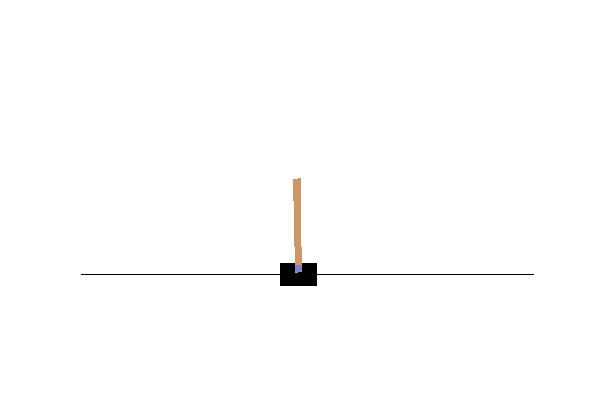
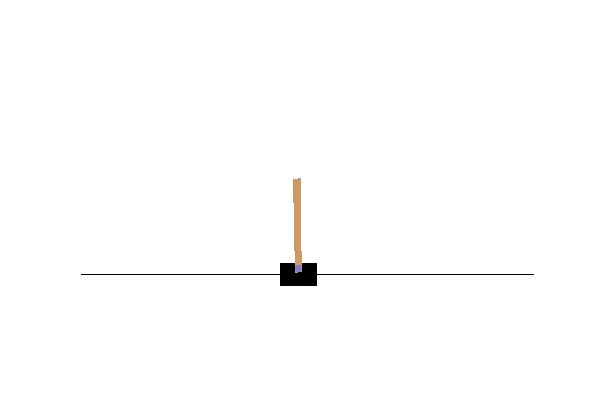
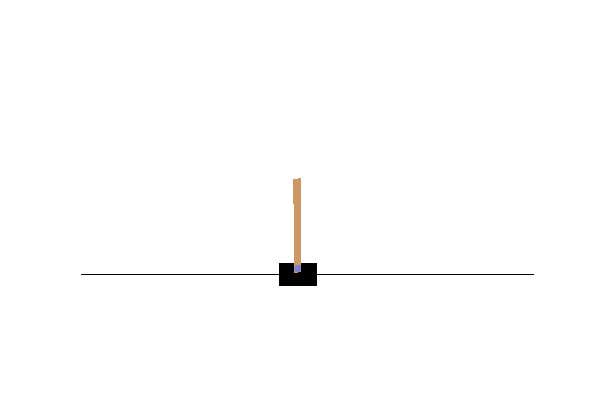
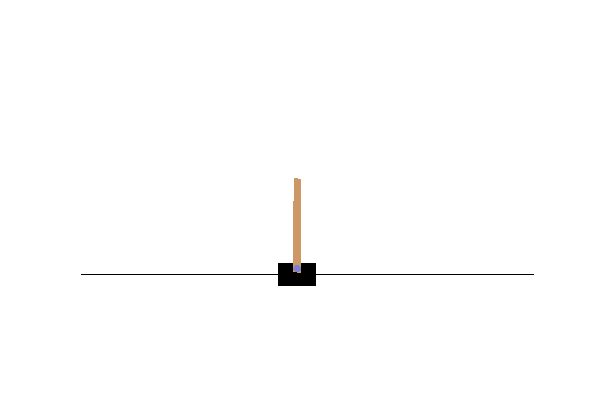
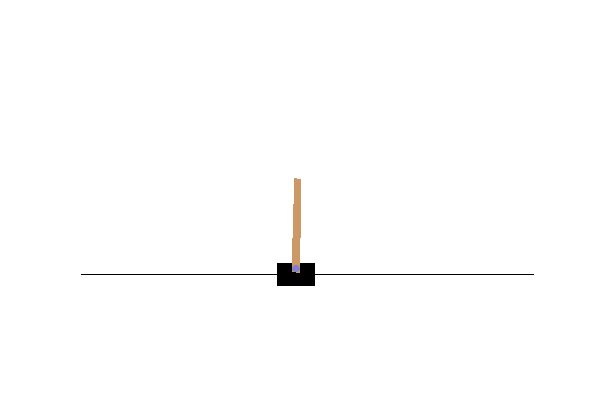
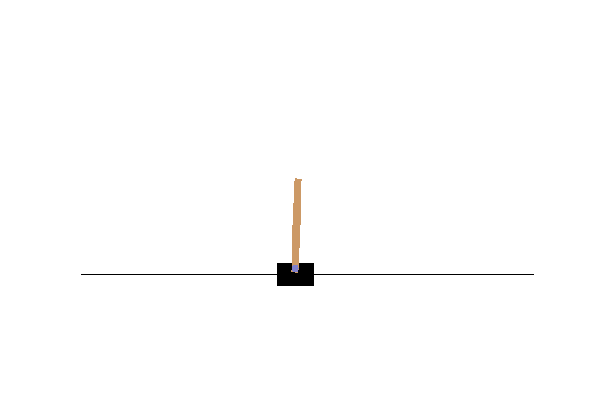
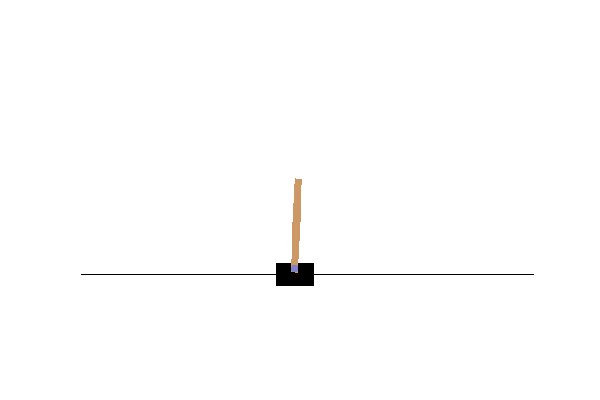
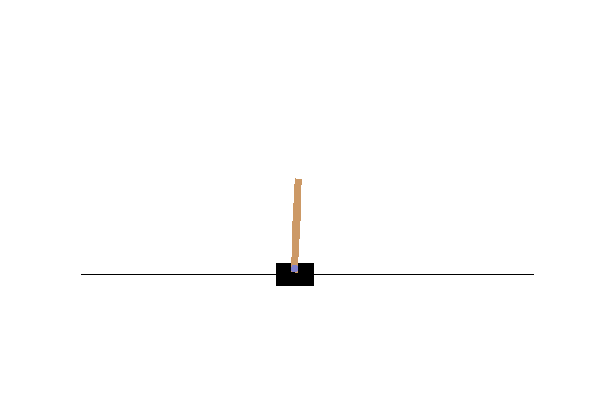
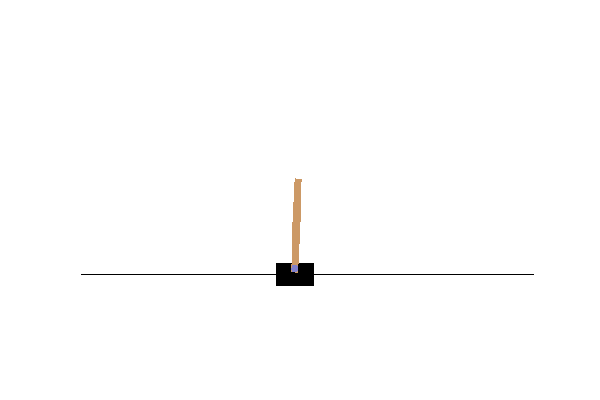
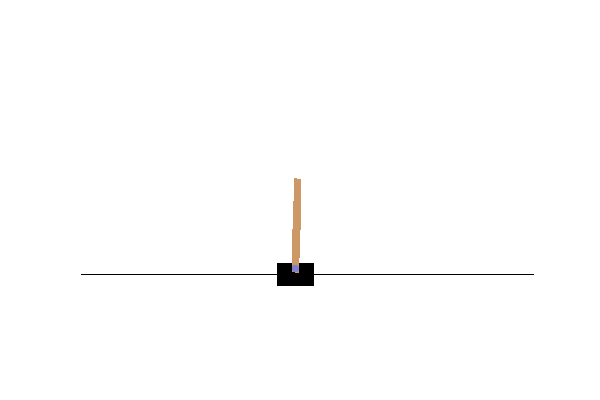
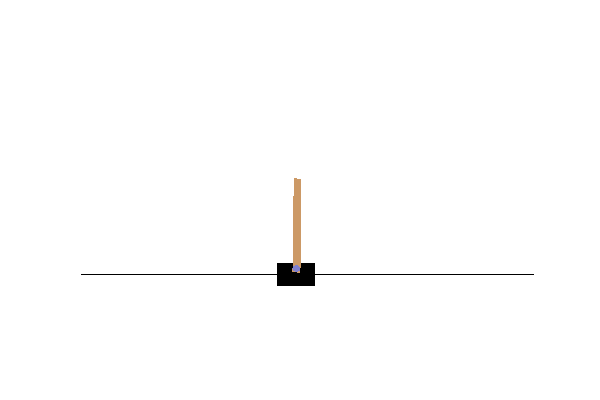
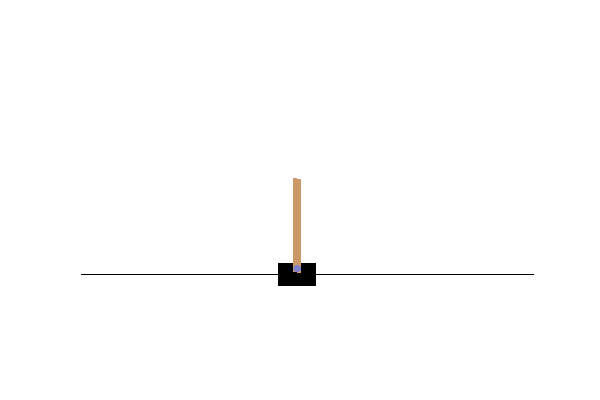
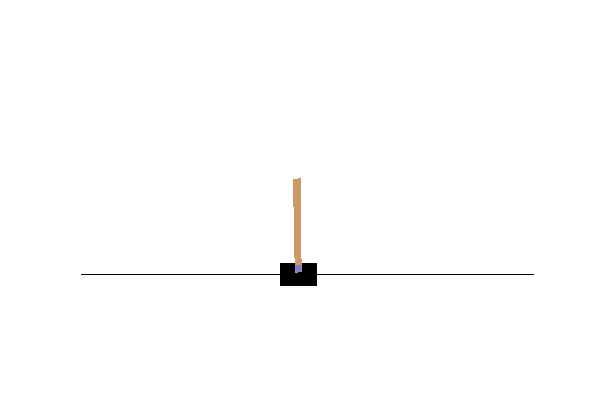
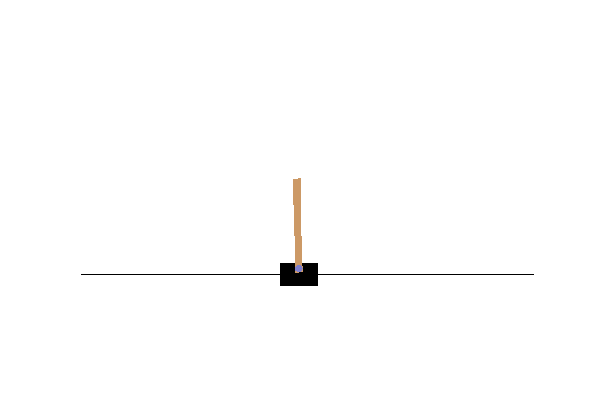
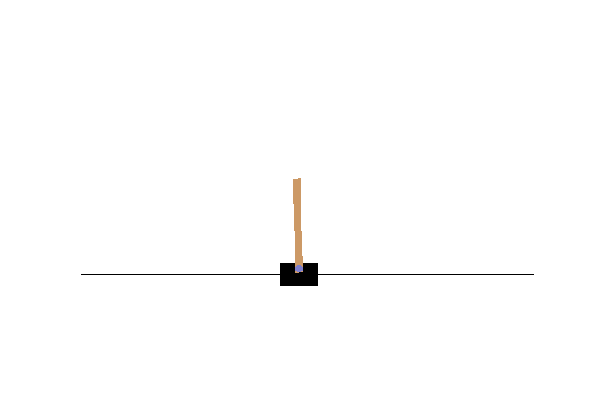
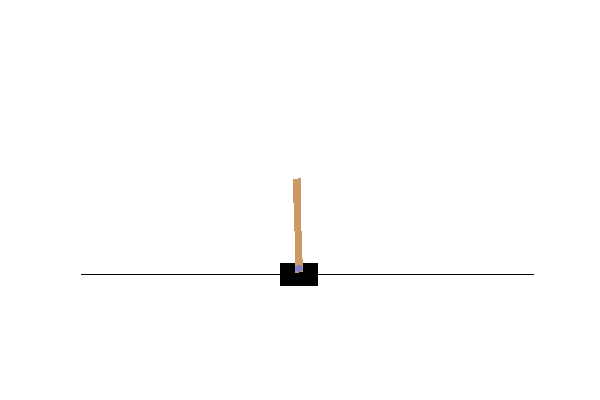
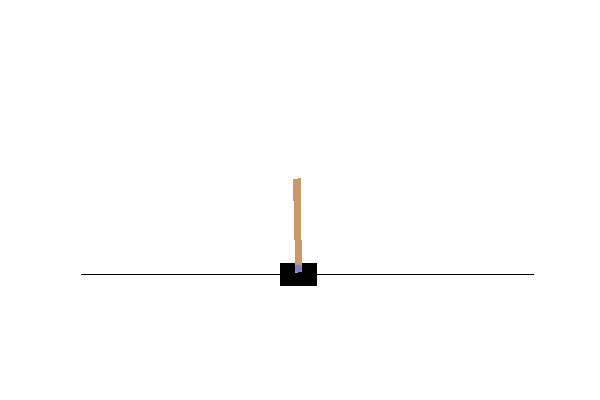
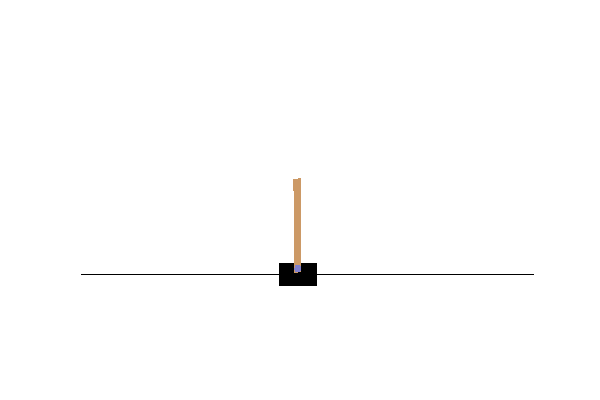
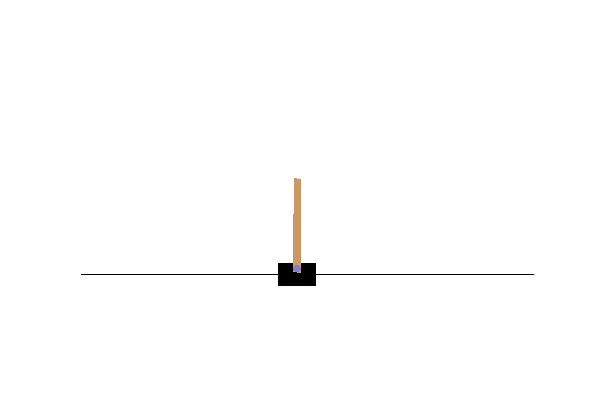
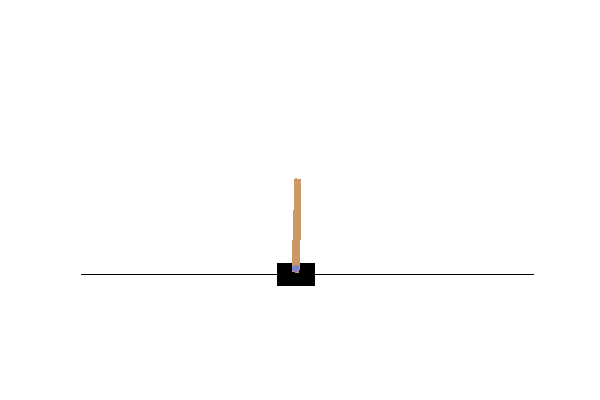
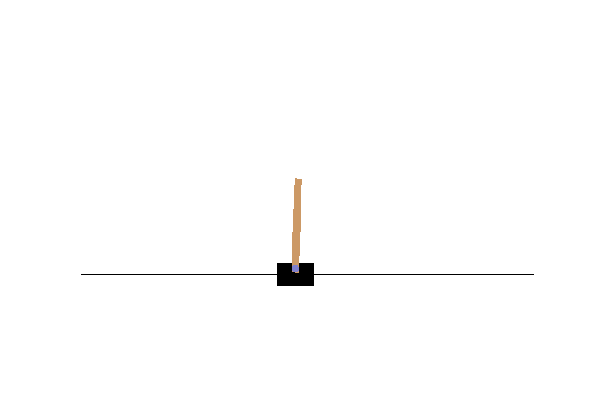
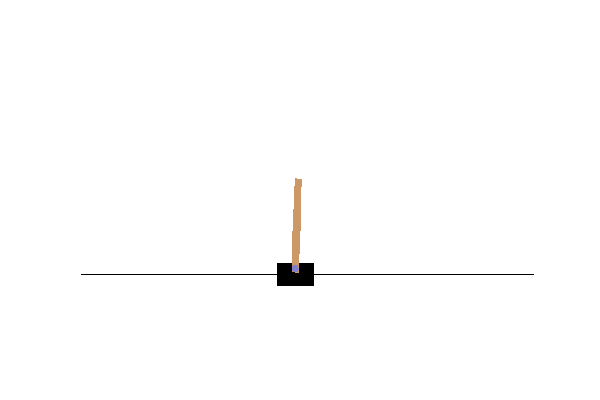
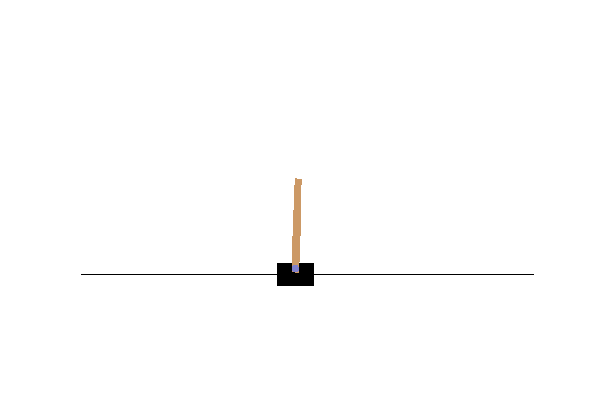
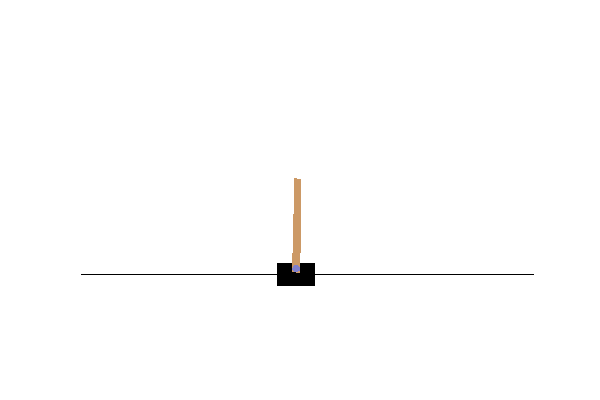
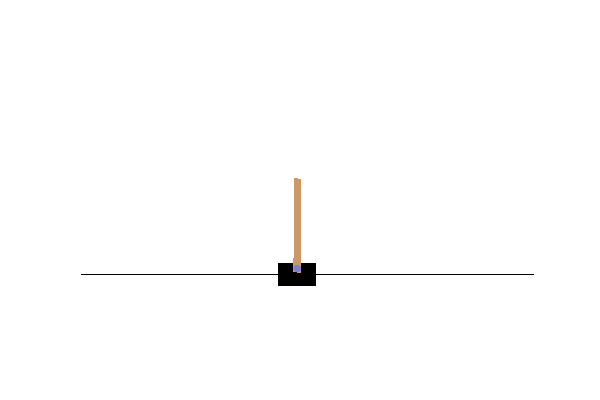
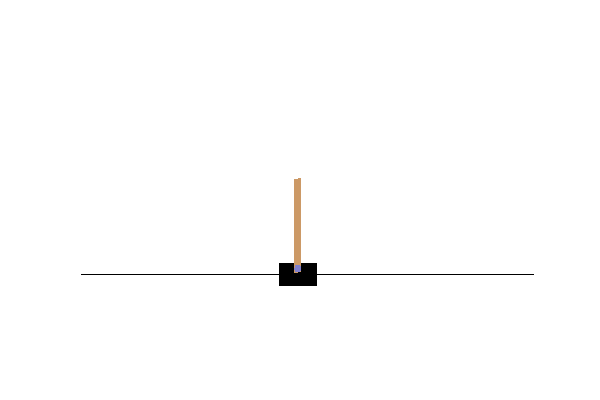
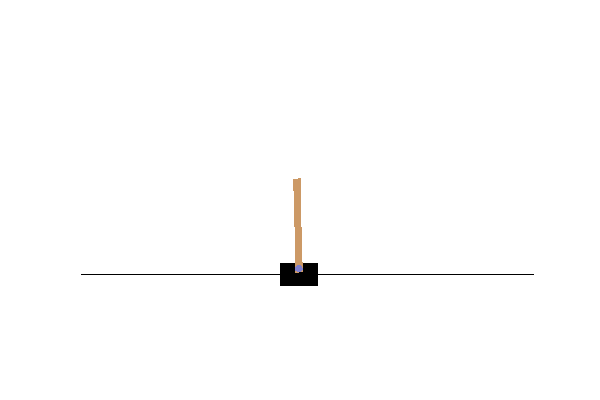
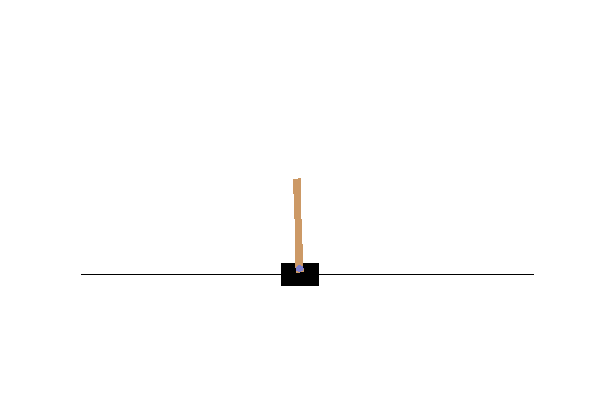
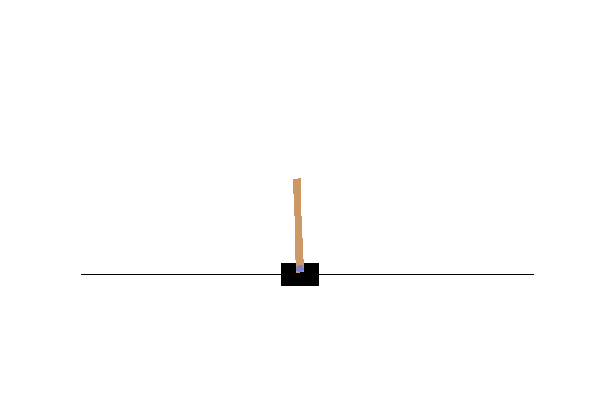
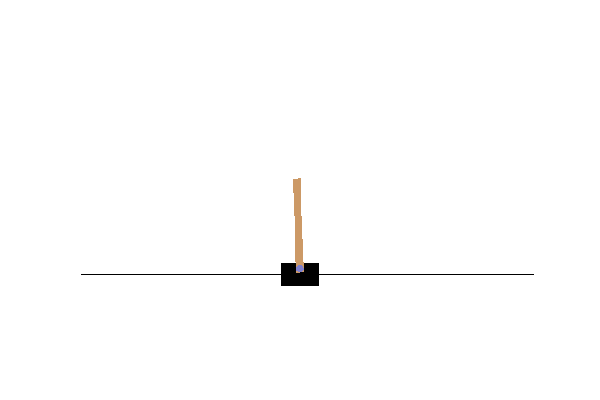
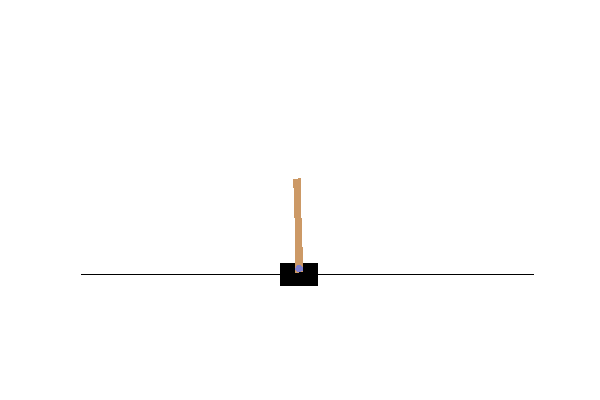
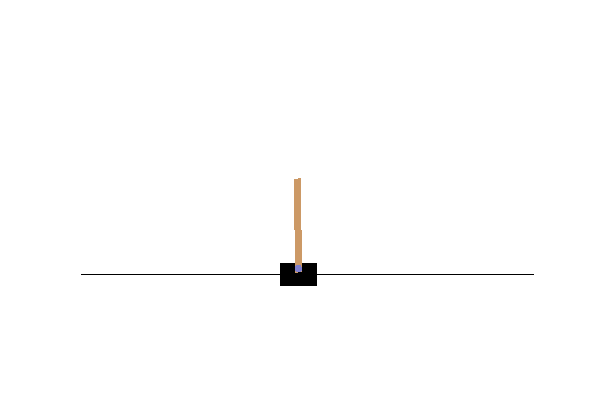
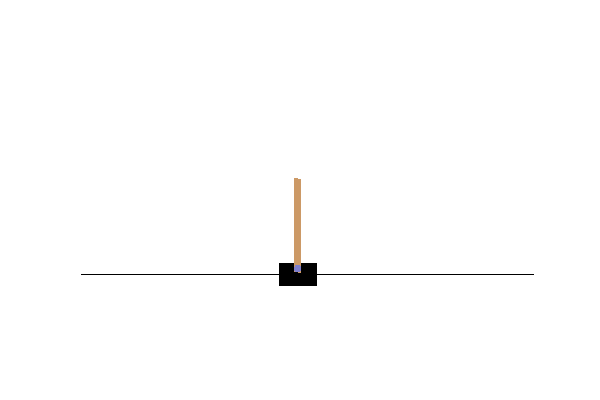
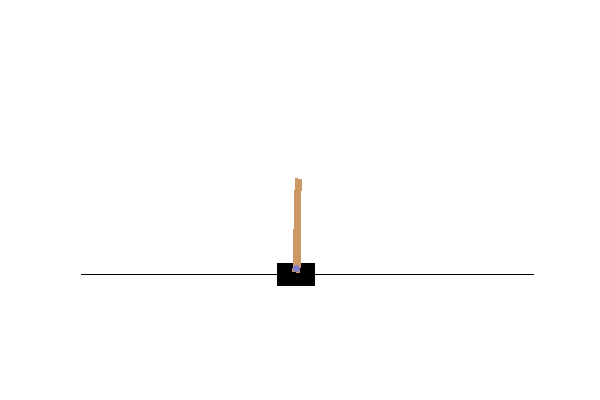
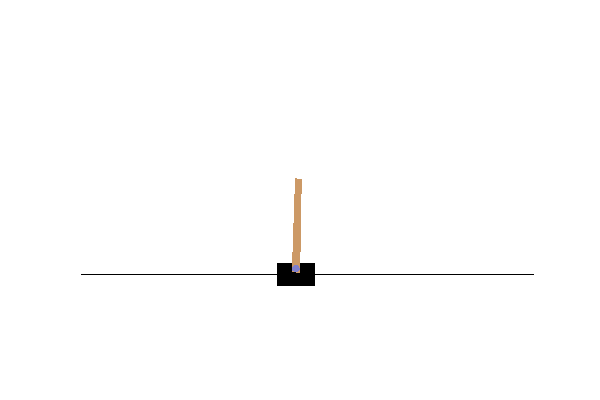
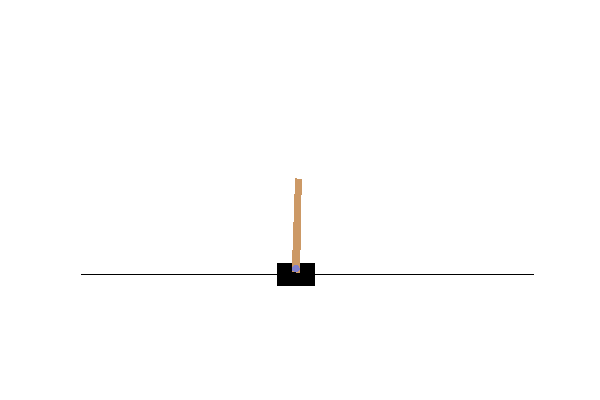
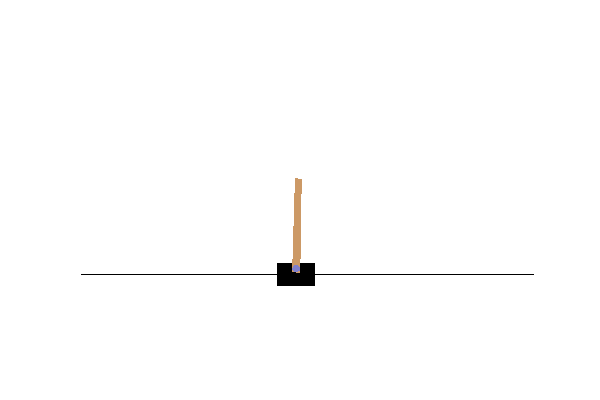
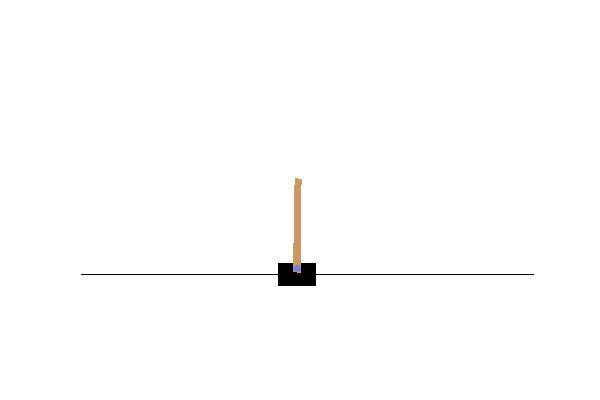
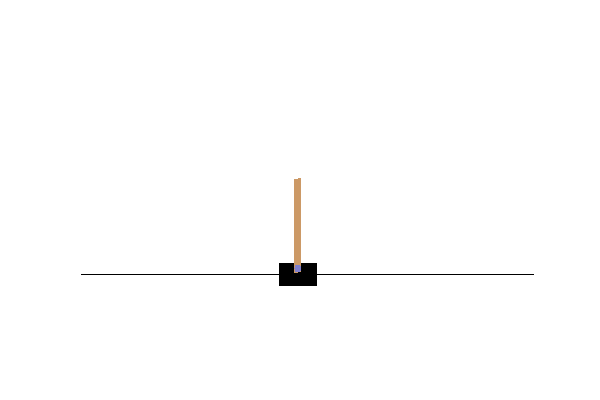
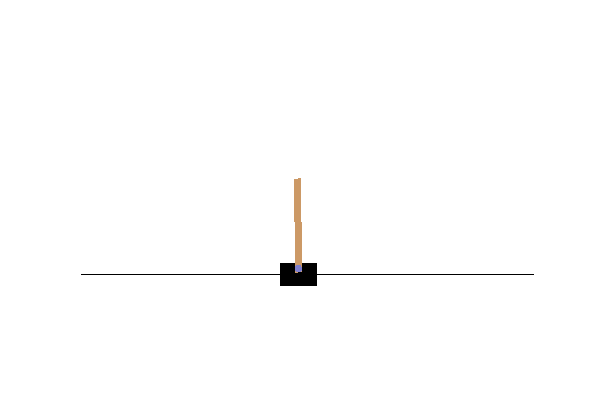
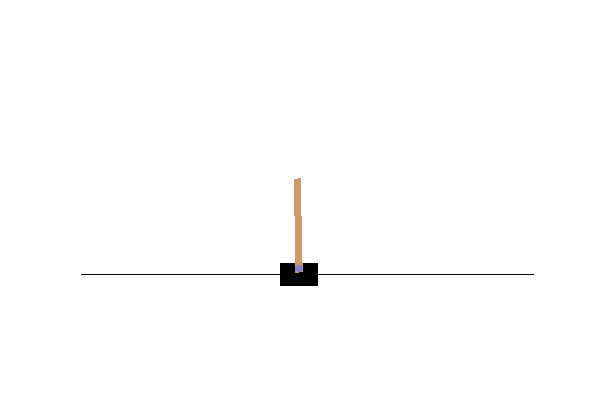
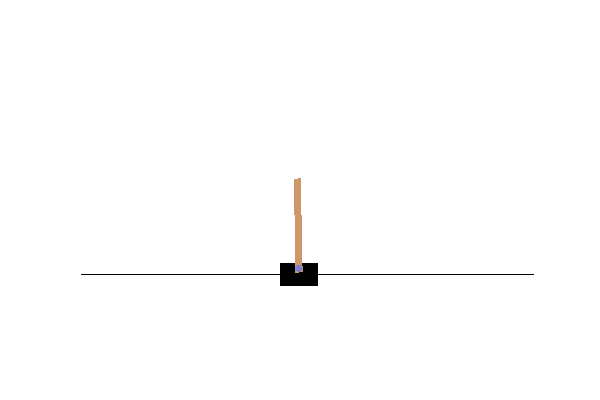
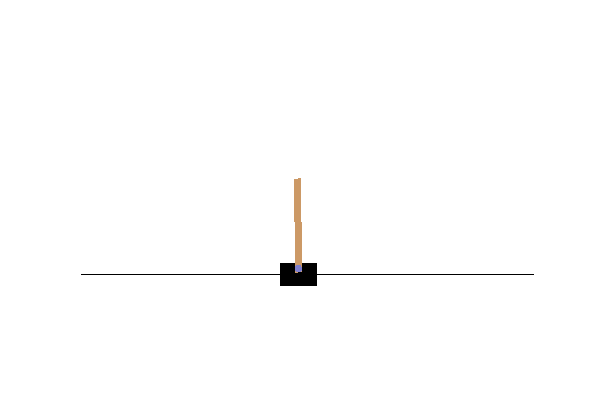
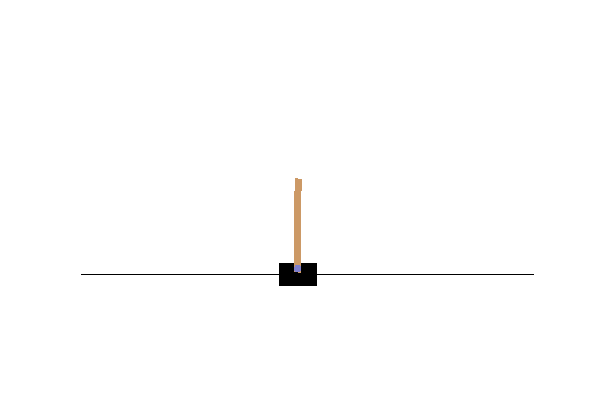
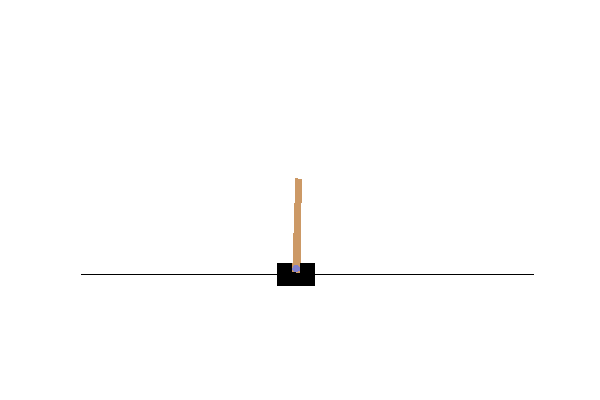
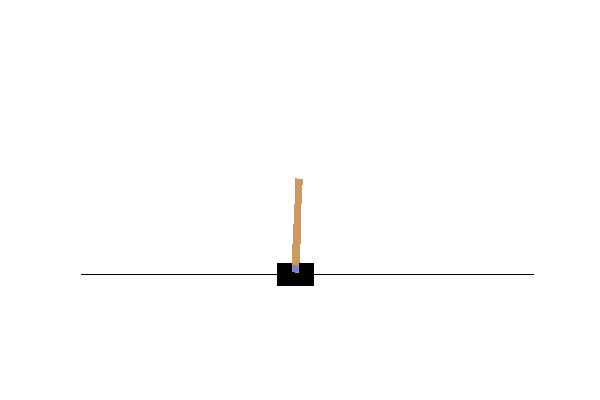
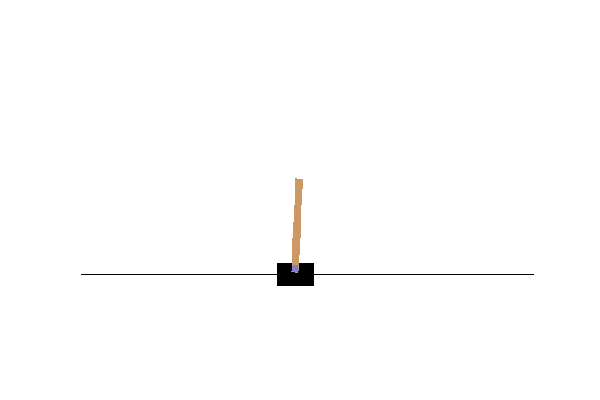
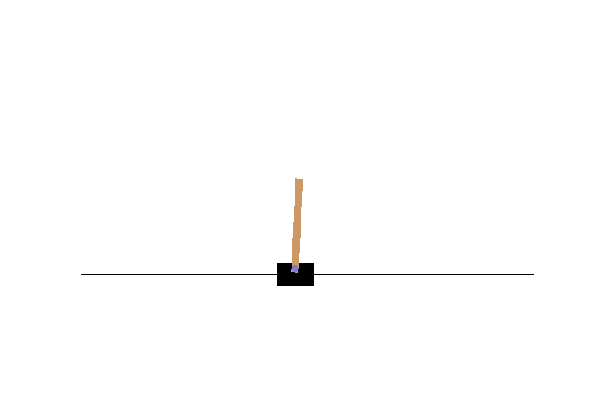
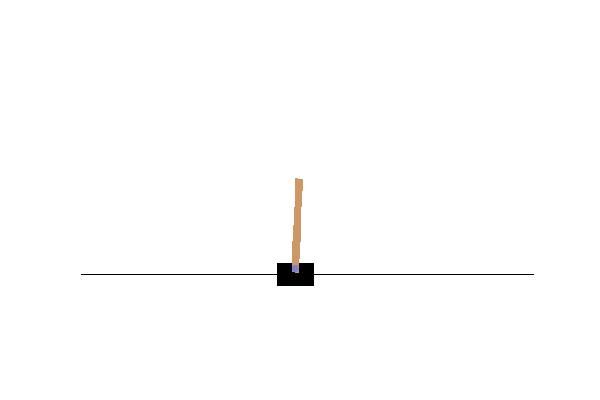
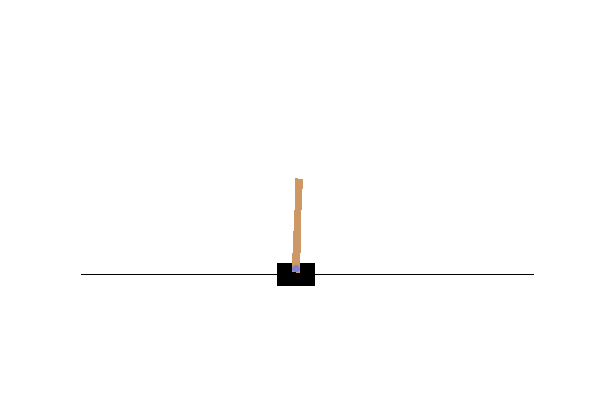
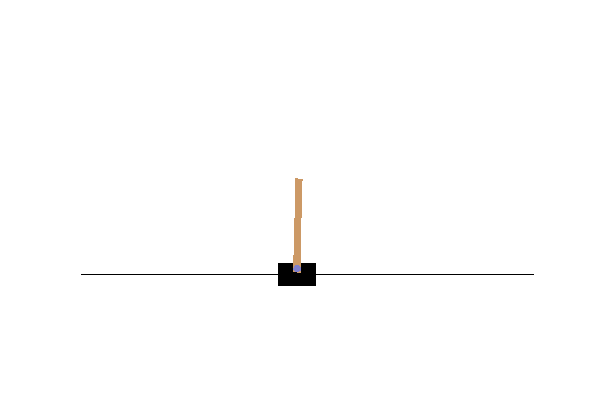
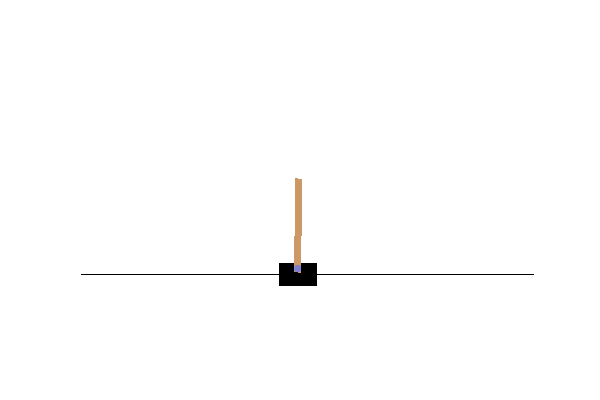
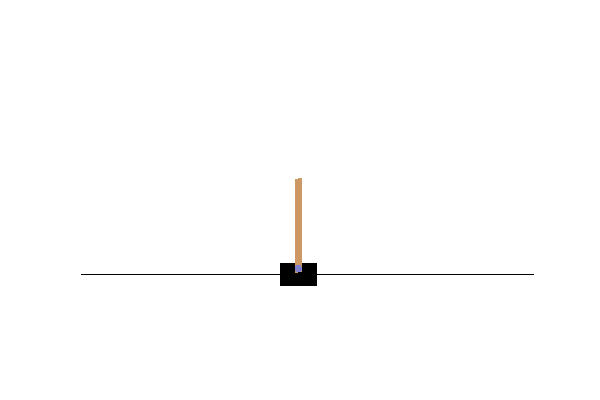
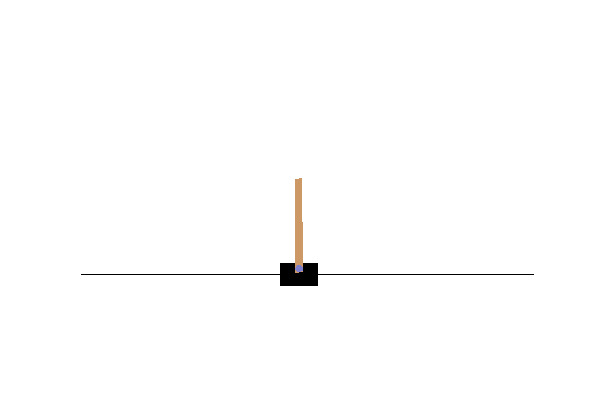
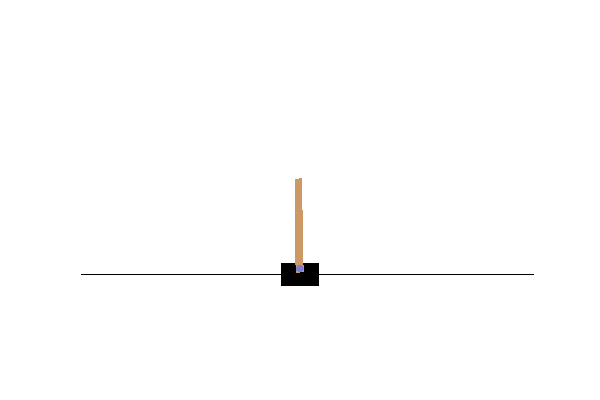
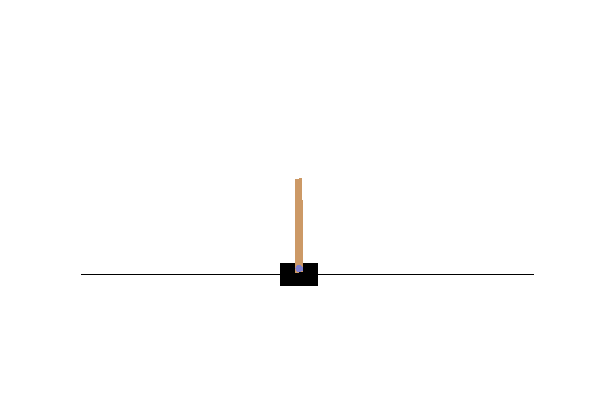
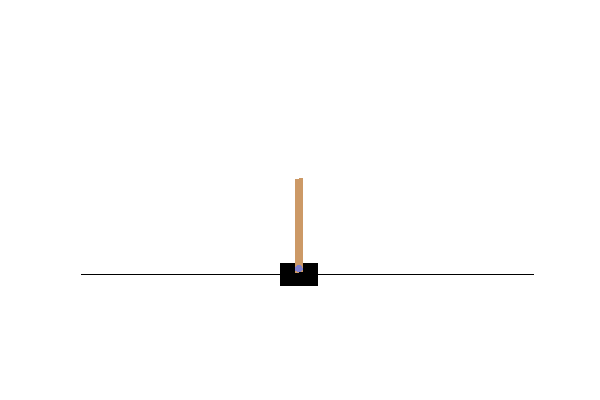
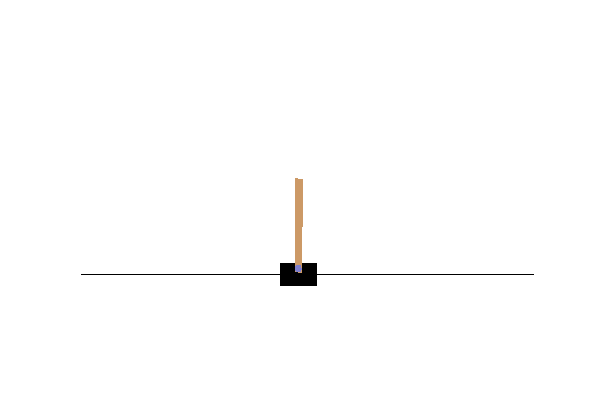
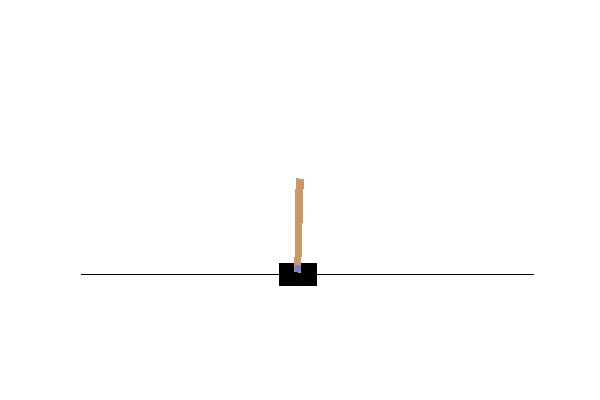
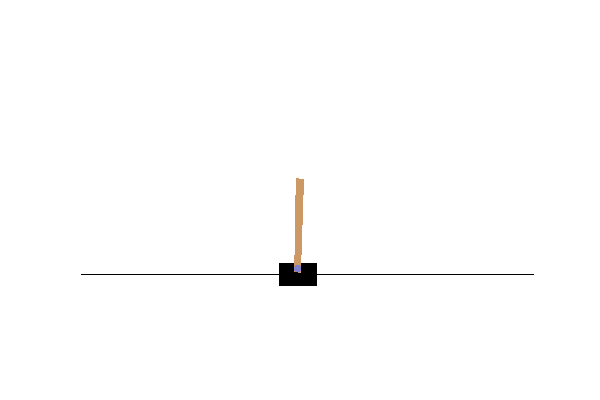
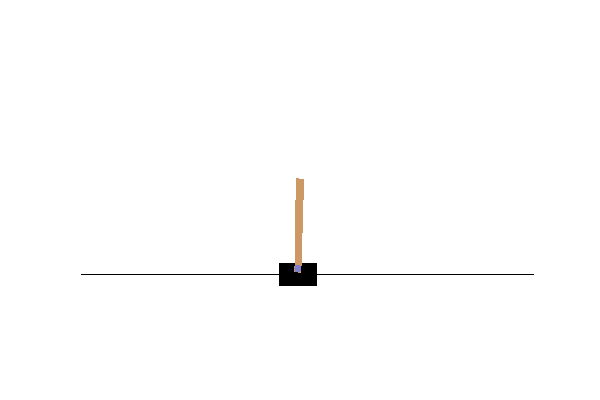
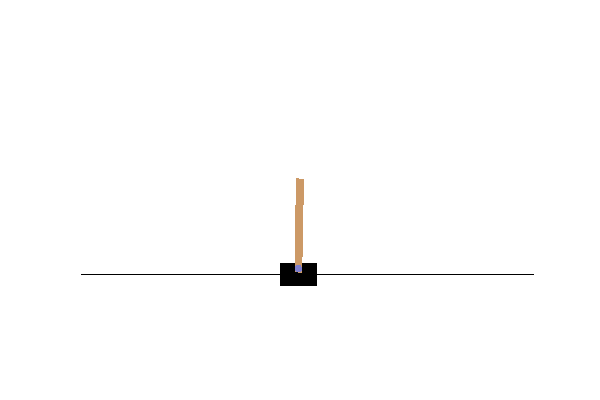
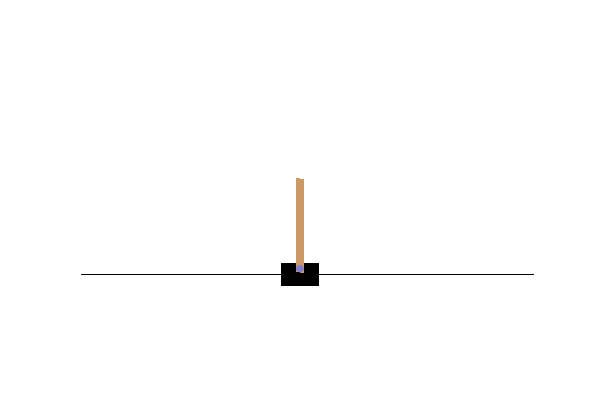
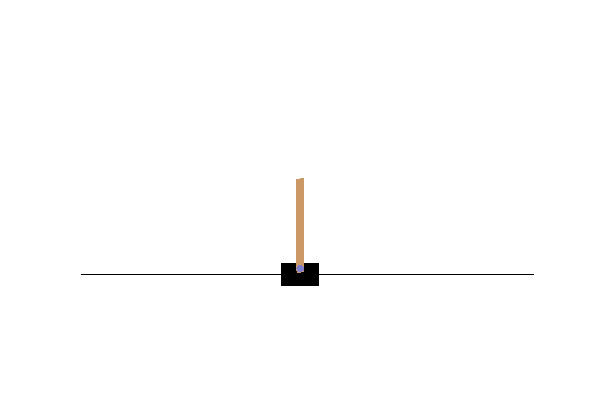
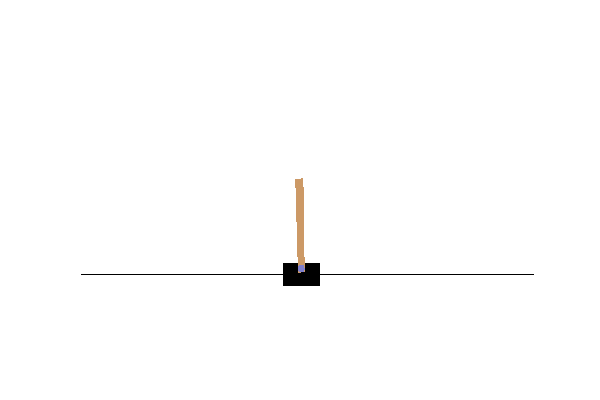
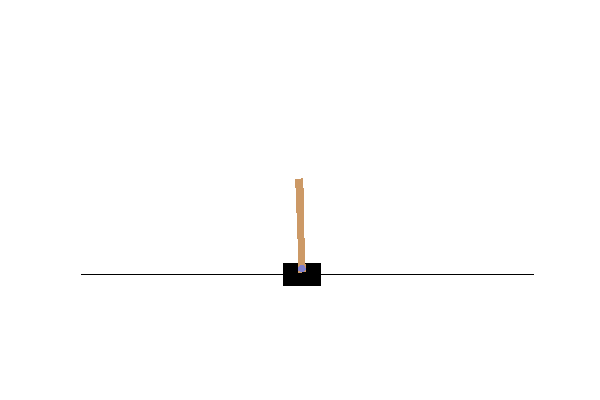
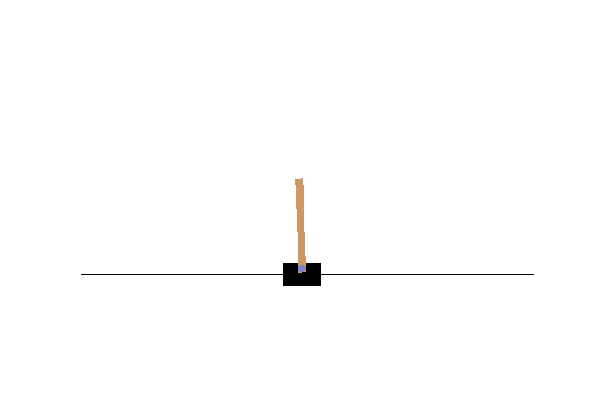
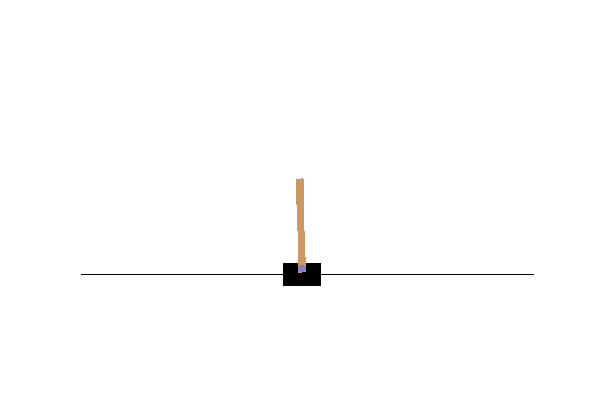
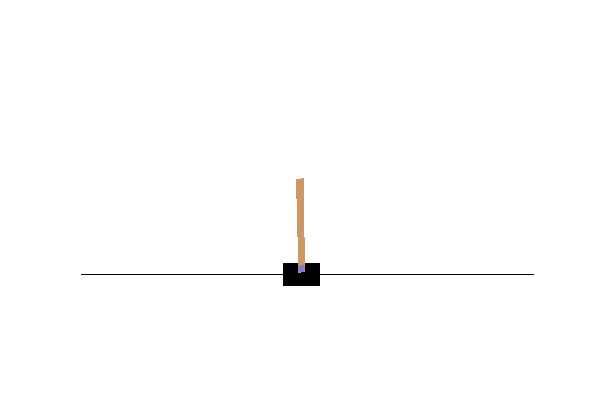
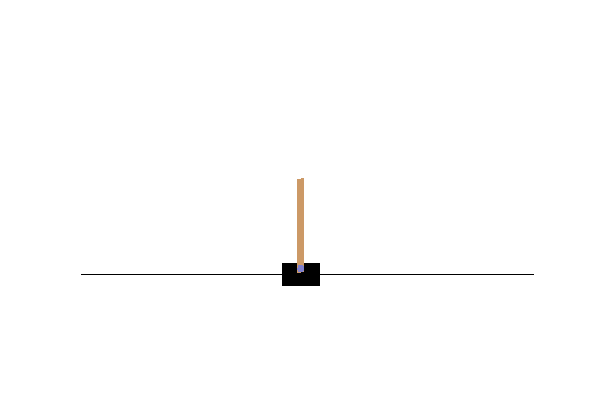
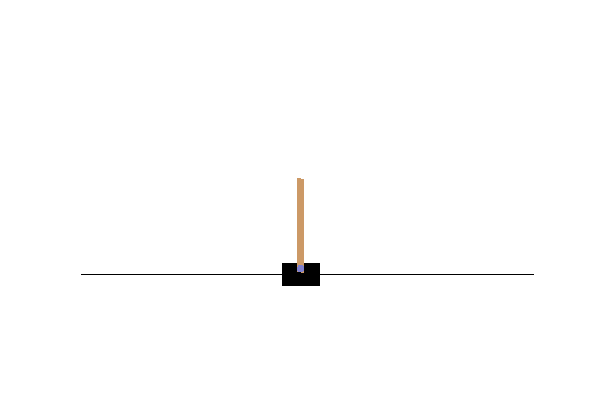
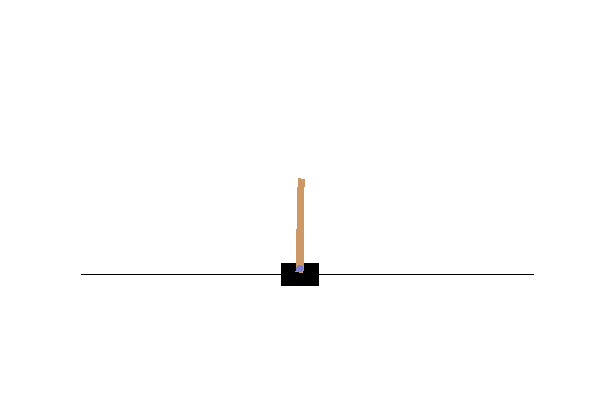
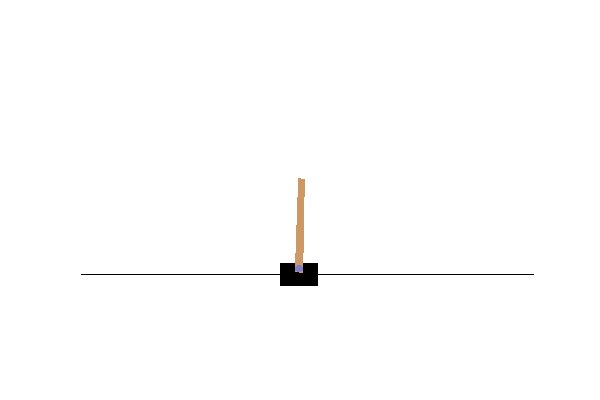
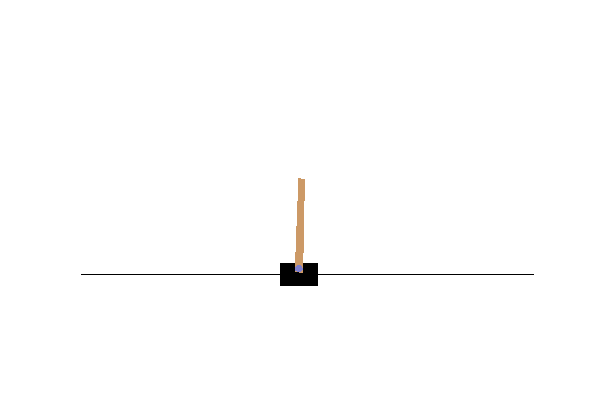
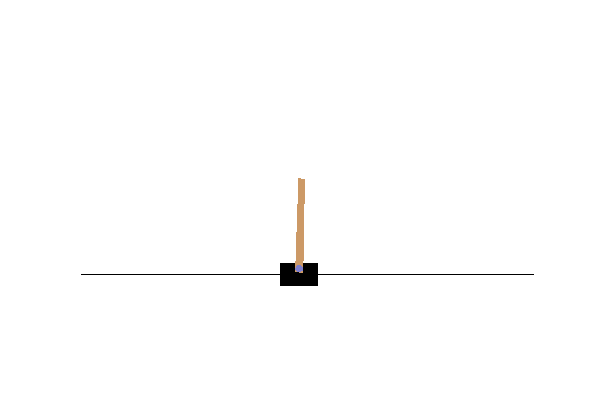
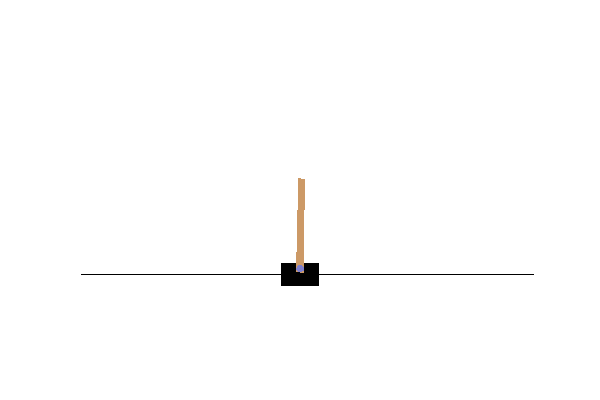
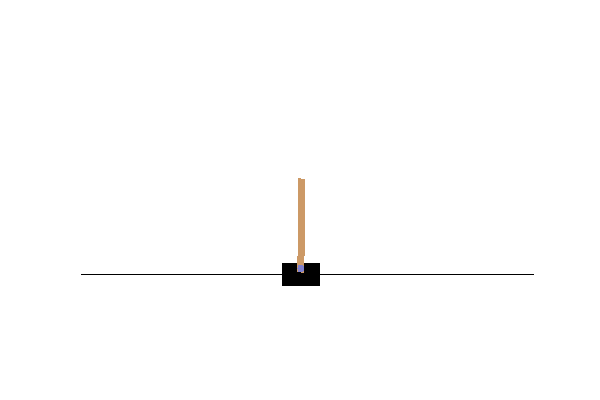
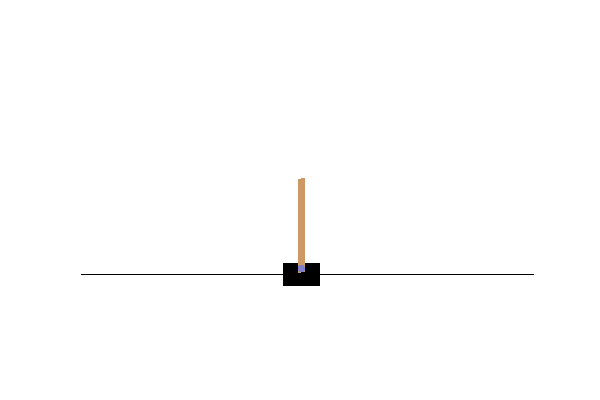
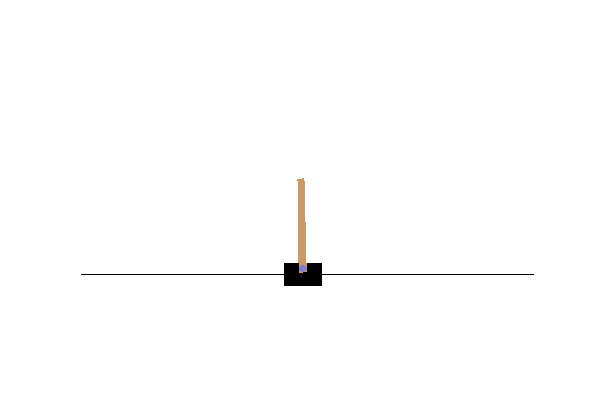
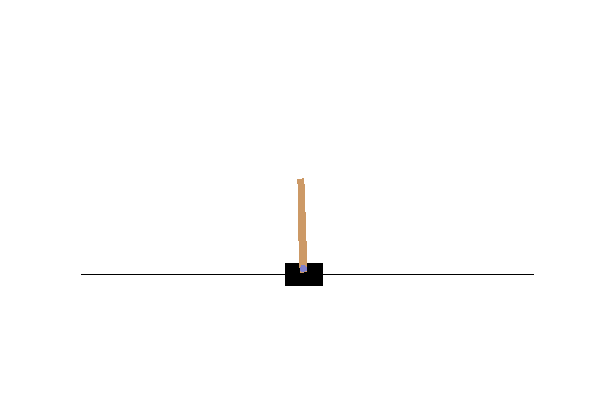
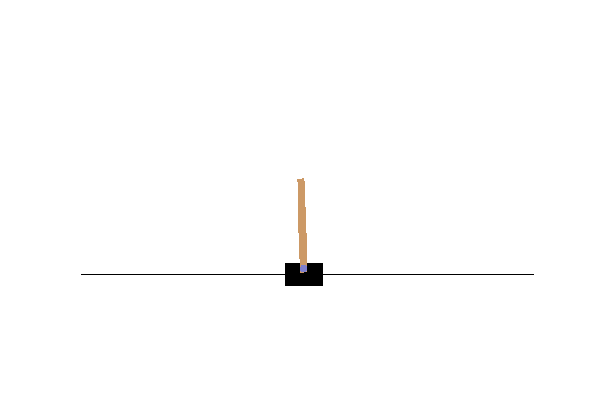
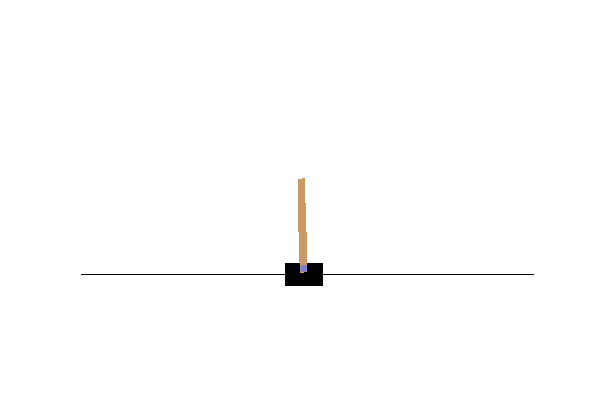
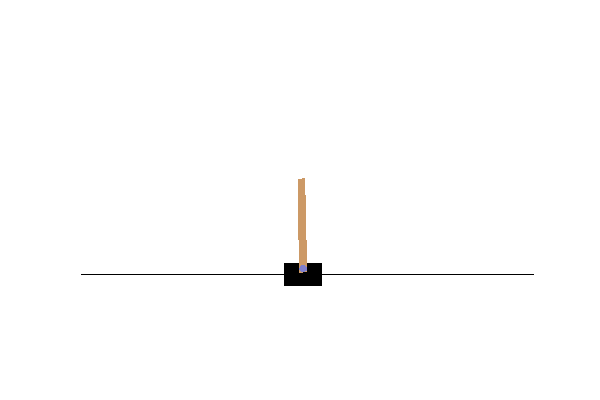
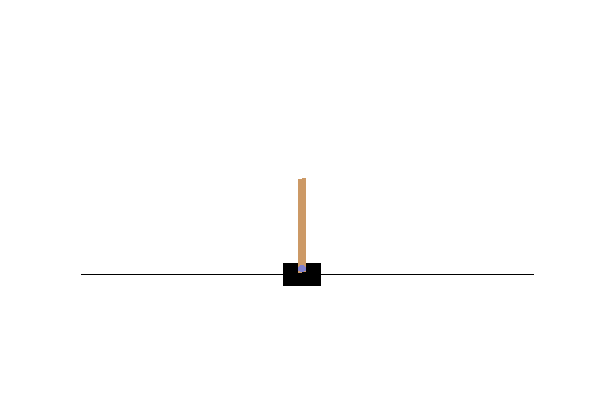
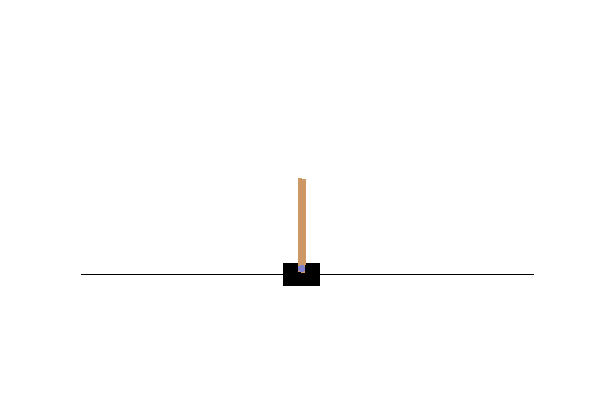
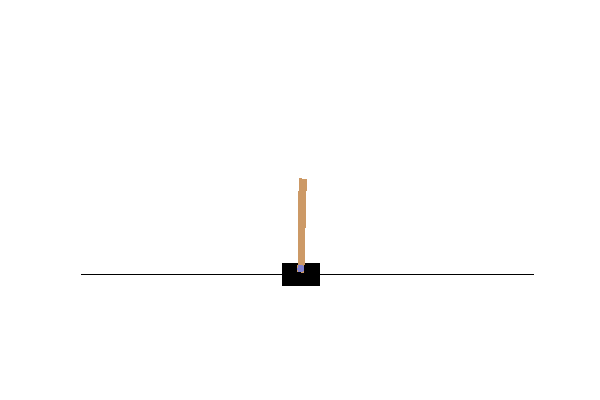
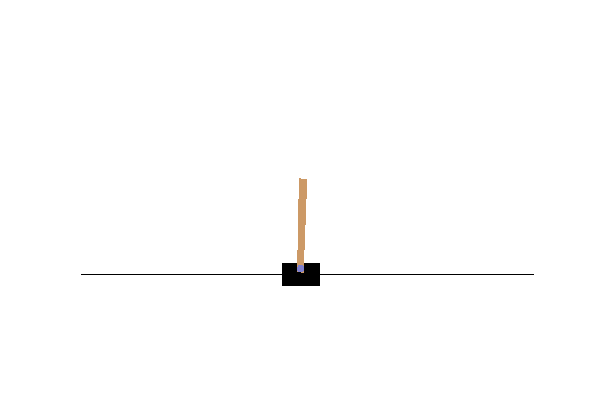
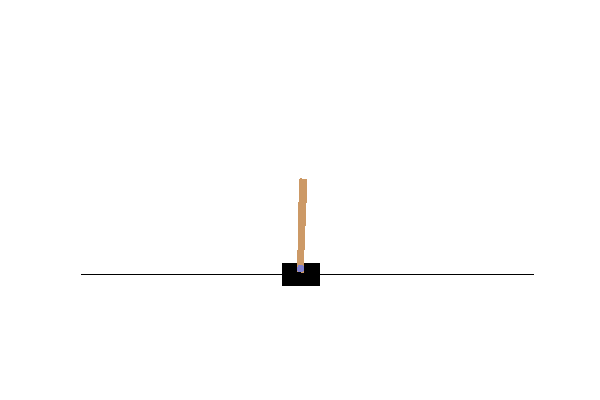
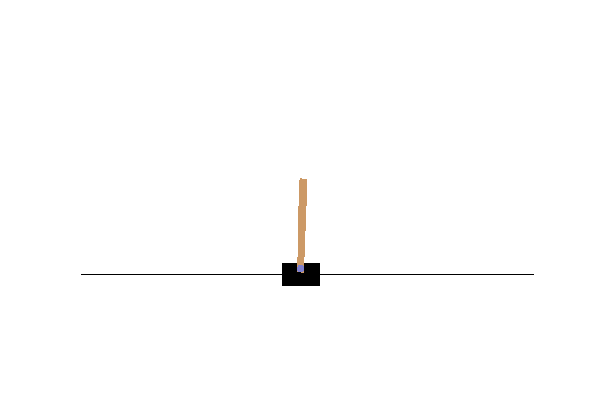
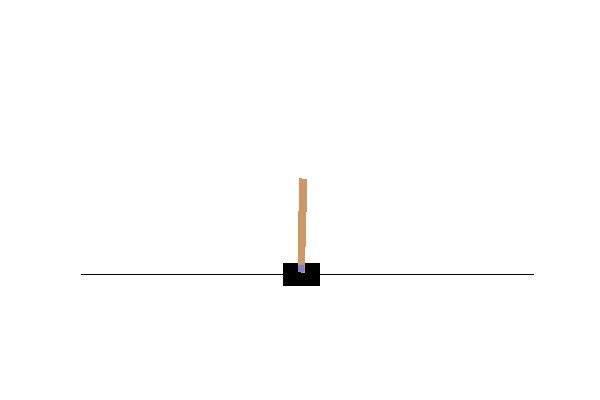
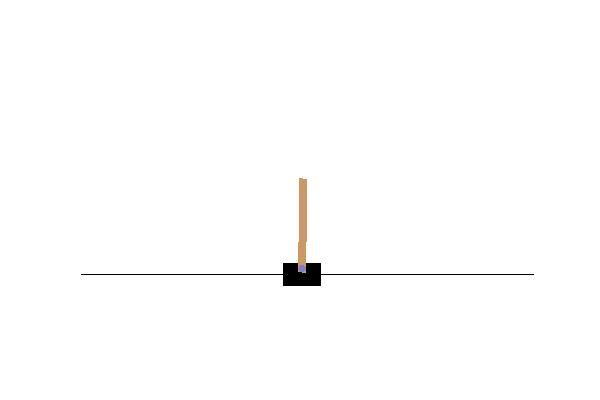
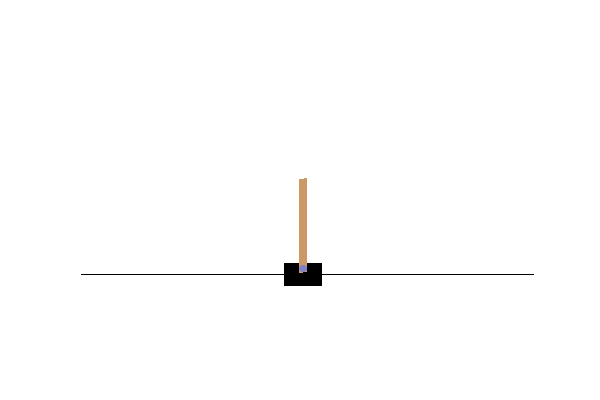
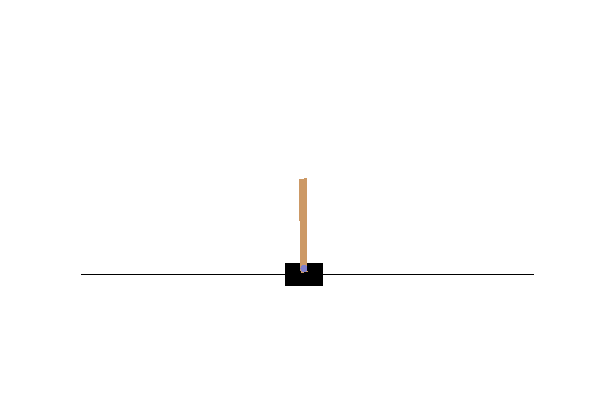
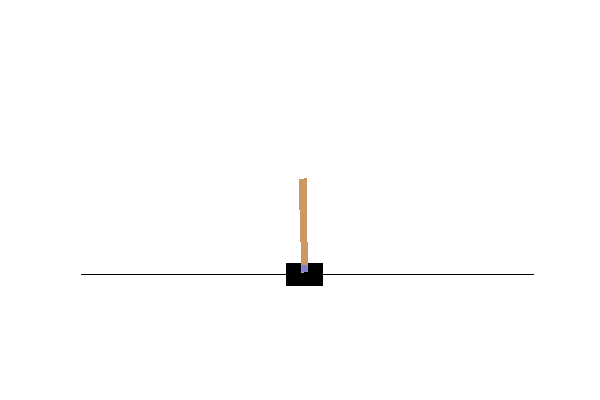
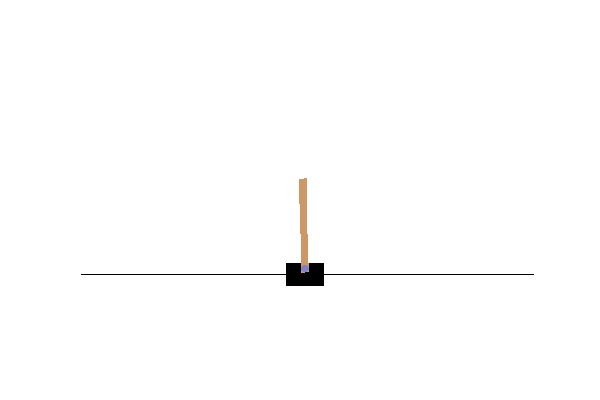
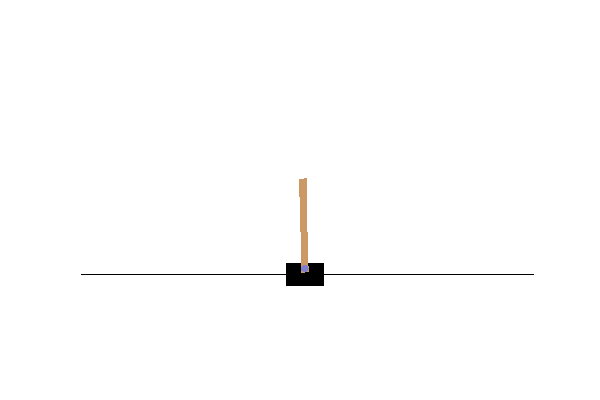
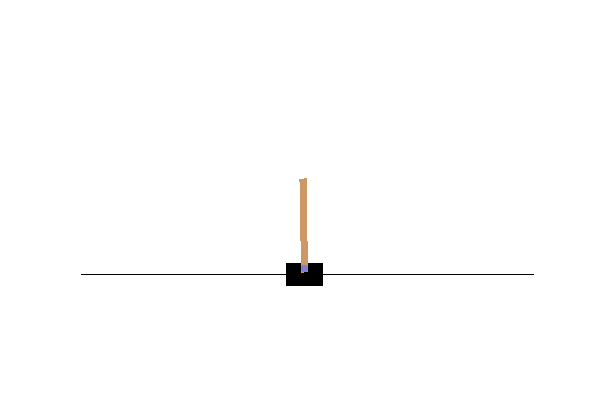
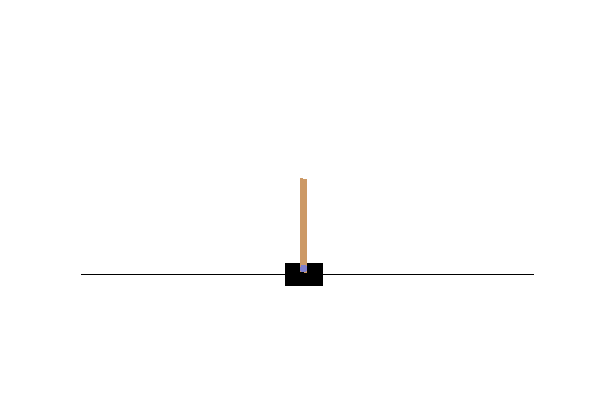
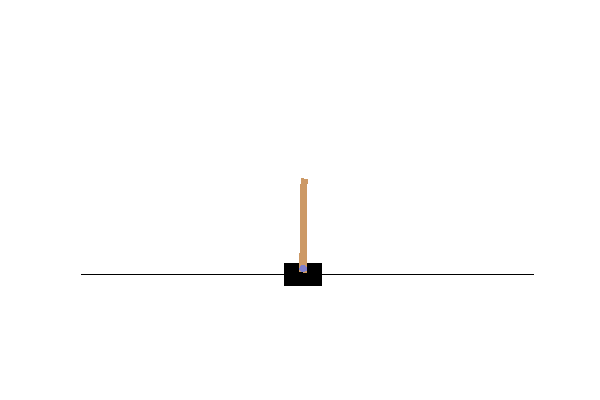
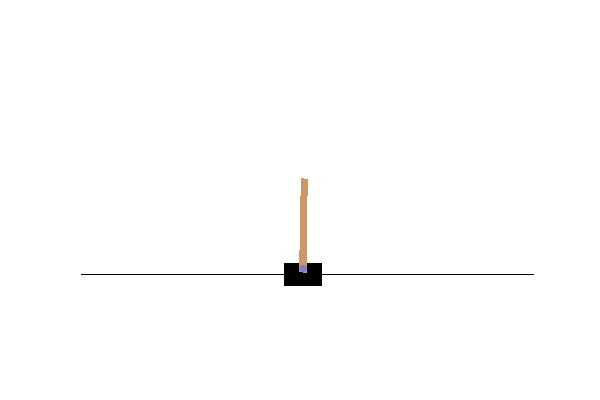
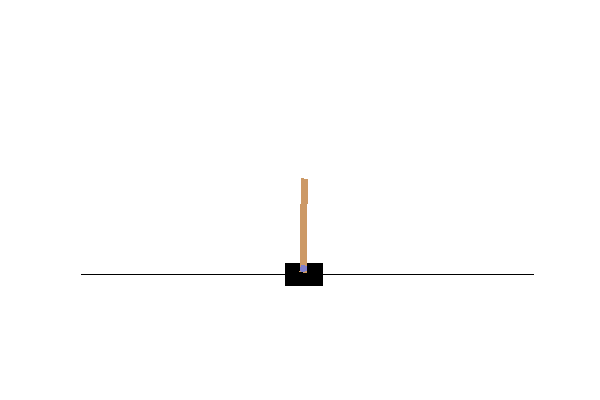
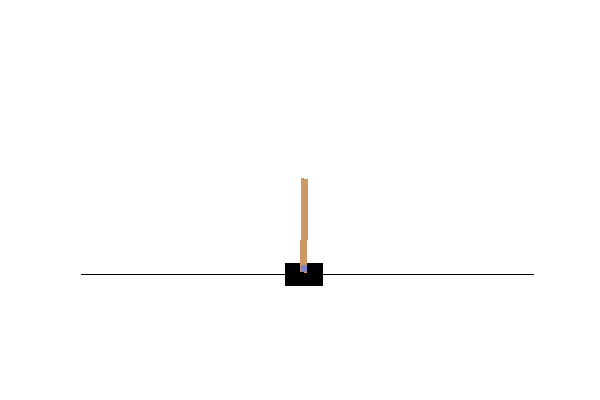
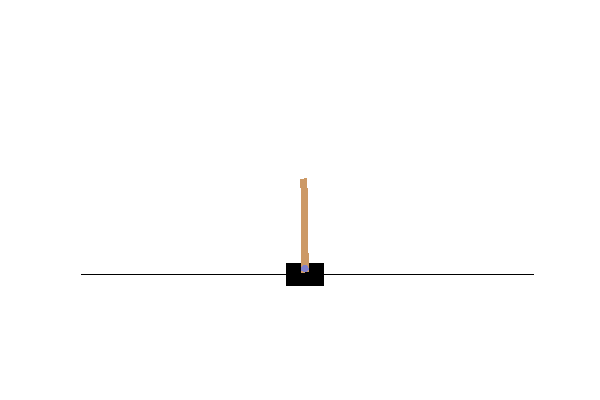
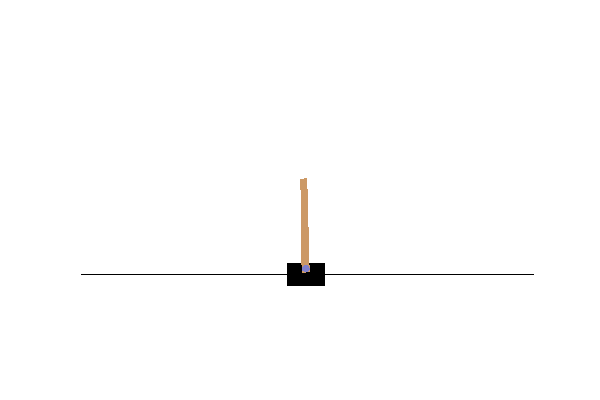
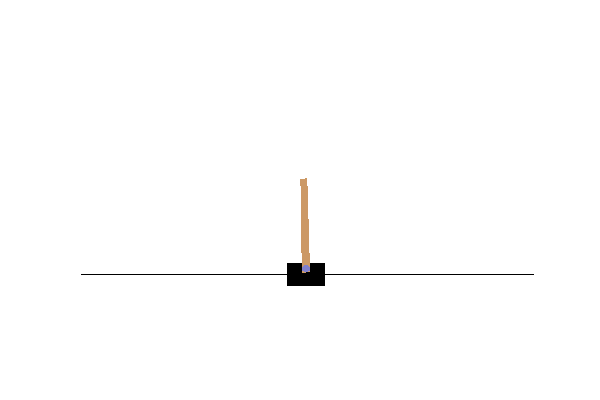
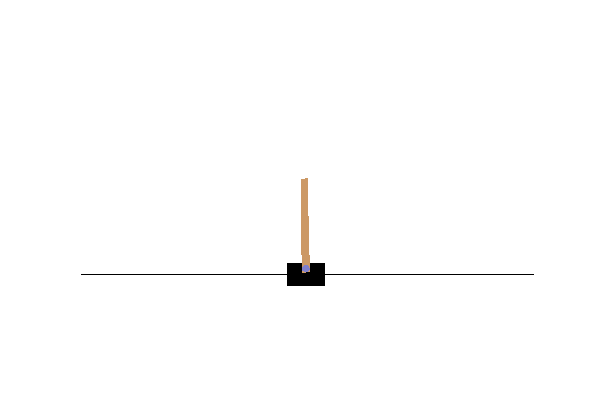
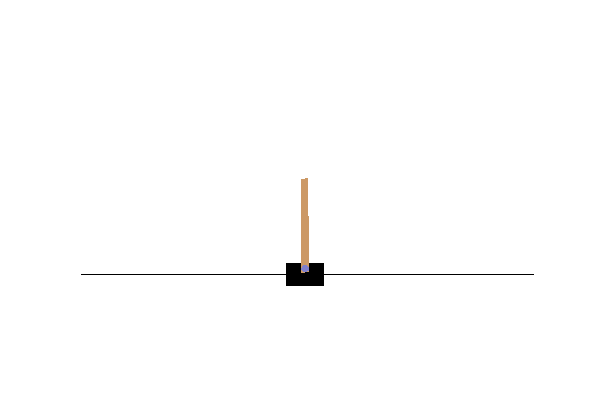
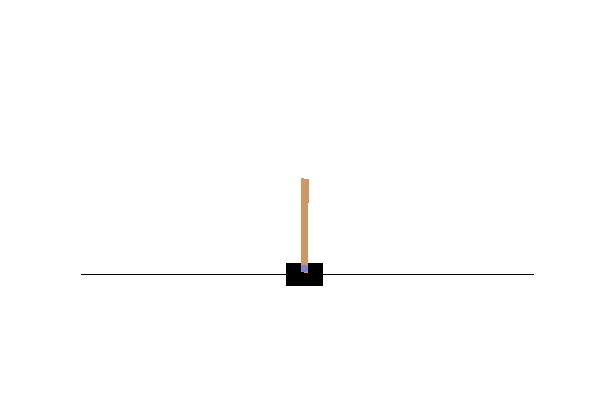
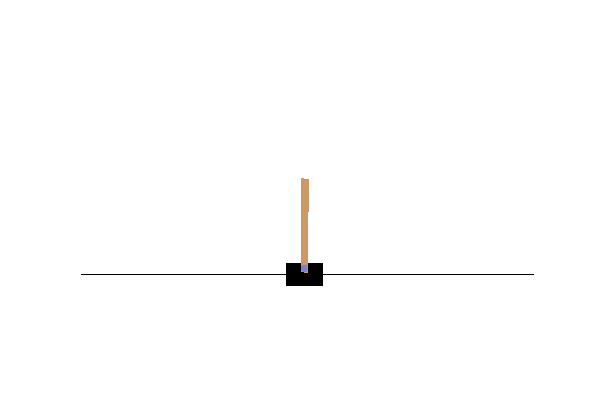
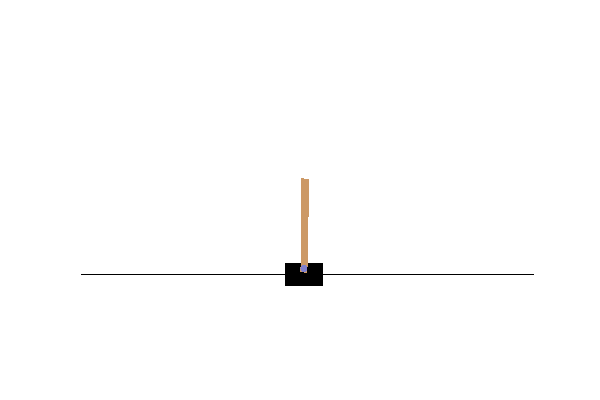
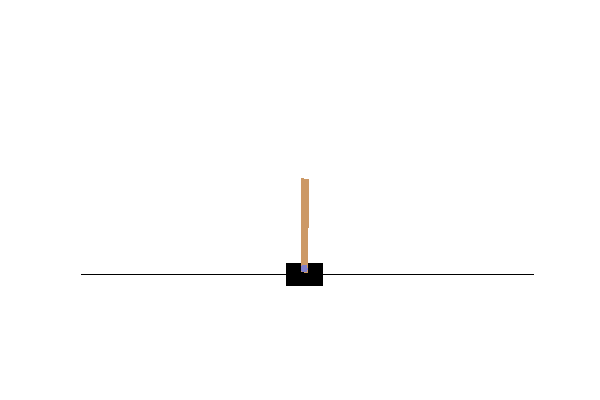
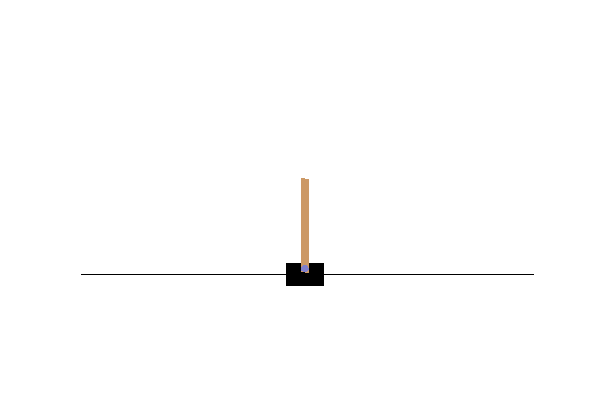
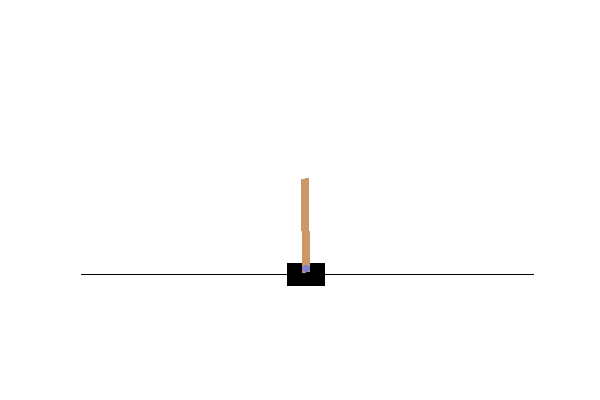
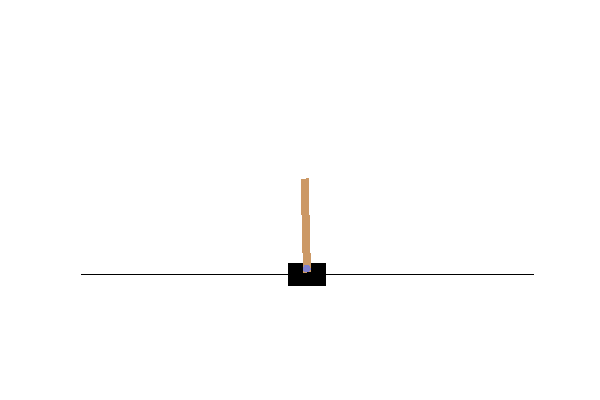
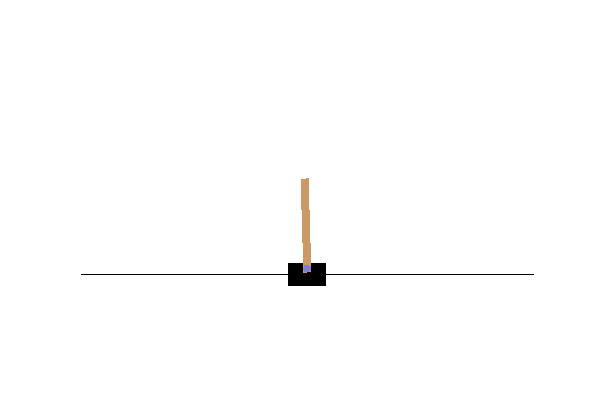
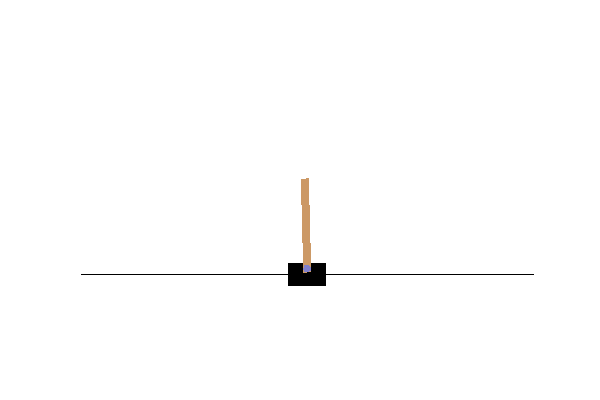
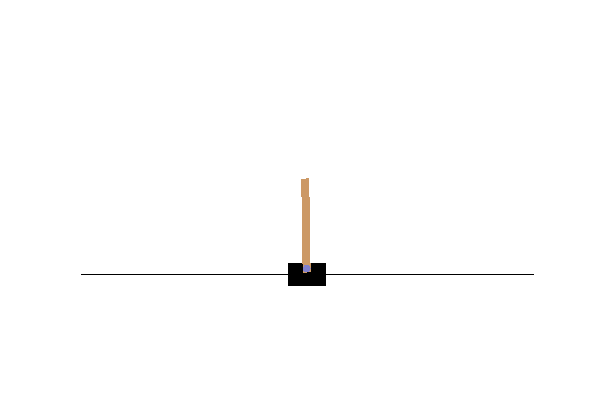
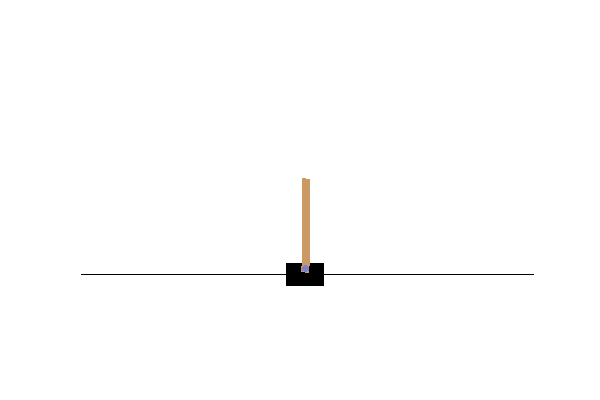
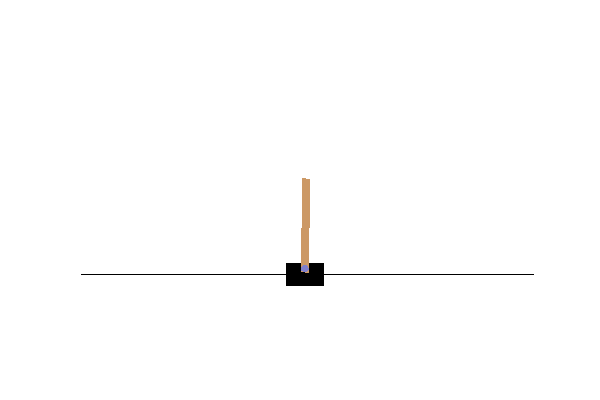
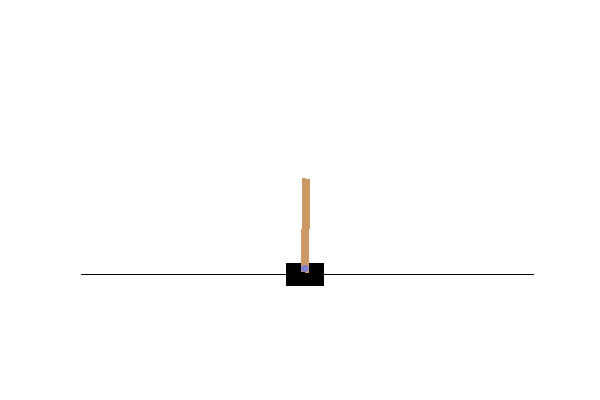
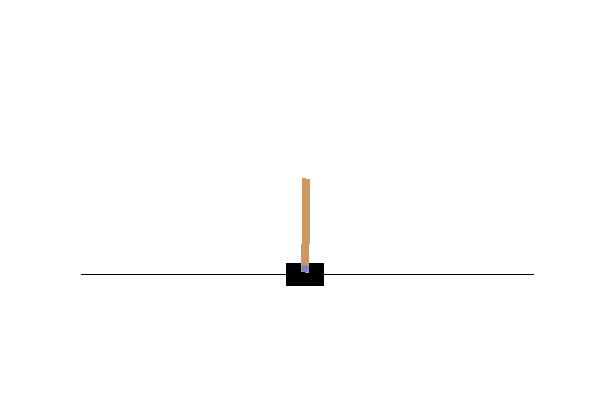
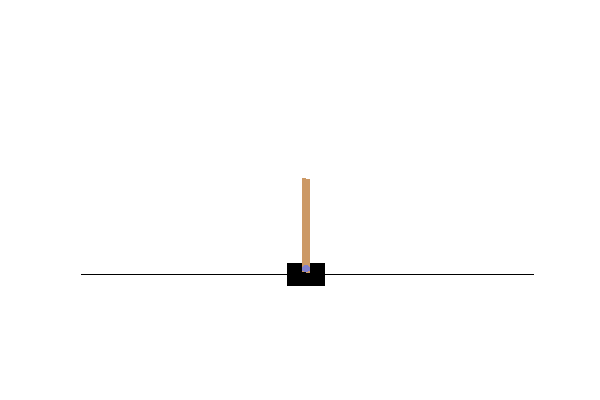
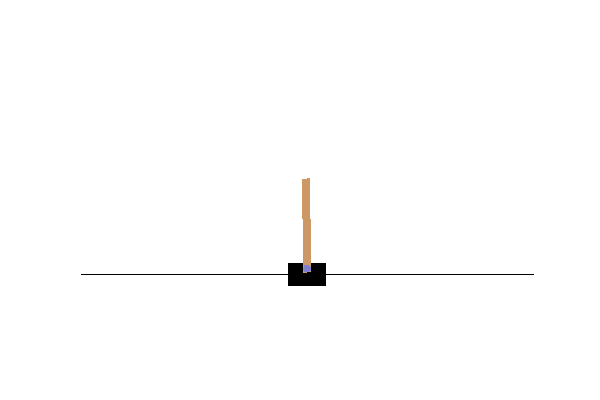
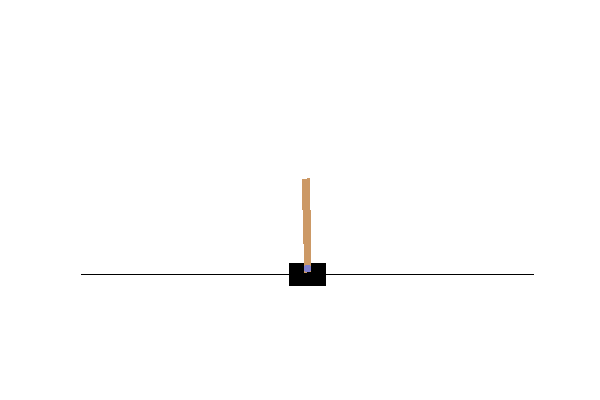
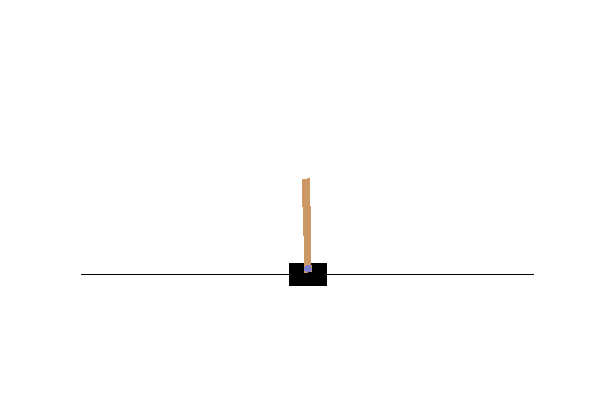
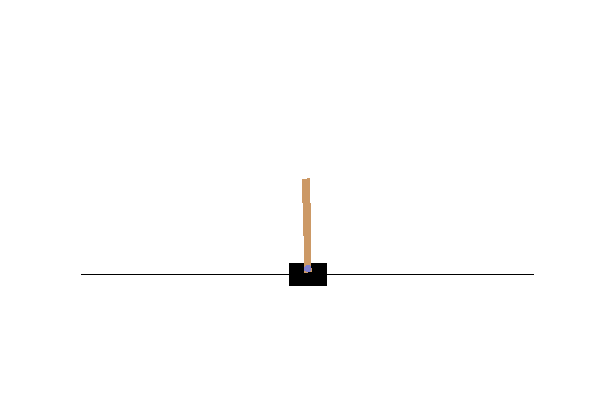
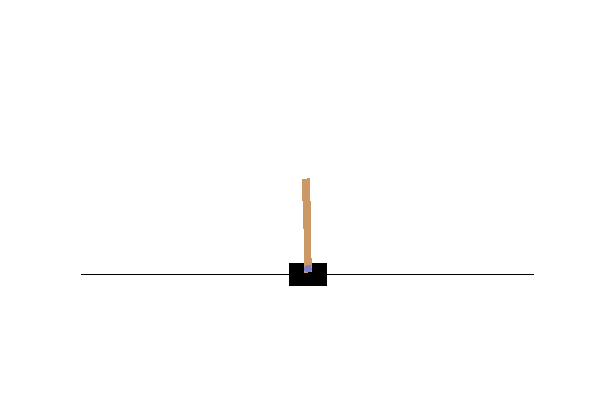
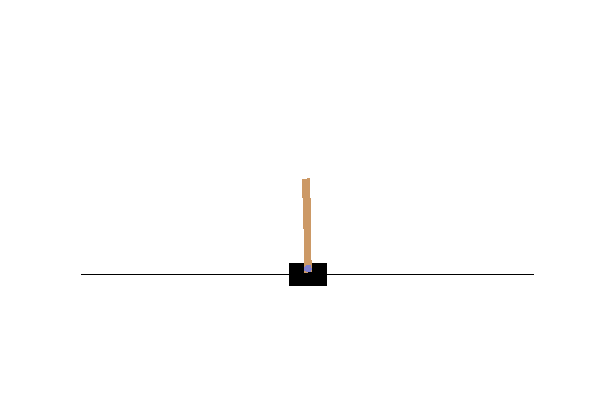
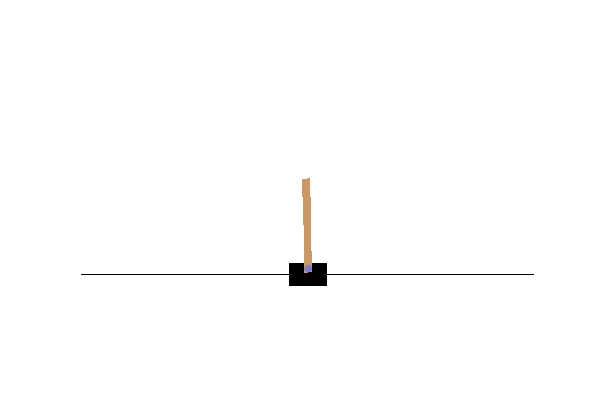
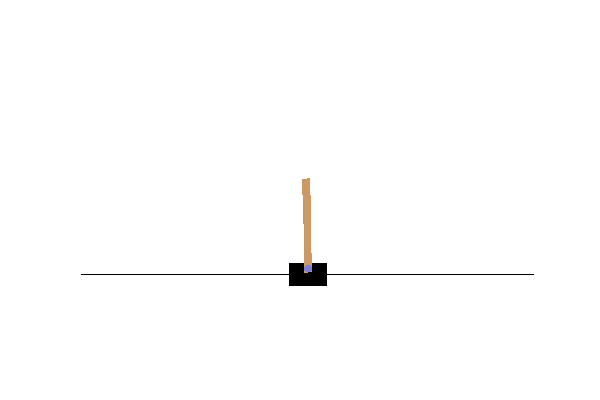
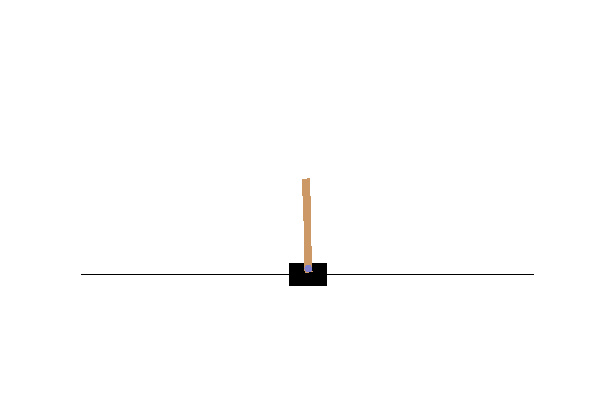
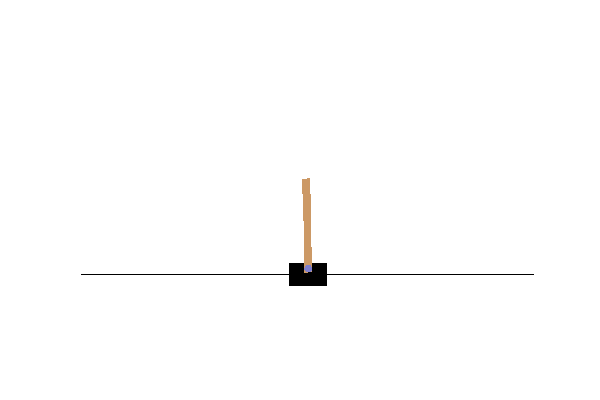
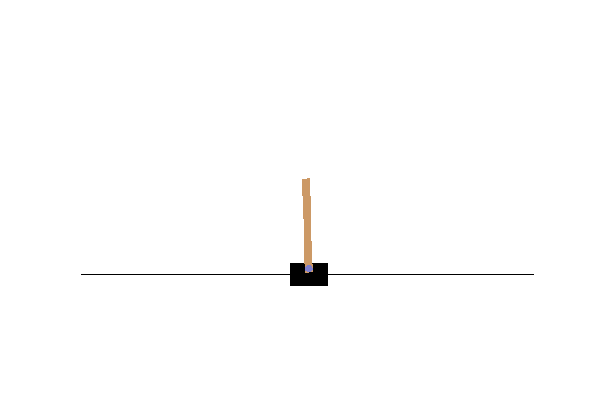
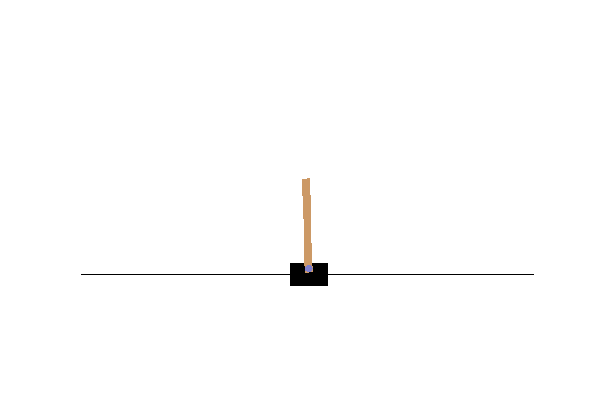
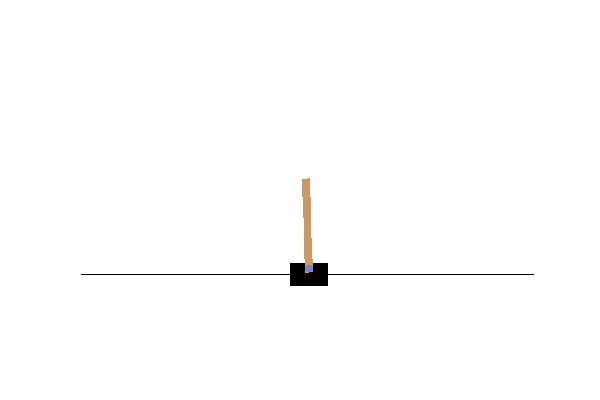
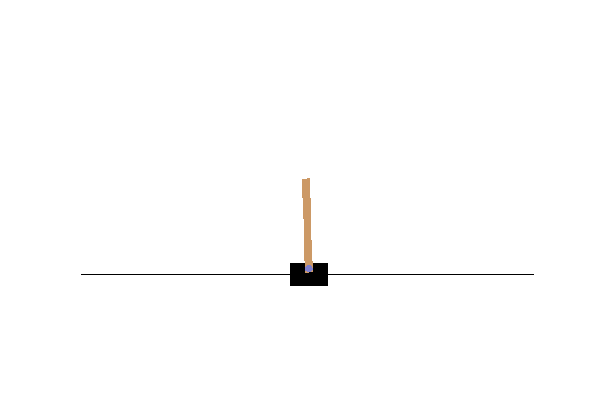
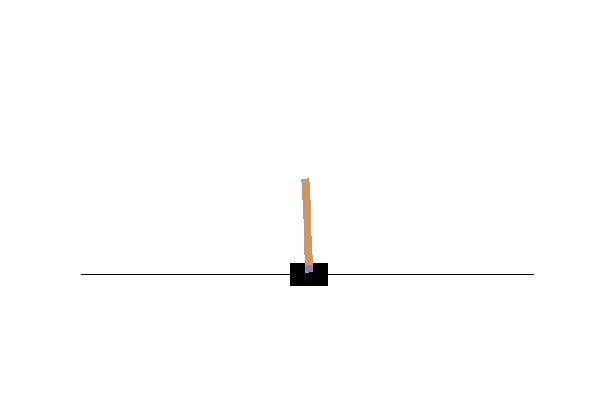
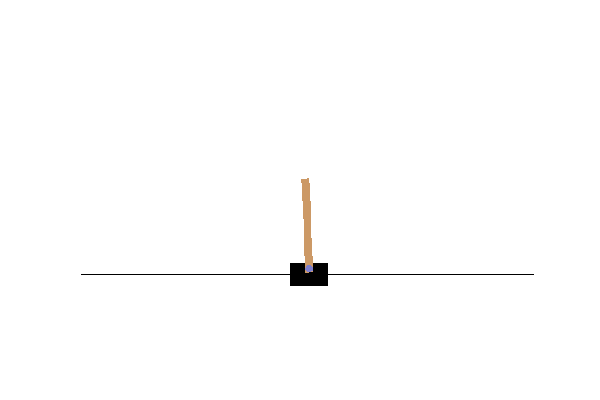
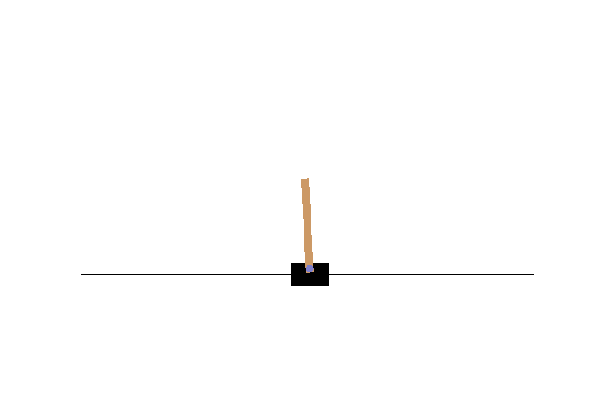
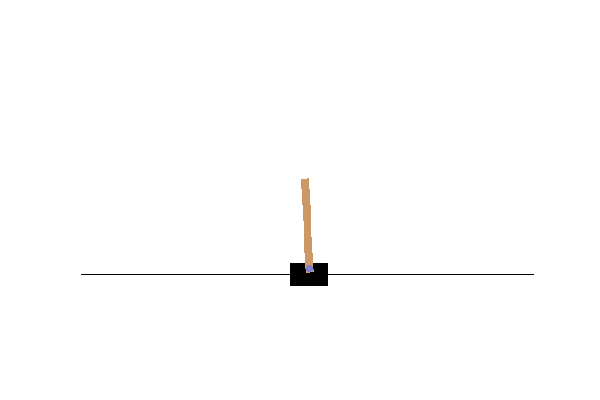
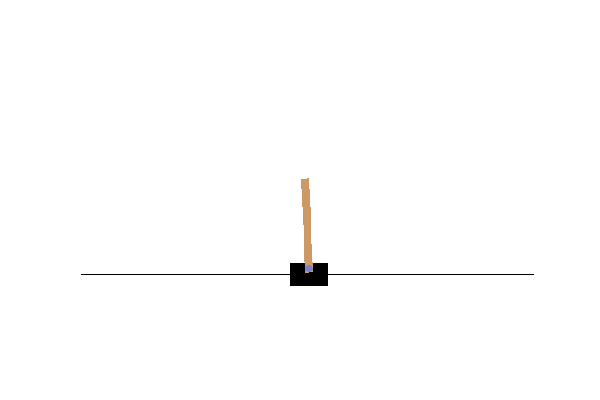
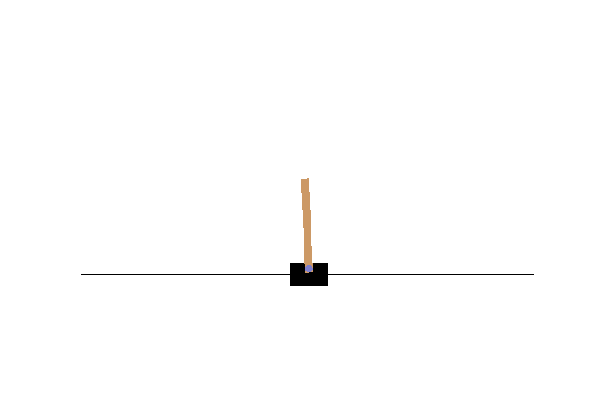
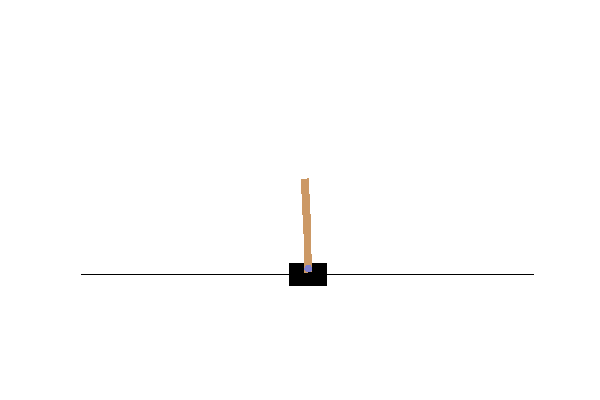
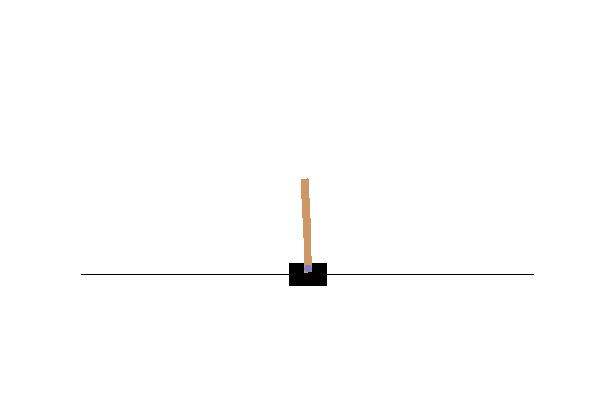
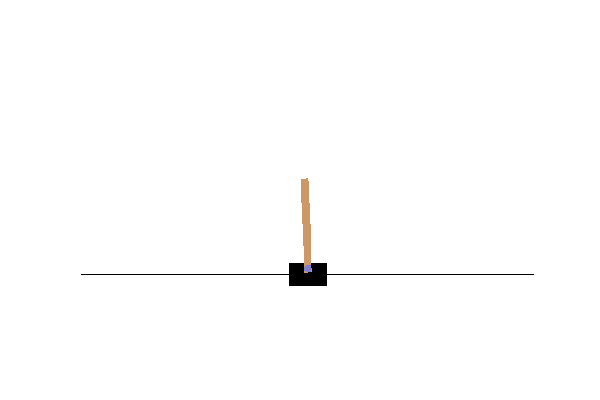
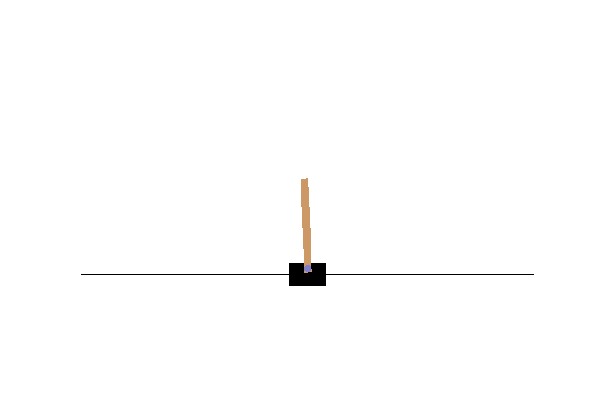
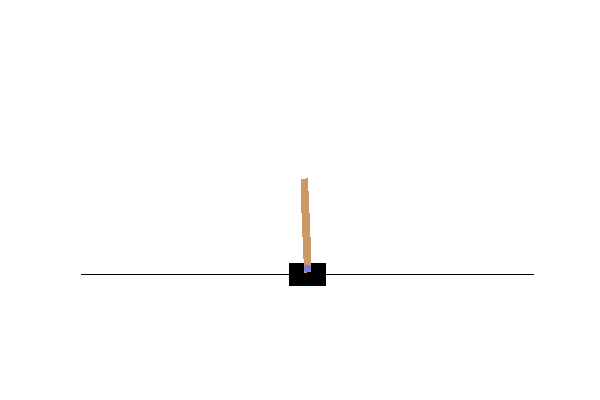
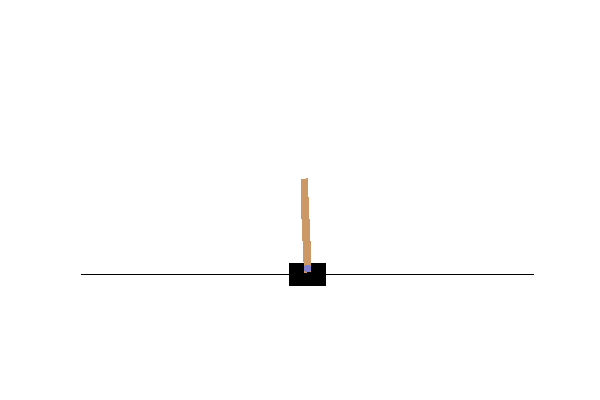

In [9]:
cartpole_env = Environment()
cartpole_env.run()